### Problem Statement:
The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how supply
chain organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Supply chain leaders may use
this data to address supply chain difficulties, cut costs, and enhance service levels all at
the same time.

The main goal is to predict the supply chain shipment pricing based on the available
factors in the dataset.

### Approach:
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

### Data Dictionary link
https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Data/a3rc-nmf6

### Importing necessary libraries

In [755]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [756]:
df=pd.read_csv("dataset.csv")

### Setting the display options

In [757]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Observing Head and Tail of the Dataset

In [758]:
display(df.head())
display(df.tail())

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  \
0   PMO - US  Direct Drop              EXW           Air   
1   PMO - US  Direct Drop              EXW           Air   
2   PMO - US  Direct Drop              FCA           Air   
3   PMO - US  Direct Drop              EXW           Air   
4   PMO - US  Direct Drop              EXW           Air   

  PQ First Sent to Client Date PO Sent to Vendor Date Scheduled Delivery Date  \
0               Pre-PQ Process      Date Not Captured                2-Jun-06   
1               Pre-PQ Process      Date Not Captured               14-Nov-06   
2               Pre-PQ Process      Date Not Captured               27-Aug-06   
3               Pre-PQ Process      Date Not Captured                1-Sep-06   
4               Pre-PQ Process      Date Not Captured               11-Aug-06   

  Delivered to Client Date Delivery Recorded Date Product Group  \
0                 2-Jun-06               2-Jun-06          HRDT   
1                14-Nov-06              14-Nov-06           ARV   
2                27-Aug-06              27-Aug-06          HRDT   
3                 1-Sep-06               1-Sep-06           ARV   
4                11-Aug-06              11-Aug-06           ARV   

  Sub Classification                                             Vendor  \
0           HIV test                        RANBAXY Fine Chemicals LTD.   
1          Pediatric                           Aurobindo Pharma Limited   
2           HIV test                               Abbott GmbH & Co. KG   
3              Adult  SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...   
4              Adult                           Aurobindo Pharma Limited   

                                    Item Description  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...   
1  Nevirapine 10mg/ml, oral suspension, Bottle, 2...   
2     HIV 1/2, Determine Complete HIV Kit, 100 Tests   
3                 Lamivudine 150mg, tablets, 60 Tabs   
4                  Stavudine 30mg, capsules, 60 Caps   

                         Molecule/Test Type      Brand   Dosage  \
0  HIV, Reveal G3 Rapid HIV-1 Antibody Test     Reveal      NaN   
1                                Nevirapine    Generic  10mg/ml   
2       HIV 1/2, Determine Complete HIV Kit  Determine      NaN   
3                                Lamivudine    Generic    150mg   
4                                 Stavudine    Generic     30mg   

       Dosage Form  Unit of Measure (Per Pack)  Line Item Quantity  \
0         Test kit                          30                  19   
1  Oral suspension                         240                1000   
2         Test kit                         100                 500   
3           Tablet                          60               31920   
4          Capsule                          60               38000   

   Line Item Value  Pack Price  Unit Price             Manufacturing Site  \
0            551.0       29.00        0.97     Ranbaxy Fine Chemicals LTD   
1           6200.0        6.20        0.03      Aurobindo Unit III, India   
2          40000.0       80.00        0.80  ABBVIE GmbH & Co.KG Wiesbaden   
3         127360.8        3.99        0.07  Ranbaxy, Paonta Shahib, India   
4         121600.0        3.20        0.05      Aurobindo Unit III, India   

  First Line Designation Weight (Kilograms) Freight Cost (USD)  \
0                    Yes                 13             780.34   
1                    Yes                358             4521.5   
2                    Yes                171   

ID Project Code       PQ # PO / SO # ASN/DN #        Country  \
10319  86818   103-ZW-T30  FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30  FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30  FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30  FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30  FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
10319   PMO - US    From RDC   N/A - From RDC         Truck   
10320   PMO - US    From RDC   N/A - From RDC         Truck   
10321   PMO - US    From RDC   N/A - From RDC         Truck   
10322   PMO - US    From RDC   N/A - From RDC         Truck   
10323   PMO - US    From RDC   N/A - From RDC         Truck   

      PQ First Sent to Client Date PO Sent to Vendor Date  \
10319                     10/16/14         N/A - From RDC   
10320                     10/24/14         N/A - From RDC   
10321                      8/12/14         N/A - From RDC   
10322                       7/1/15         N/A - From RDC   
10323                     10/16/14         N/A - From RDC   

      Scheduled Delivery Date Delivered to Client Date Delivery Recorded Date  \
10319               31-Jul-15                15-Jul-15              20-Jul-15   
10320               31-Jul-15                 6-Aug-15               7-Aug-15   
10321               31-Aug-15                25-Aug-15               3-Sep-15   
10322                9-Sep-15                 4-Aug-15              11-Aug-15   
10323               31-Aug-15                 4-Aug-15              11-Aug-15   

      Product Group Sub Classification         Vendor  \
10319           ARV          Pediatric  SCMS from RDC   
10320           ARV              Adult  SCMS from RDC   
10321           ARV              Adult  SCMS from RDC   
10322           ARV              Adult  SCMS from RDC   
10323           ARV          Pediatric  SCMS from RDC   

                                        Item Description  \
10319  Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...   
10320  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10321  Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...   
10322  Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs   
10323  Lamivudine/Zidovudine 30/60mg, dispersible tab...   

                                      Molecule/Test Type    Brand  \
10319                   Lamivudine/Nevirapine/Zidovudine  Generic   
10320                              Lamivudine/Zidovudine  Generic   
10321  Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...  Generic   
10322                              Lamivudine/Zidovudine  Generic   
10323                              Lamivudine/Zidovudine  Generic   

              Dosage                        Dosage Form  \
10319     30/50/60mg  Chewable/dispersible tablet - FDC   
10320      150/300mg                       Tablet - FDC   
10321  600/300/300mg                       Tablet - FDC   
10322      150/300mg                       Tablet - FDC   
10323        30/60mg  Chewable/dispersible tablet - FDC   

       Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
10319                          60              166571        599655.60   
10320                          60               21072        137389.44   
10321                          30              514526       5140114.74   
10322                          60               17465        113871.80   
10323                          60               36639         72911.61   

       Pack Price  Unit Price              Manufacturing Site  \
10319        3.60        0.06      Mylan,  H-12 & H-13, India   
10320        6.52        0.11    Hetero Unit III Hyderabad IN   
10321        9.99        0.33   Cipla Ltd A-42 MIDC Mahar. IN   
10322        6.52        0.11  Mylan (formerly Matrix) Nashik   
10323        1.99        0.03               Cipla, Goa, India   

      First Line Desig

### Shape of the Dataset

In [759]:
print('The Shape of the Dataset is :{}'.format(df.shape))

The Shape of the Dataset is :(10324, 33)


### Info of the dataset

In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

### Checking the null value count

In [761]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### Checking for Duplicates in the dataset

In [762]:
df.duplicated().sum()

0

### Descriptive Stats of Numeric and Categorical data

In [763]:
df.describe().T

count           mean            std  min  \
ID                          10324.0   51098.968229   31944.332496  1.0   
Unit of Measure (Per Pack)  10324.0      77.990895      76.579764  1.0   
Line Item Quantity          10324.0   18332.534870   40035.302961  1.0   
Line Item Value             10324.0  157650.567347  345292.066979  0.0   
Pack Price                  10324.0      21.910241      45.609223  0.0   
Unit Price                  10324.0       0.611701       3.275808  0.0   
Line Item Insurance (USD)   10037.0     240.117626     500.190568  0.0   

                                   25%        50%          75%         max  
ID                          12795.7500  57540.500   83648.2500    86823.00  
Unit of Measure (Per Pack)     30.0000     60.000      90.0000     1000.00  
Line Item Quantity            408.0000   3000.000   17039.7500   619999.00  
Line Item Value              4314.5925  30471.465  166447.1400  5951990.40  
Pack Price                      4.1200      9.300      23.5925     1345.64  
Unit Price                      0.0800      0.160       0.4700      238.65  
Line Item Insurance (USD)       6.5100     47.040     252.4000     7708.44

In [764]:
df.describe(include=object).T

count unique  \
Project Code                  10324    142   
PQ #                          10324   1237   
PO / SO #                     10324   6233   
ASN/DN #                      10324   7030   
Country                       10324     43   
Managed By                    10324      4   
Fulfill Via                   10324      2   
Vendor INCO Term              10324      8   
Shipment Mode                  9964      4   
PQ First Sent to Client Date  10324    765   
PO Sent to Vendor Date        10324    897   
Scheduled Delivery Date       10324   2006   
Delivered to Client Date      10324   2093   
Delivery Recorded Date        10324   2042   
Product Group                 10324      5   
Sub Classification            10324      6   
Vendor                        10324     73   
Item Description              10324    184   
Molecule/Test Type            10324     86   
Brand                         10324     48   
Dosage                         8588     54   
Dosage Form                   10324     17   
Manufacturing Site            10324     88   
First Line Designation        10324      2   
Weight (Kilograms)            10324   4688   
Freight Cost (USD)            10324   6733   

                                                             top   freq  
Project Code                                          116-ZA-T30    768  
PQ #                                              Pre-PQ Process   2681  
PO / SO #                                            SCMS-199289     67  
ASN/DN #                                               ASN-19166     54  
Country                                             South Africa   1406  
Managed By                                              PMO - US  10265  
Fulfill Via                                             From RDC   5404  
Vendor INCO Term                                  N/A - From RDC   5404  
Shipment Mode                                                Air   6113  
PQ First Sent to Client Date                      Pre-PQ Process   2476  
PO Sent to Vendor Date                            N/A - From RDC   5404  
Scheduled Delivery Date                                29-Aug-14     97  
Delivered to Client Date                               29-Aug-14     74  
Delivery Recorded Date                                 29-Aug-14     67  
Product Group                                                ARV   8550  
Sub Classification                                         Adult   6595  
Vendor                                             SCMS from RDC   5404  
Item Description               Efavirenz 600mg, tablets, 30 Tabs    755  
Molecule/Test Type                                     Efavirenz   1125  
Brand                                                    Generic   7285  
Dosage                                                     300mg    990  
Dosage Form                                               Tablet   3532  
Manufacturing Site                     Aurobindo Unit III, India   3172  
First Line Designation                                       Yes   7030  
Weight (Kilograms)                    Weight Captured Separately   1507  
Freight Cost (USD)            Freight Included in Commodity Cost   1442

### EDA

* Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments
* The function will display the statistical description of the numeric variable,skewness,histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [765]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')

    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')

    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

Description of ID
----------------------------------------------------------------------------
count    10324.000000
mean     51098.968229
std      31944.332496
min          1.000000
25%      12795.750000
50%      57540.500000
75%      83648.250000
max      86823.000000
Name: ID, dtype: float64

 Skewness of ID
----------------------------------------------------------------------------
-0.2304

 Histogram and Boxplot of ID
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


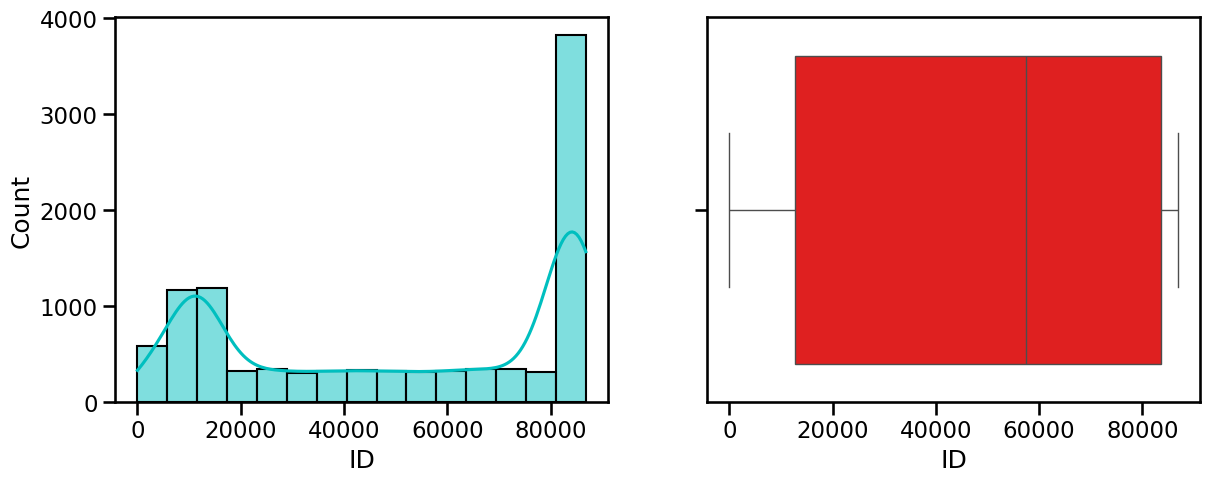

None
Description of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
count    10324.000000
mean        77.990895
std         76.579764
min          1.000000
25%         30.000000
50%         60.000000
75%         90.000000
max       1000.000000
Name: Unit of Measure (Per Pack), dtype: float64

 Skewness of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
4.3025

 Histogram and Boxplot of Unit of Measure (Per Pack)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


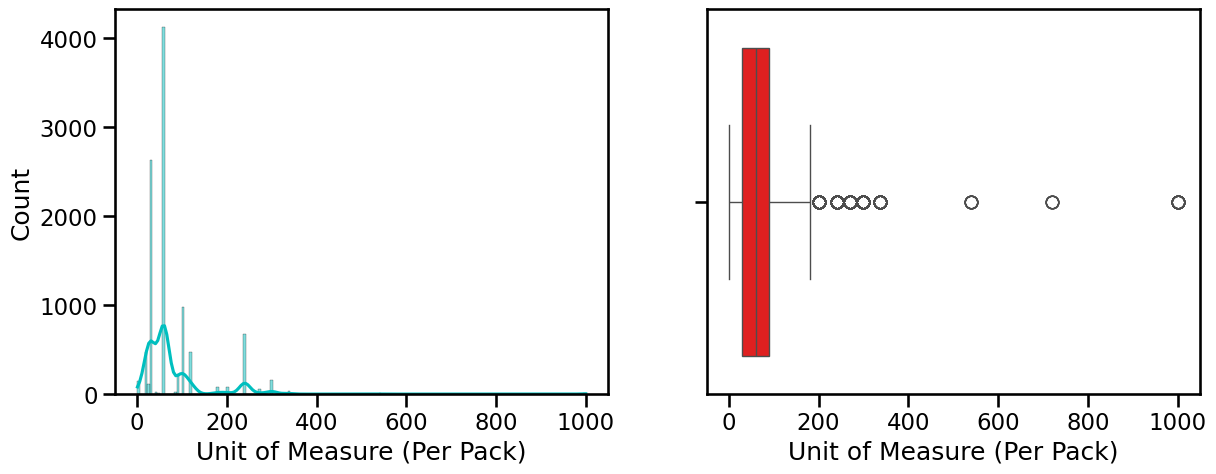

None
Description of Line Item Quantity
----------------------------------------------------------------------------
count     10324.000000
mean      18332.534870
std       40035.302961
min           1.000000
25%         408.000000
50%        3000.000000
75%       17039.750000
max      619999.000000
Name: Line Item Quantity, dtype: float64

 Skewness of Line Item Quantity
----------------------------------------------------------------------------
5.0383

 Histogram and Boxplot of Line Item Quantity
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


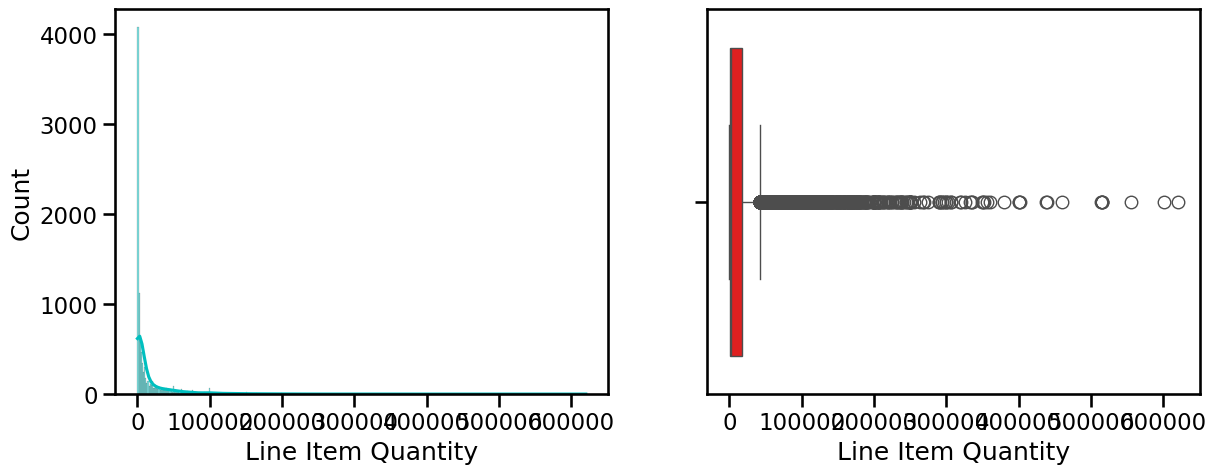

None
Description of Line Item Value
----------------------------------------------------------------------------
count    1.032400e+04
mean     1.576506e+05
std      3.452921e+05
min      0.000000e+00
25%      4.314593e+03
50%      3.047147e+04
75%      1.664471e+05
max      5.951990e+06
Name: Line Item Value, dtype: float64

 Skewness of Line Item Value
----------------------------------------------------------------------------
5.837

 Histogram and Boxplot of Line Item Value
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


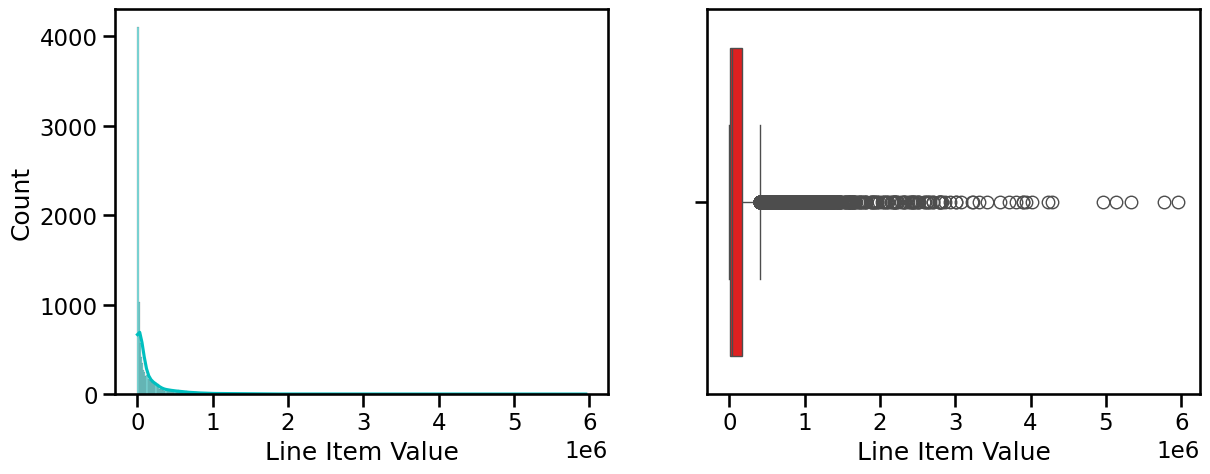

None
Description of Pack Price
----------------------------------------------------------------------------
count    10324.000000
mean        21.910241
std         45.609223
min          0.000000
25%          4.120000
50%          9.300000
75%         23.592500
max       1345.640000
Name: Pack Price, dtype: float64

 Skewness of Pack Price
----------------------------------------------------------------------------
12.9884

 Histogram and Boxplot of Pack Price
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


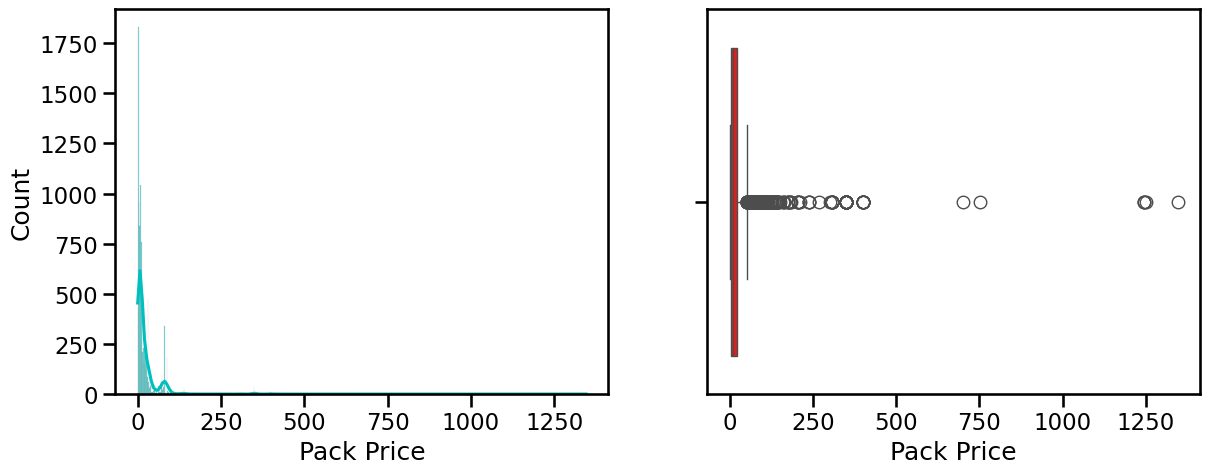

None
Description of Unit Price
----------------------------------------------------------------------------
count    10324.000000
mean         0.611701
std          3.275808
min          0.000000
25%          0.080000
50%          0.160000
75%          0.470000
max        238.650000
Name: Unit Price, dtype: float64

 Skewness of Unit Price
----------------------------------------------------------------------------
40.5848

 Histogram and Boxplot of Unit Price
----------------------------------------------------------------------------


Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


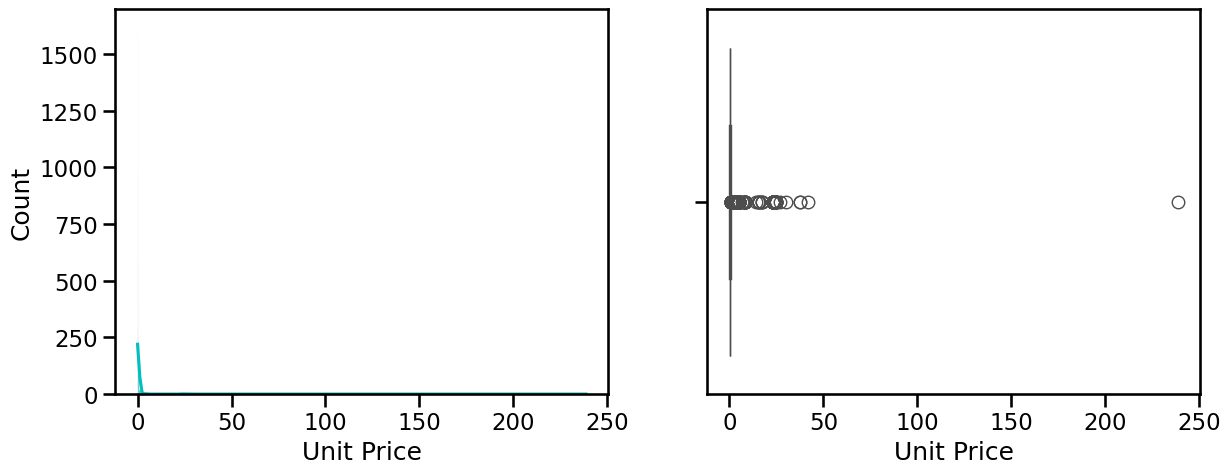

None
Description of Line Item Insurance (USD)
----------------------------------------------------------------------------
count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: Line Item Insurance (USD), dtype: float64

 Skewness of Line Item Insurance (USD)
----------------------------------------------------------------------------
4.8272

 Histogram and Boxplot of Line Item Insurance (USD)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


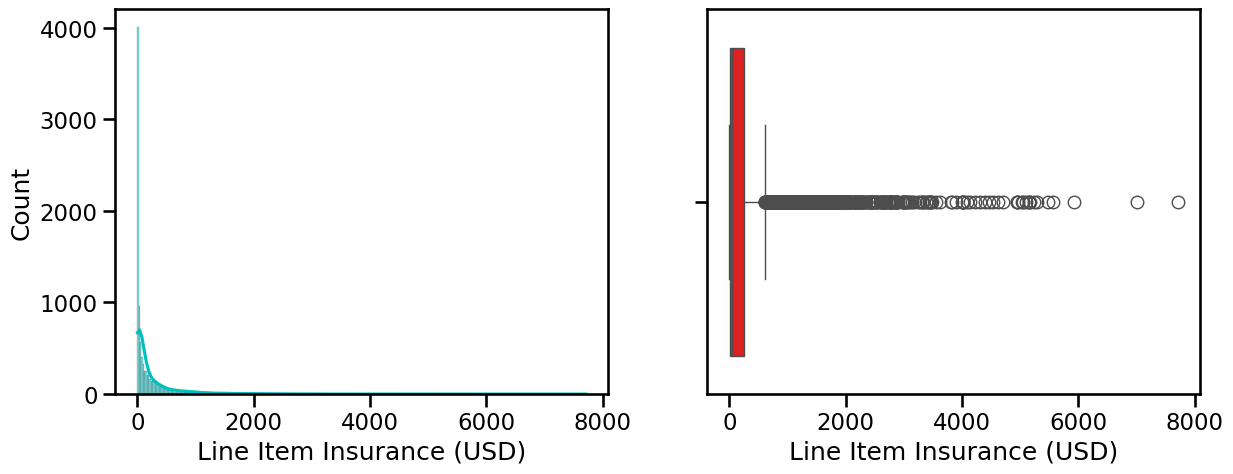

None


In [766]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(univariateAnalysis_numeric(column,60))


### Visualizing Missing Values

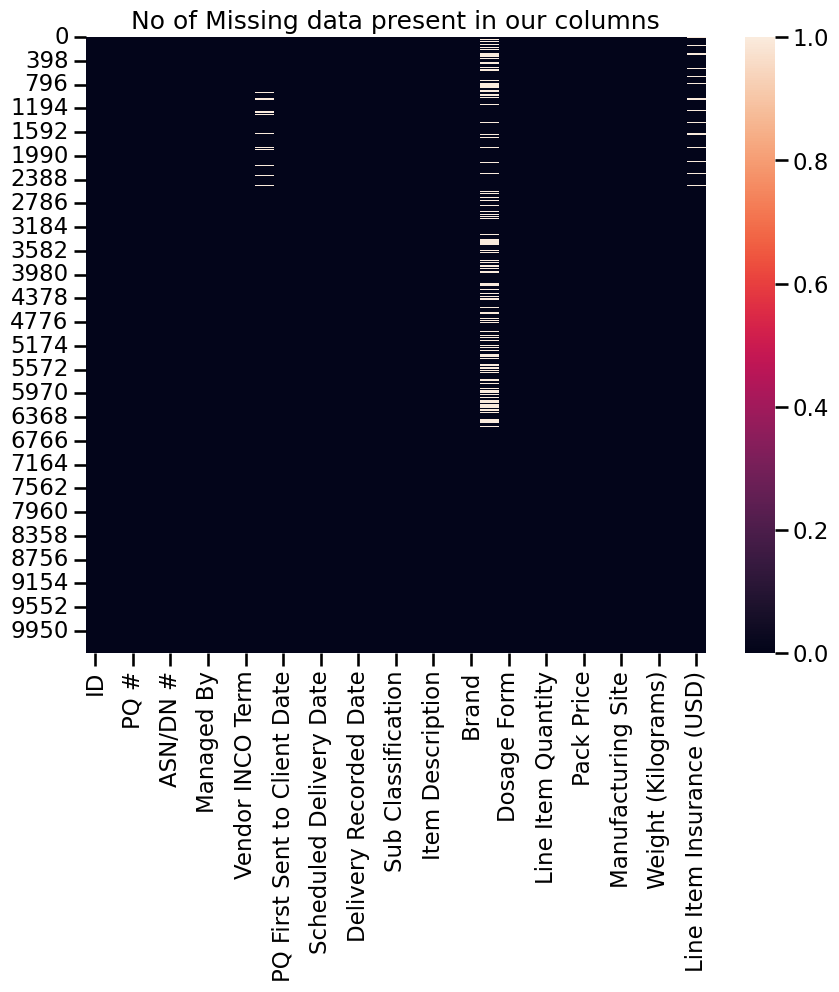

In [767]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
plt.title("No of Missing data present in our columns")
plt.show()

In [768]:
# Changing column names to lower case and removing unwanted spaces
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

### Missing Data imputation

In [769]:
missing_data=df[["shipment_mode","dosage","line_item_insurance_(usd)"]]

In [770]:
missing_data.head()

shipment_mode   dosage  line_item_insurance_(usd)
0           Air      NaN                        NaN
1           Air  10mg/ml                        NaN
2           Air      NaN                        NaN
3           Air    150mg                        NaN
4           Air     30mg                        NaN

In [771]:
for cols in missing_data.columns[0:]:
        print(cols,"has",df[cols].isna().sum(),"missing values")

shipment_mode has 360 missing values
dosage has 1736 missing values
line_item_insurance_(usd) has 287 missing values


### Shipment Mode

In [772]:
def plot(df,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    df.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))

    ax1=fig.add_subplot(122)
    sm=df.value_counts().index
    df.value_counts().plot.pie(labels=sm,autopct='%1.1f%%')
    plt.title("pie chart for {} column".format(col_name))
    plt.show()

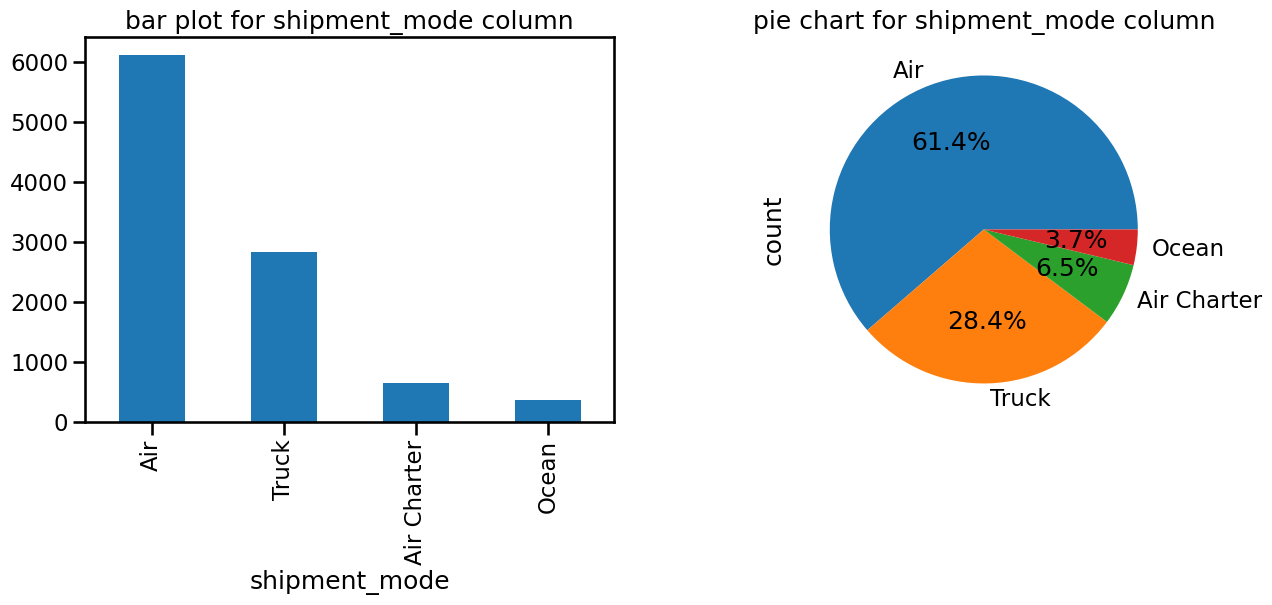

In [773]:
plot(df['shipment_mode'],"shipment_mode")

In [774]:
missing_data["shipment_mode"].fillna("Air",inplace=True)
missing_data["shipment_mode"].value_counts(dropna=False)

shipment_mode
Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

### Dosage

In [775]:
Percent_missing_values=df["dosage"].isnull().sum()/df.shape[0]
print('% Missing Values in Dosage =',np.round(Percent_missing_values,2)*100)

% Missing Values in Dosage = 17.0


In [776]:
df["dosage"].value_counts().head()

dosage
300mg            990
200mg            932
600mg            772
150/300mg        600
150/300/200mg    580
Name: count, dtype: int64

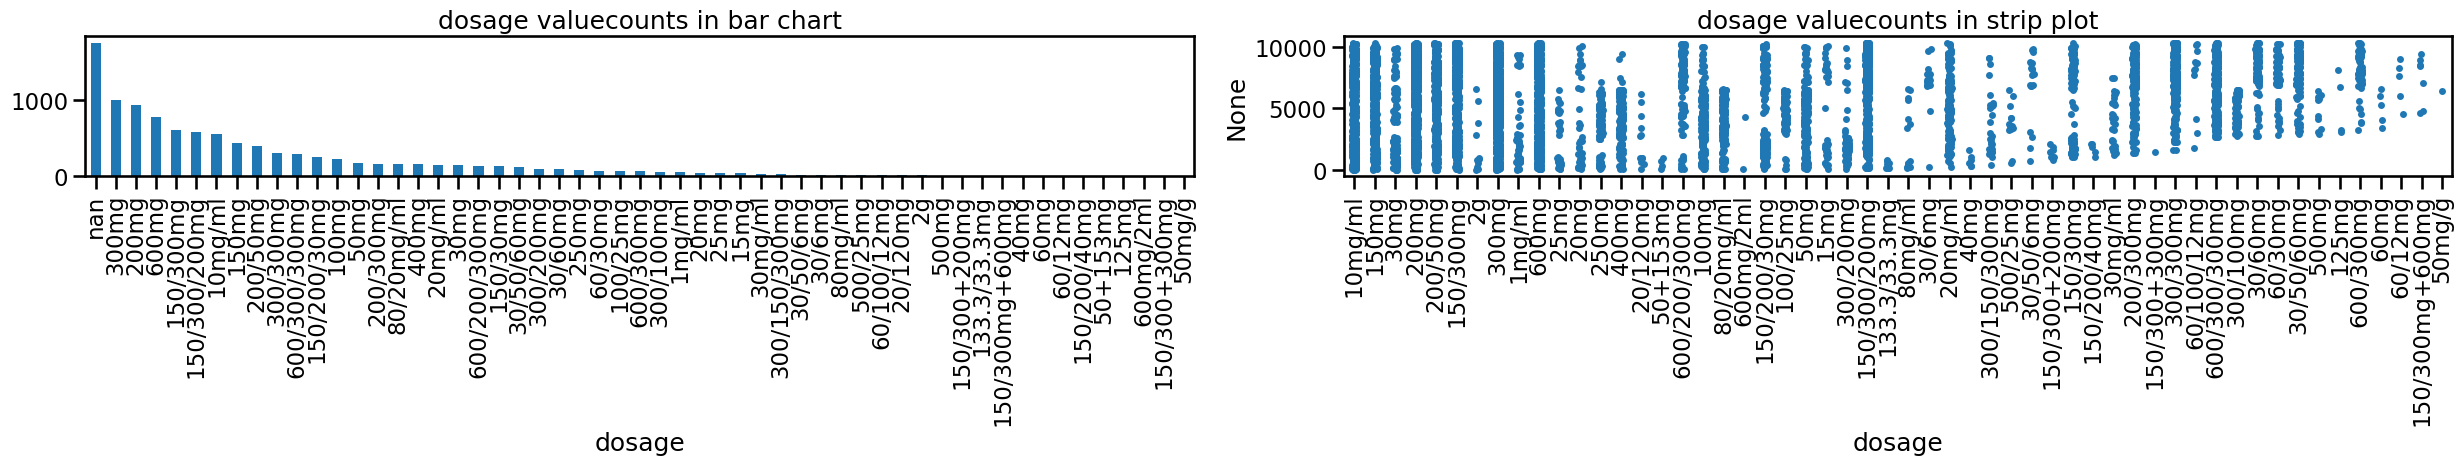

In [777]:
fig=plt.figure(figsize=(25,5))
ax0=fig.add_subplot(121)
df["dosage"].value_counts(dropna=False).plot.bar()
plt.title("dosage valuecounts in bar chart")

ax1=fig.add_subplot(122)
x=df["dosage"]
y=df.index
plt.xticks(rotation=90)
sns.stripplot(x=x,y=y)
plt.title("dosage valuecounts in strip plot")
plt.tight_layout()
plt.show()

In [778]:
# Better to drop this column as imputing 17% of missing data would not be good for model building
missing_data.drop("dosage",axis=1,inplace=True)

### Line Item Insurance (usd)

In [779]:
missing_data["line_item_insurance_(usd)"].value_counts().head()

line_item_insurance_(usd)
0.00    54
0.02    37
0.07    33
0.05    30
0.06    30
Name: count, dtype: int64

In [780]:
missing_data["line_item_insurance_(usd)"].replace(to_replace = np.NaN, value = missing_data["line_item_insurance_(usd)"].median(),inplace=True)

In [781]:
missing_data.isnull().sum()

shipment_mode                0
line_item_insurance_(usd)    0
dtype: int64

In [782]:
# Dropping the original columns
df.drop(["shipment_mode","line_item_insurance_(usd)","dosage"],axis=1,inplace=True)

In [783]:
# Concatenating the imputed columns
df=pd.concat([df,missing_data],axis=1)

In [784]:
# Dropping some columns which are not helpful in Model Building
df.drop(["id","project_code","pq_#"],axis=1,inplace=True)

In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   po_/_so_#                     10324 non-null  object 
 1   asn/dn_#                      10324 non-null  object 
 2   country                       10324 non-null  object 
 3   managed_by                    10324 non-null  object 
 4   fulfill_via                   10324 non-null  object 
 5   vendor_inco_term              10324 non-null  object 
 6   pq_first_sent_to_client_date  10324 non-null  object 
 7   po_sent_to_vendor_date        10324 non-null  object 
 8   scheduled_delivery_date       10324 non-null  object 
 9   delivered_to_client_date      10324 non-null  object 
 10  delivery_recorded_date        10324 non-null  object 
 11  product_group                 10324 non-null  object 
 12  sub_classification            10324 non-null  object 
 13  v

In [786]:
# Separating Numeric and object datatype data and storing them separately for analysis
obj_cols=[x for x in df.columns if df[x].dtypes=="O"]

num_cols=[y for y in df.columns if df[y].dtypes=="int64" or df[y].dtypes=="float64"]

In [787]:
numcols=df[num_cols]

objcols=df[obj_cols]

In [788]:
# Unique count in Object data
for cols in objcols.columns[0:]:
    print(cols,"=",len(objcols[cols].unique()))

po_/_so_# = 6233
asn/dn_# = 7030
country = 43
managed_by = 4
fulfill_via = 2
vendor_inco_term = 8
pq_first_sent_to_client_date = 765
po_sent_to_vendor_date = 897
scheduled_delivery_date = 2006
delivered_to_client_date = 2093
delivery_recorded_date = 2042
product_group = 5
sub_classification = 6
vendor = 73
item_description = 184
molecule/test_type = 86
brand = 48
dosage_form = 17
manufacturing_site = 88
first_line_designation = 2
weight_(kilograms) = 4688
freight_cost_(usd) = 6733
shipment_mode = 4


### PO/SO

In [789]:
print(df["po_/_so_#"].value_counts().head(),'\n')
print(df["po_/_so_#"].value_counts().tail())

po_/_so_#
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-259075    38
SCMS-215370    38
Name: count, dtype: int64 

po_/_so_#
SCMS-56180     1
SCMS-231330    1
SCMS-69270     1
SCMS-98170     1
SCMS-226211    1
Name: count, dtype: int64


In [790]:
df["po_/_so_#"].value_counts().head()

po_/_so_#
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-259075    38
SCMS-215370    38
Name: count, dtype: int64

#### The function reorder takes a string as input and returns a new string after performing some operations on it.

* Here's how the function works:

* The input string is passed to the function as the argument df.
* The string is split into a list of substrings using the split() method. The delimiter used to split the string is the hyphen (-). The resulting list is stored in the variable df_split.
* The first element of the list (index 0) is extracted and stored in the variable df_return.
* Finally, the function returns the value stored in df_return.For example, if you call reorder with the input string "SO-4568", the function will split the string into a list ["SO", "4568"] and return the string "SO".

In [791]:
def reorder(df):
    df_split=df.split("-")
    df_return=df_split[0]
    return df_return

In [792]:
df["po_/_so_#"]=df["po_/_so_#"].apply(reorder)
df["po_/_so_#"].value_counts()

po_/_so_#
SO      5404
SCMS    4919
DSCM       1
Name: count, dtype: int64

In [793]:
df["po_/_so_#"]=df["po_/_so_#"].replace('DSCM',"SO")

In [794]:
df["po_/_so_#"].value_counts()

po_/_so_#
SO      5405
SCMS    4919
Name: count, dtype: int64

### DN / ASN

In [795]:
df["asn/dn_#"].value_counts().head()

asn/dn_#
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28033    17
Name: count, dtype: int64

In [796]:
df["asn/dn_#"].value_counts().tail()

asn/dn_#
ASN-24569    1
ASN-10872    1
ASN-29128    1
ASN-18877    1
ASN-19219    1
Name: count, dtype: int64

In [797]:
# Applying the Reorder function
df["asn/dn_#"]=df["asn/dn_#"].apply(reorder)
df["asn/dn_#"].value_counts()

asn/dn_#
DN     5404
ASN    4920
Name: count, dtype: int64

* DN / ASN = Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries

* DN(Delivery Note) is most used or preferred for Shipment Number

### Country

In [798]:
print(df["country"].value_counts().head(),'\n')
print(df["country"].value_counts().tail())

country
South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Name: count, dtype: int64 

country
Kyrgyzstan      2
Kazakhstan      2
Burkina Faso    2
Guinea          1
Belize          1
Name: count, dtype: int64


Text(0.5, 0, 'Country Name')

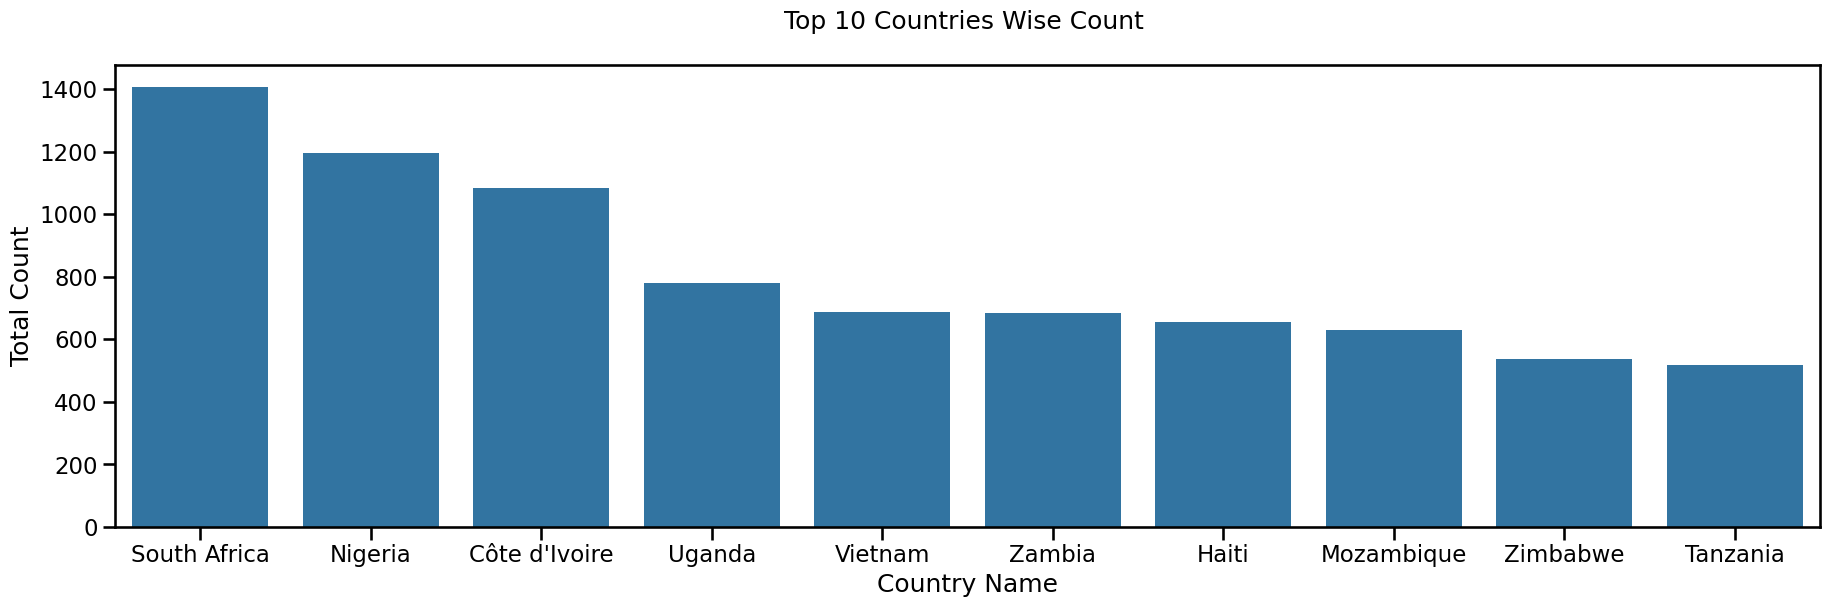

In [799]:
Count = df["country"].value_counts().nlargest(10)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(x=df['country'],order = Count.index)
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

* South Africa is the most preferred Destination country for the shipments followed by Nigeria , Côte d'Ivoire while Guinea and Belize being the least.

### Managed_by

In [800]:
df["managed_by"].value_counts()

managed_by
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

In [801]:
np.round(df["managed_by"].value_counts(normalize=True)*100,2)

managed_by
PMO - US                     99.43
South Africa Field Office     0.55
Haiti Field Office            0.01
Ethiopia Field Office         0.01
Name: proportion, dtype: float64

* Managed By = SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office
* Almost all the Management office are located in US hence it does not provide any useful information so,we can drop it from our variables.

In [802]:
df.drop("managed_by",axis=1,inplace=True)

### Fulfill_via

In [803]:
df["fulfill_via"].value_counts()

fulfill_via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

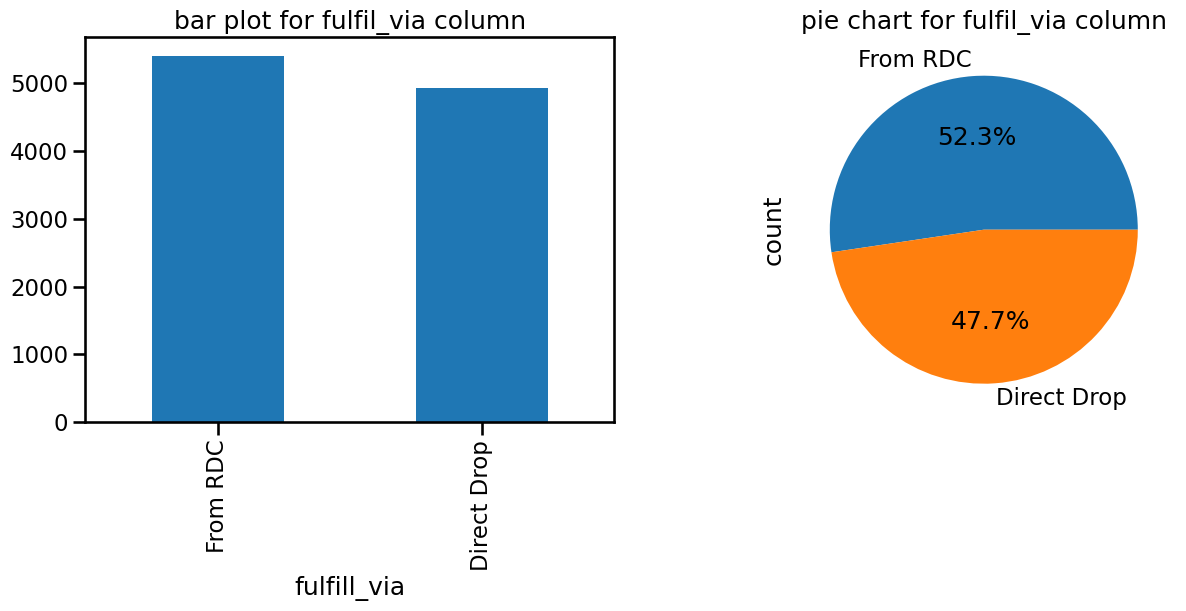

In [804]:
plot(df["fulfill_via"],"fulfil_via")

### Vendor_inco_term

In [805]:
df["vendor_inco_term"].value_counts()

vendor_inco_term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

In [806]:
np.round(df["vendor_inco_term"].value_counts(normalize=True),2)

vendor_inco_term
N/A - From RDC    0.52
EXW               0.27
DDP               0.14
FCA               0.04
CIP               0.03
DDU               0.00
DAP               0.00
CIF               0.00
Name: proportion, dtype: float64

### PQ_first_sent_to_client_date

In [807]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

pq_first_sent_to_client_date
Pre-PQ Process       2476
9/11/14               205
Date Not Captured     205
7/11/13               173
4/30/14               123
Name: count, dtype: int64 

pq_first_sent_to_client_date
11/21/14    1
5/29/09     1
9/8/09      1
1/9/13      1
4/16/10     1
Name: count, dtype: int64


In [808]:
df["pq_first_sent_to_client_date"].nunique()

765

In [809]:
df["pq_first_sent_to_client_date"].min()

'1/10/12'

In [810]:
df["pq_first_sent_to_client_date"].max()

'Pre-PQ Process'

In [811]:
df["pq_first_sent_to_client_date"].describe(include=all)

count              10324
unique               765
top       Pre-PQ Process
freq                2476
Name: pq_first_sent_to_client_date, dtype: object

In [812]:
df.describe(include='all')["pq_first_sent_to_client_date"]

count              10324
unique               765
top       Pre-PQ Process
freq                2476
mean                 NaN
std                  NaN
min                  NaN
25%                  NaN
50%                  NaN
75%                  NaN
max                  NaN
Name: pq_first_sent_to_client_date, dtype: object

#### Function called client_dates
* This code is a function called client_dates that takes in a date as a string. The function has three branches. The first branch checks if the input date is equal to the string "Pre-PQ Process", and if so, it returns a specific pre-defined date in the format "%d/%m/%Y" using the pd.to_datetime function from the pandas library.
* The second branch checks if the input date is equal to the string "Date Not Captured", and if so, it returns the string "Date Not Captured" without modifying it.
* The third branch is executed if the input date is not equal to either of the previous two strings. This branch checks if the length of the input date string is less than 9 characters, and if so, it converts the date to the format "%m/%d/%y" using the pd.to_datetime function and returns the date.
* If the length of the input date string is not less than 9 characters, it replaces all occurrences of the character "-" with the character "/" in the input date string and then converts the date to the format "%d/%m/%Y" using the pd.to_datetime function and returns the date.

In [813]:
# Checking the length of Date and hence using len(date)<9
a=len('10/21/13')
a

8

In [814]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [815]:
df["pq_first_sent_to_client_date"]=df["pq_first_sent_to_client_date"].apply(client_dates)

In [816]:
df["pq_first_sent_to_client_date"].head(5)

0    2009-06-01 00:00:00
1    2009-06-01 00:00:00
2    2009-06-01 00:00:00
3    2009-06-01 00:00:00
4    2009-06-01 00:00:00
Name: pq_first_sent_to_client_date, dtype: object

In [817]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

pq_first_sent_to_client_date
2009-06-01 00:00:00    2476
2014-09-11 00:00:00     205
Date Not Captured       205
2013-07-11 00:00:00     173
2014-04-30 00:00:00     123
Name: count, dtype: int64 

pq_first_sent_to_client_date
2014-11-21 00:00:00    1
2009-05-29 00:00:00    1
2009-09-08 00:00:00    1
2013-01-09 00:00:00    1
2010-04-16 00:00:00    1
Name: count, dtype: int64


In [818]:
df.drop(df.index[df["pq_first_sent_to_client_date"]=="Date Not Captured"],inplace=True)

In [819]:
print(df["pq_first_sent_to_client_date"].value_counts().head(),'\n')
print(df["pq_first_sent_to_client_date"].value_counts().tail())

pq_first_sent_to_client_date
2009-06-01    2476
2014-09-11     205
2013-07-11     173
2014-04-30     123
2009-11-06      98
Name: count, dtype: int64 

pq_first_sent_to_client_date
2014-11-04    1
2014-11-21    1
2009-05-29    1
2009-09-08    1
2013-02-25    1
Name: count, dtype: int64


### PO_sent_to_vendor_date

In [820]:
print(df["po_sent_to_vendor_date"].value_counts().head(),'\n')
print(df["po_sent_to_vendor_date"].value_counts().tail())

po_sent_to_vendor_date
N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
Name: count, dtype: int64 

po_sent_to_vendor_date
12/9/13     1
4/20/12     1
12/10/09    1
1/5/10      1
4/4/11      1
Name: count, dtype: int64


In [821]:
df["po_sent_to_vendor_date"].value_counts(normalize=True).head(6)*100

po_sent_to_vendor_date
N/A - From RDC       51.378595
Date Not Captured     3.241427
8/27/14               0.790592
3/19/10               0.770827
8/29/14               0.751062
10/9/14               0.701650
Name: proportion, dtype: float64

* po_sent_to_vendor_date = Date the PO is first sent to the vendor
* Dropping column as it's more than 50% infomation is captured by from RDC which is categorical and unknown to us.

In [822]:
df.drop('po_sent_to_vendor_date', axis= 1,inplace=True)

### Scheduled_delivery_date

In [823]:
df["scheduled_delivery_date"].value_counts().head()

scheduled_delivery_date
29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
Name: count, dtype: int64

In [824]:
df["scheduled_delivery_date"].value_counts().tail()

scheduled_delivery_date
27-Jan-15    1
1-Aug-10     1
30-Oct-10    1
1-Apr-11     1
1-Aug-11     1
Name: count, dtype: int64

This function transforms a string representation of a date in the format "DD-MMM-YY" (e.g. "16-Jan-22") into a pandas datetime object. The function does this in three steps:

* The first line of the function uses the .replace() method to replace all hyphens (-) in the input string data with forward slashes (/). This is done because the pd.to_datetime() function expects the input string to be in the format "DD/MMM/YY", where "DD" is the day of the month, "MMM" is the three-letter abbreviation for the month, and "YY" is the two-digit year.

* The second line of the function uses the pd.to_datetime() function to convert the modified string into a pandas datetime object. The format parameter is set to "%d/%b/%y", which specifies the format of the input string. The %d directive represents the day of the month (as a zero-padded two-digit number), the %b directive represents the three-letter abbreviation for the month, and the %y directive represents the two-digit year.

* The third and final line of the function returns the resulting pandas datetime object.


In [825]:
def transform_date(data):
    data=data.replace("-","/")
    data=pd.to_datetime(data,format="%d/%b/%y")
    return data

In [826]:
df["scheduled_delivery_date"]=df["scheduled_delivery_date"].apply(transform_date)
df["scheduled_delivery_date"].value_counts().head()

scheduled_delivery_date
2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
Name: count, dtype: int64

In [827]:
df["delivery_recorded_date"]=df["delivery_recorded_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

delivered_to_client_date
29-Aug-14    74
27-Aug-14    66
14-Feb-12    60
28-Jun-10    60
16-Apr-13    59
Name: count, dtype: int64

### Delivered_to_client_date

In [828]:
df["delivered_to_client_date"]=df["delivered_to_client_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

delivered_to_client_date
2014-08-29    74
2014-08-27    66
2012-02-14    60
2010-06-28    60
2013-04-16    59
Name: count, dtype: int64

### Product Group

In [829]:
df["product_group"].value_counts()

product_group
ARV     8345
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

In [830]:
np.round(df["product_group"].value_counts(normalize=True)*100,2)

product_group
ARV     82.47
HRDT    17.08
ANTM     0.22
ACT      0.16
MRDT     0.08
Name: proportion, dtype: float64

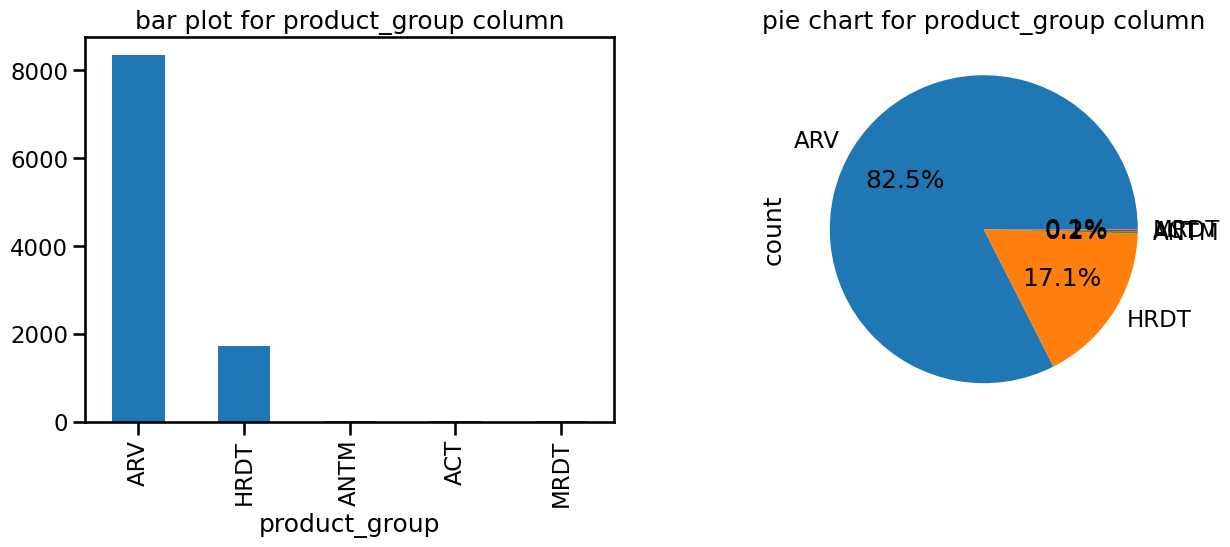

In [831]:
plot(df["product_group"],"product_group")

Text(0.5, 1.0, 'bar chart for product group')

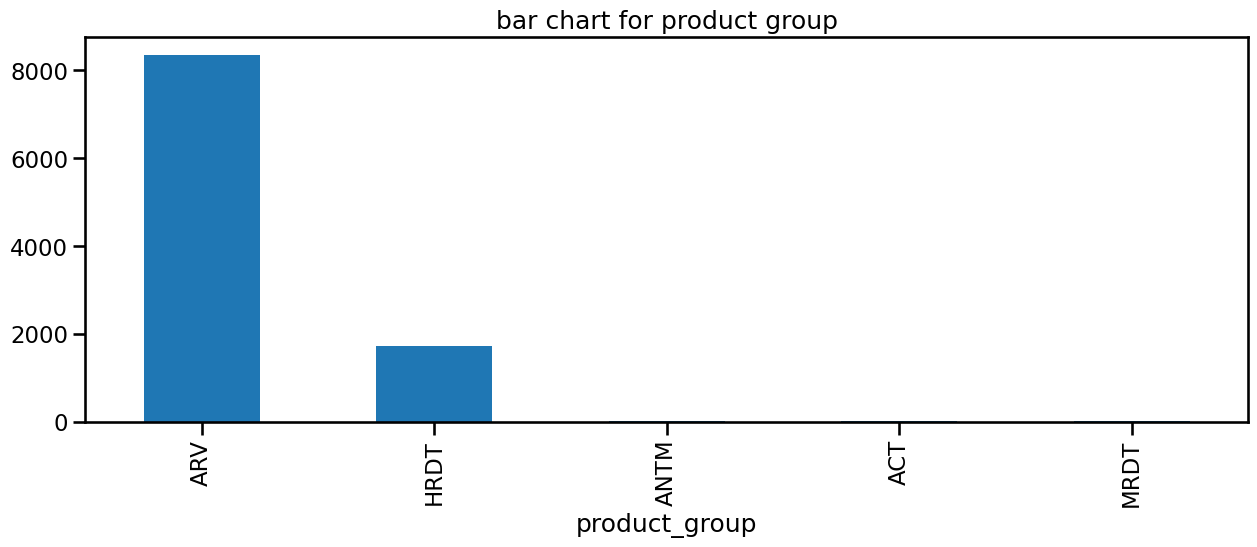

In [832]:
plt.figure(figsize=(15,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

In [833]:
other_product=df["product_group"].value_counts().to_dict()
HRDT=[]
for key,val in other_product.items():
    if val<=2000:
        HRDT.append(key)

In [834]:
df["product_group"]=df["product_group"].replace(HRDT,"other")

In [835]:
df["product_group"].value_counts()

product_group
ARV      8345
other    1774
Name: count, dtype: int64

Text(0.5, 1.0, 'bar chart for product group')

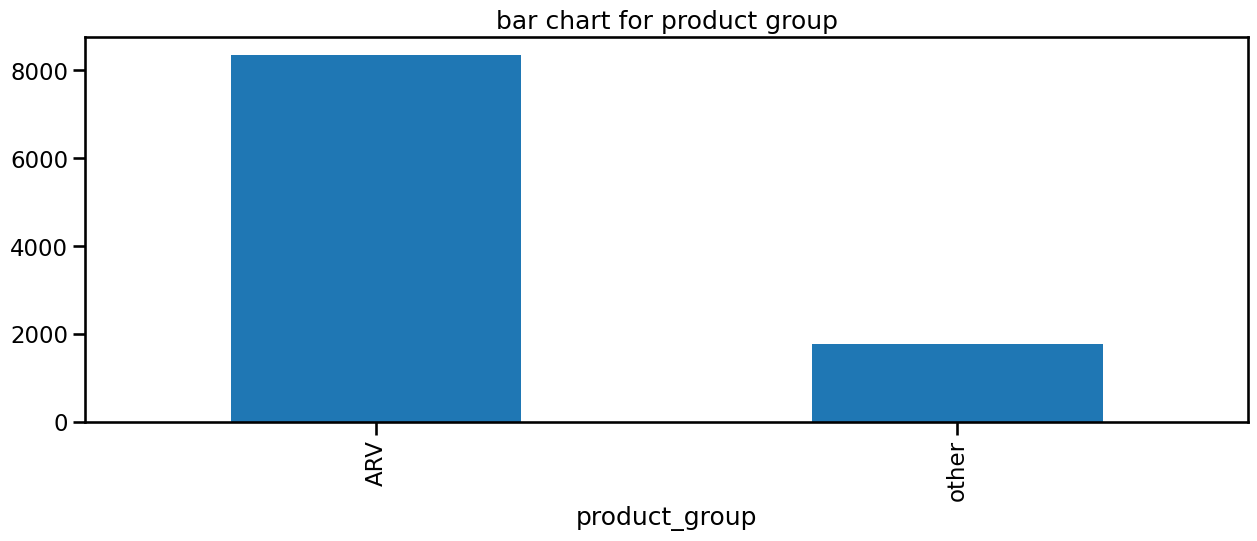

In [836]:
plt.figure(figsize=(15,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

### Sub Classification

In [837]:
df["sub_classification"].value_counts()

sub_classification
Adult                   6418
Pediatric               1927
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

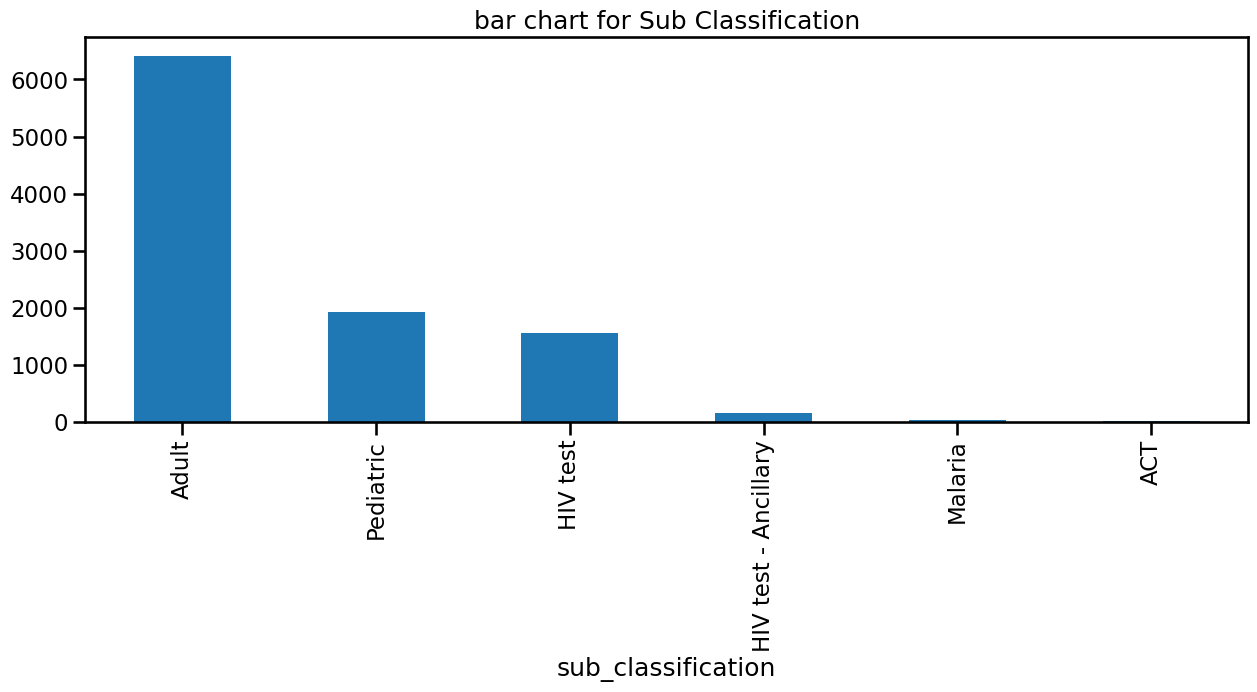

In [838]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

In [839]:
other_class=df["sub_classification"].value_counts().to_dict()
HIV_plus=[]
for key,val in other_class.items():
    if val<=1600:
        HIV_plus.append(key)

In [840]:
df["sub_classification"]=df["sub_classification"].replace(HIV_plus,"HIV+")

In [841]:
df["sub_classification"].value_counts()

sub_classification
Adult        6418
Pediatric    1927
HIV+         1774
Name: count, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

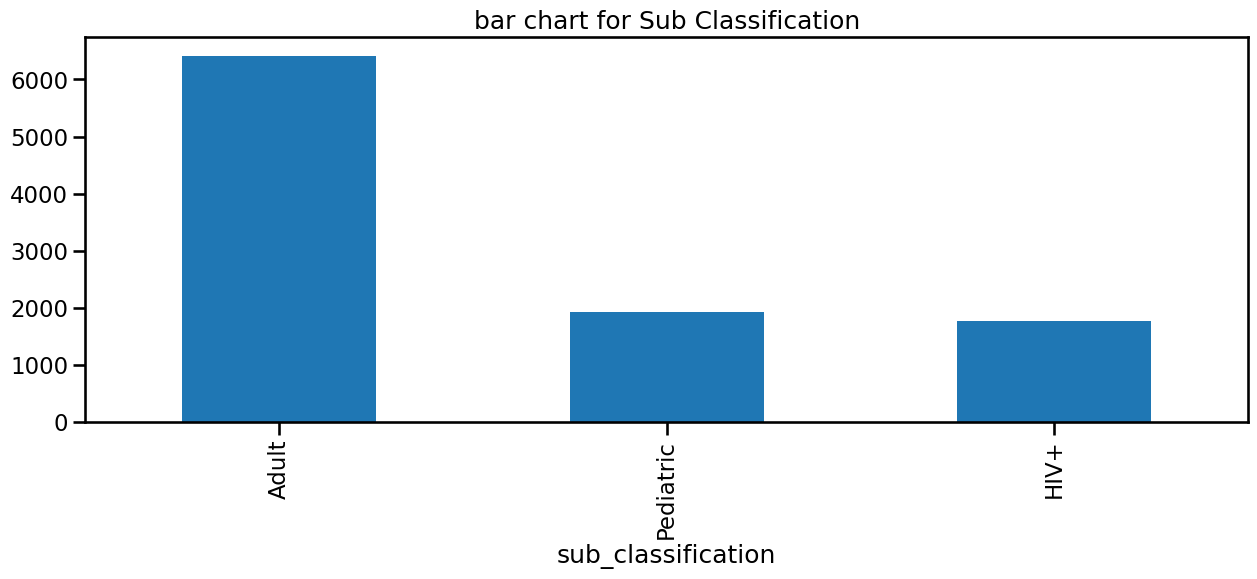

In [842]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

### Vendor

In [843]:
df["vendor"].value_counts().head()

vendor
SCMS from RDC               5199
Orgenics, Ltd                754
S. BUYS WHOLESALER           715
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: count, dtype: int64

In [844]:
df["vendor"].value_counts().tail()

vendor
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)    1
PUETRO RICO PHARMACEUTICAL, INC.                1
ACOUNS NIGERIA LTD                              1
THE MEDICAL EXPORT GROUP BV                     1
AUROBINDO PHARAM (SOUTH AFRICA)                 1
Name: count, dtype: int64

In [845]:
df["vendor"].value_counts(normalize=True).head()

vendor
SCMS from RDC               0.513786
Orgenics, Ltd               0.074513
S. BUYS WHOLESALER          0.070659
Aurobindo Pharma Limited    0.066014
Trinity Biotech, Plc        0.035181
Name: proportion, dtype: float64

In [846]:
other_vendor=df["vendor"].value_counts().to_dict()
other_catv=[]
for key,val in other_vendor.items():
    if val<=5000:
        other_catv.append(key)

In [847]:
df["vendor"]=df["vendor"].replace(other_catv,"other")

Text(0.5, 1.0, 'bar chart for vendor column')

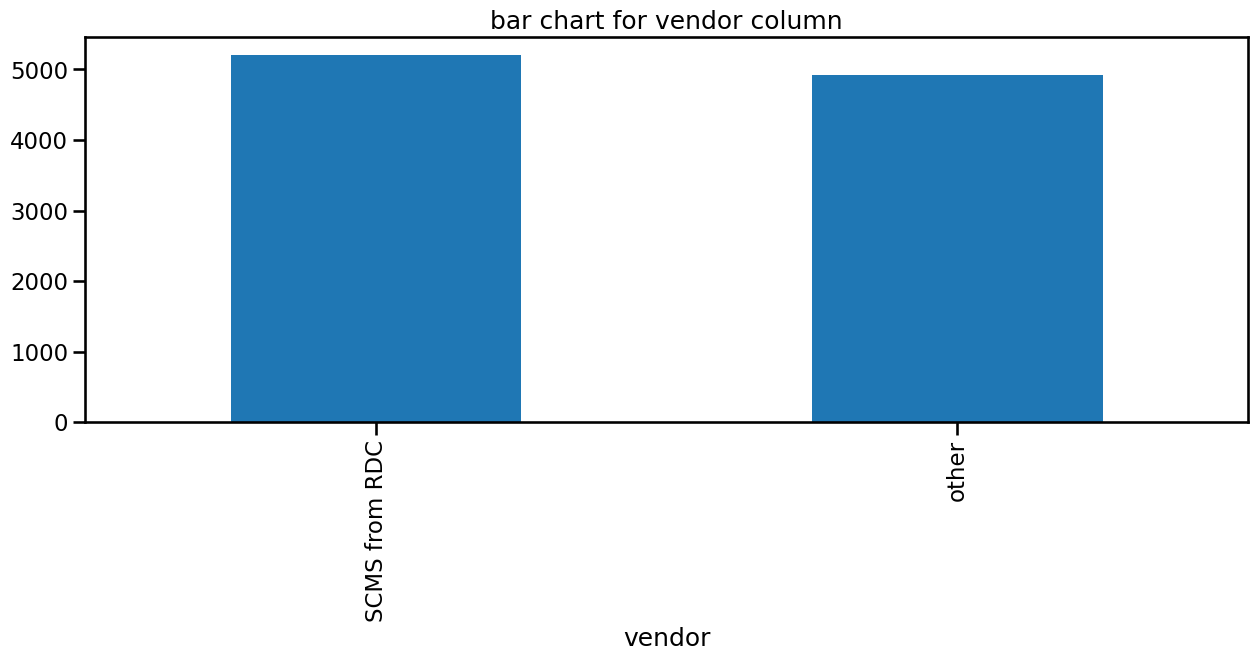

In [848]:
plt.figure(figsize=(15,5))
df["vendor"].value_counts().plot.bar()
plt.title("bar chart for vendor column")

In [849]:
df["vendor"].value_counts(normalize=True)

vendor
SCMS from RDC    0.513786
other            0.486214
Name: proportion, dtype: float64

### Item_description

In [850]:
df["item_description"].value_counts().head()

item_description
Efavirenz 600mg, tablets, 30 Tabs                                   733
Nevirapine 200mg, tablets, 60 Tabs                                  605
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                   580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                      577
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs    554
Name: count, dtype: int64

In [851]:
df["item_description"].value_counts().tail()

item_description
Nevirapine 50mg, dispersible tablets, 60 Tabs                1
Primaquine 15mg base (as diphosphate), tablets, 1000 Tabs    1
Didanosine 200mg, [DON] delayed-release capsules, 30 Caps    1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs        1
Quinine sulphate 300mg, film coated tablet, 1000 Tabs        1
Name: count, dtype: int64

In [852]:
df.drop("item_description",axis=1,inplace=True)

### Molecule/test_type

In [853]:
df["molecule/test_type"].value_counts().head()

molecule/test_type
Efavirenz                           1099
Nevirapine                           854
Lamivudine/Nevirapine/Zidovudine     681
Lamivudine/Zidovudine                672
Lopinavir/Ritonavir                  629
Name: count, dtype: int64

In [854]:
df["molecule/test_type"].value_counts().tail()

molecule/test_type
Mefloquine (as hydrochloride)                1
Malaria, Antigen P.f., HRP2 CareStart Kit    1
Quinine                                      1
Malaria Antigen P.f , HRP2, Kit              1
Nelfinavir                                   1
Name: count, dtype: int64

In [855]:
# Here, column Molecule/Test Type gives information on test type and consituting molecules present in it. Hence dropping it.
df.drop("molecule/test_type",axis=1,inplace=True)

### Brand

In [856]:
df["brand"].value_counts().head()

brand
Generic      7098
Determine     799
Uni-Gold      373
Aluvia        250
Kaletra       161
Name: count, dtype: int64

In [857]:
df["brand"].value_counts().tail()

brand
InstantCHEK    2
Bundi          2
Visitect       1
Pepti-LAV      1
CareStart      1
Name: count, dtype: int64

In [858]:
df["brand"].value_counts(normalize=True).head()

brand
Generic      0.701453
Determine    0.078960
Uni-Gold     0.036861
Aluvia       0.024706
Kaletra      0.015911
Name: proportion, dtype: float64

In [859]:
other_brand=df["brand"].value_counts().to_dict()
other_catb=[]
for key,val in other_brand.items():
    if val<=1000:
        other_catb.append(key)

In [860]:
df["brand"]=df["brand"].replace(other_catb,"other")

In [861]:
def barplot(df,cols):
    plt.figure(figsize=(25,10))
    df.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

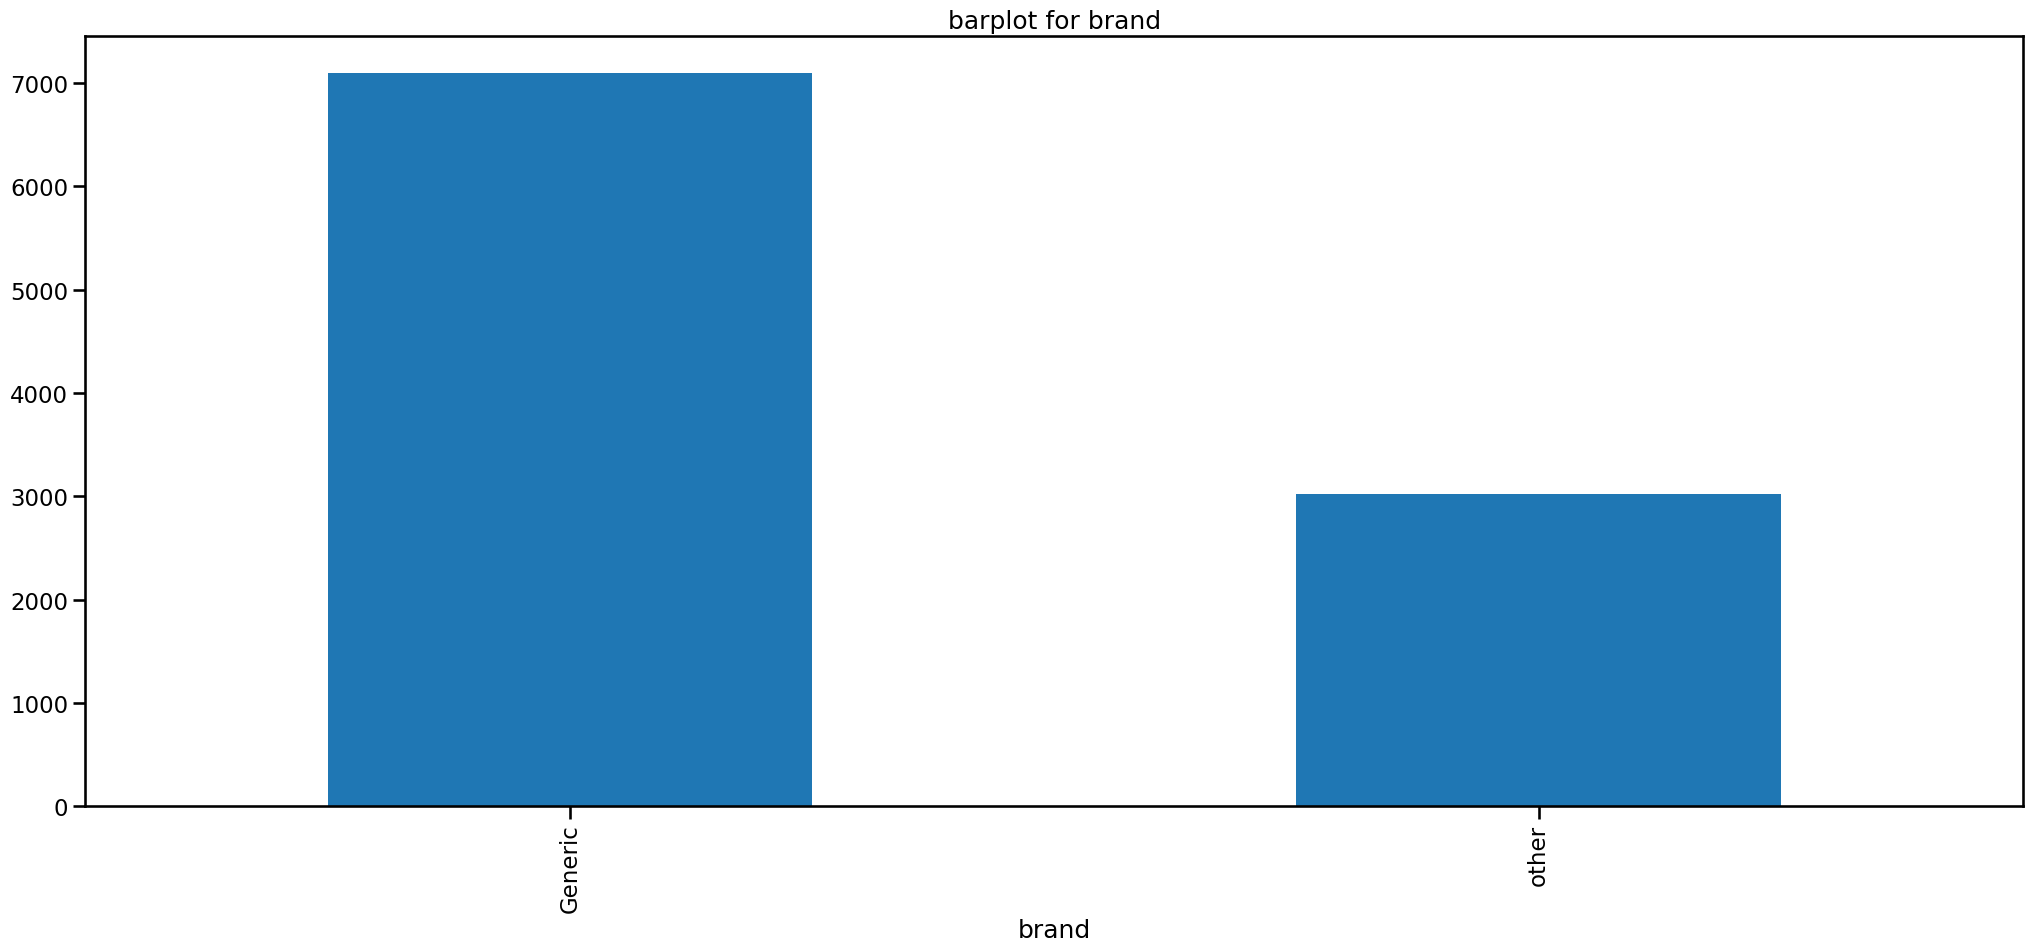

In [862]:
barplot(df["brand"],"brand")

### Dosage_form

In [863]:
df["dosage_form"].value_counts().head()

dosage_form
Tablet           3462
Tablet - FDC     2659
Test kit         1575
Oral solution     712
Capsule           706
Name: count, dtype: int64

In [864]:
df["dosage_form"].value_counts().tail()

dosage_form
Tablet - FDC + co-blister    20
Tablet - FDC + blister       15
Tablet - blister             10
Injection                     6
Oral powder                   1
Name: count, dtype: int64

In [865]:
def barplot(df,cols):
    plt.figure(figsize=(25,10))
    df.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

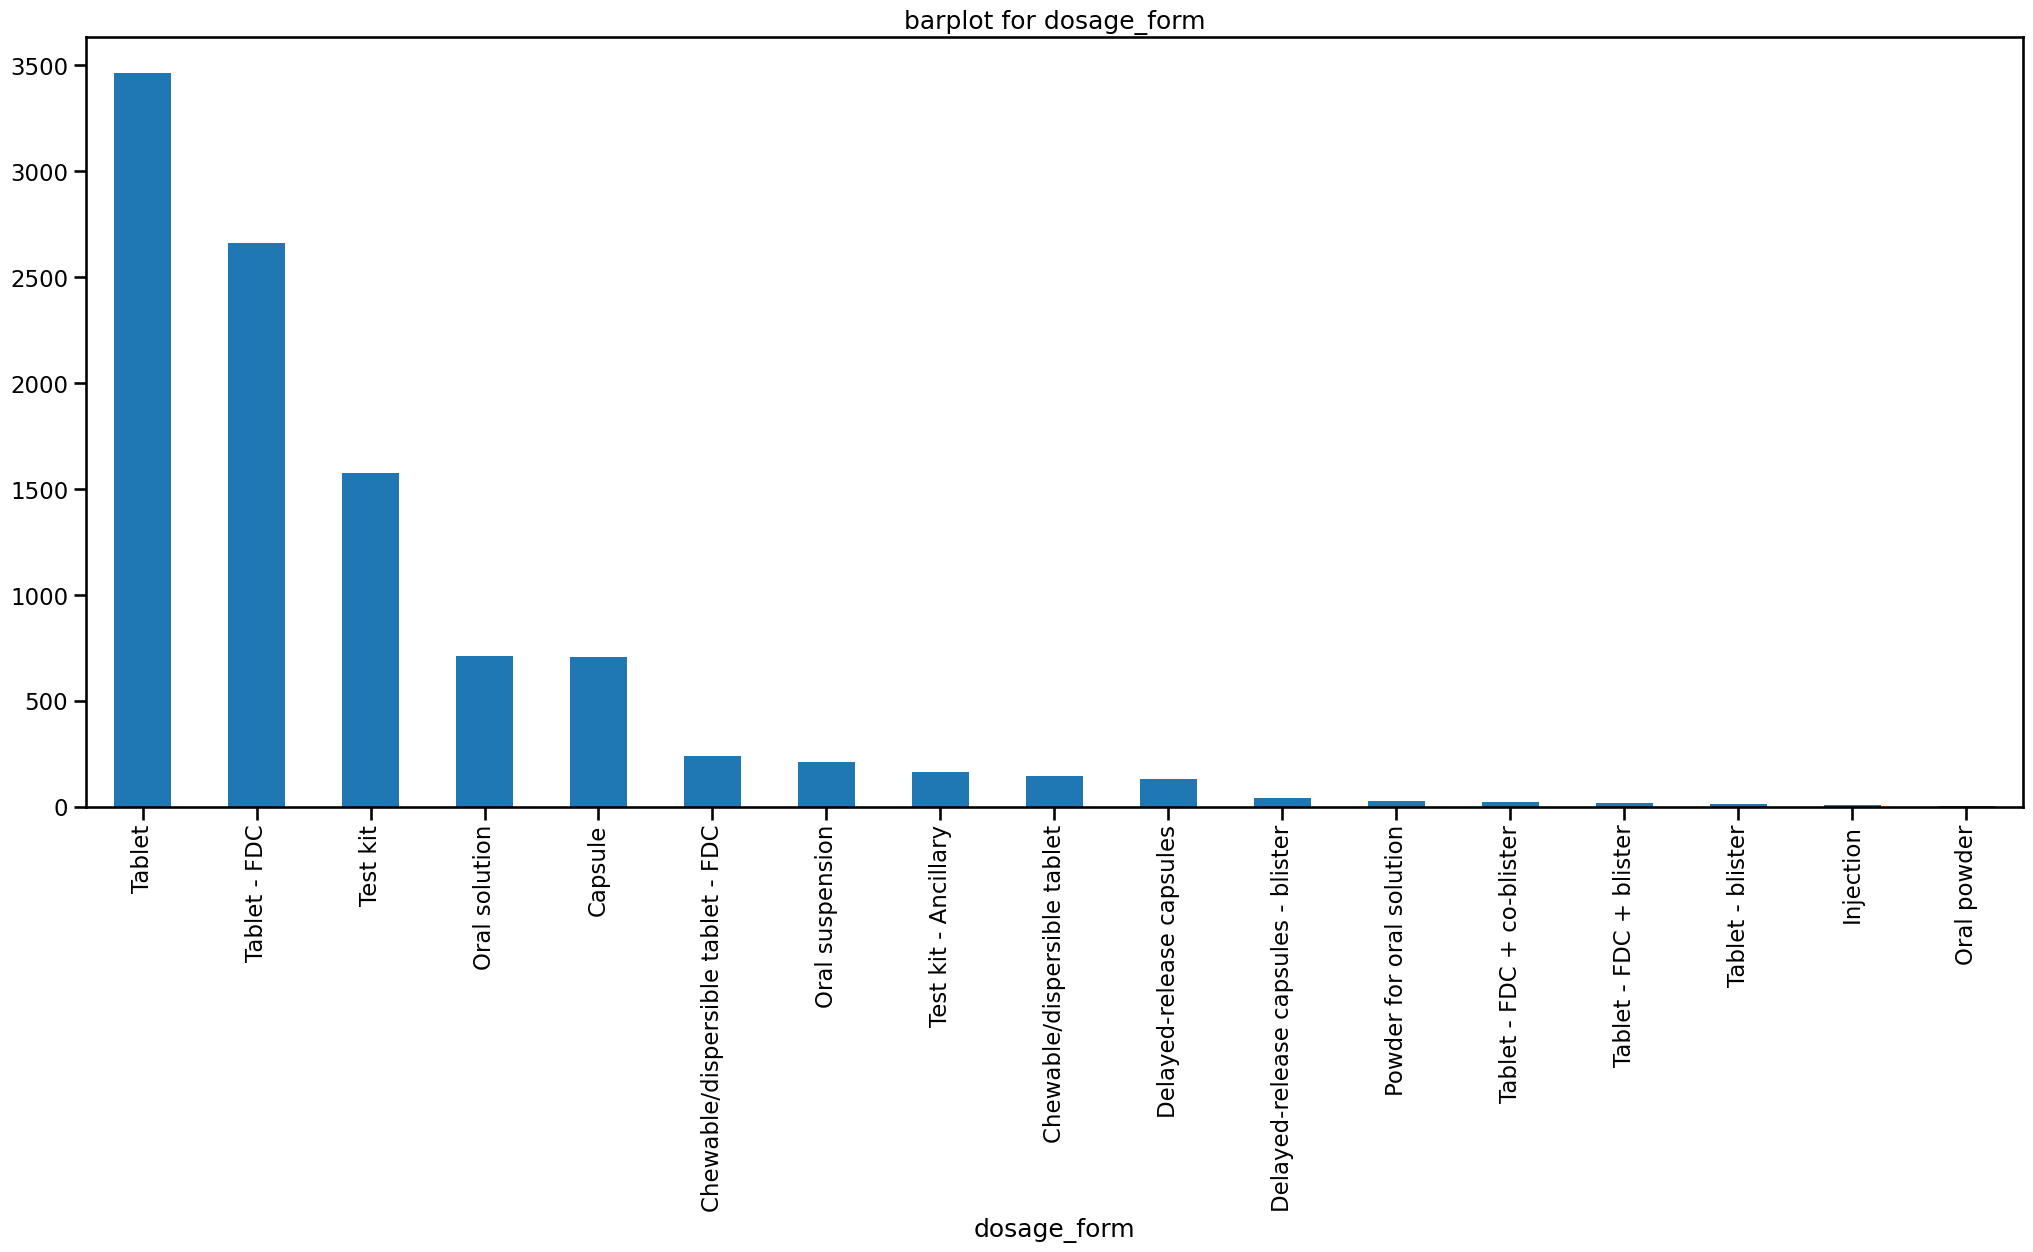

In [866]:
barplot(df["dosage_form"],"dosage_form")

In [867]:
#dropping dosage_form as it is dependent on other feature named dosage
df.drop("dosage_form",axis=1,inplace=True)

### Unit_of_measure_(per_pack)

In [868]:
df["unit_of_measure_(per_pack)"].value_counts()

unit_of_measure_(per_pack)
60      3993
30      2580
100      974
240      655
120      474
20       470
90       219
300      153
1        126
25       114
180       76
200       75
270       51
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
5          4
2          4
18         4
168        3
36         3
12         2
24         2
160        1
48         1
144        1
Name: count, dtype: int64

### line_item_quantity

In [869]:
df["line_item_quantity"].value_counts().head()

line_item_quantity
10000    93
1000     91
100      85
2000     73
5000     69
Name: count, dtype: int64

In [870]:
df["line_item_quantity"].value_counts().tail()

line_item_quantity
8276      1
39045     1
57925     1
60300     1
176100    1
Name: count, dtype: int64

### Manufacturing_site

In [871]:
df["manufacturing_site"].value_counts().head()

manufacturing_site
Aurobindo Unit III, India         3056
Mylan (formerly Matrix) Nashik    1383
Hetero Unit III Hyderabad IN       858
Cipla, Goa, India                  652
Strides, Bangalore, India.         530
Name: count, dtype: int64

In [872]:
df["manufacturing_site"].value_counts().tail()

manufacturing_site
Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway    1
Meditab (for Cipla) Daman IN                                              1
Medochemie Factory A, CY                                                  1
Remedica, Limassol, Cyprus                                                1
GSK Barnard Castle UK                                                     1
Name: count, dtype: int64

manufacturing_site
Aurobindo Unit III, India         3056
Mylan (formerly Matrix) Nashik    1383
Hetero Unit III Hyderabad IN       858
Cipla, Goa, India                  652
Strides, Bangalore, India.         530
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          215
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

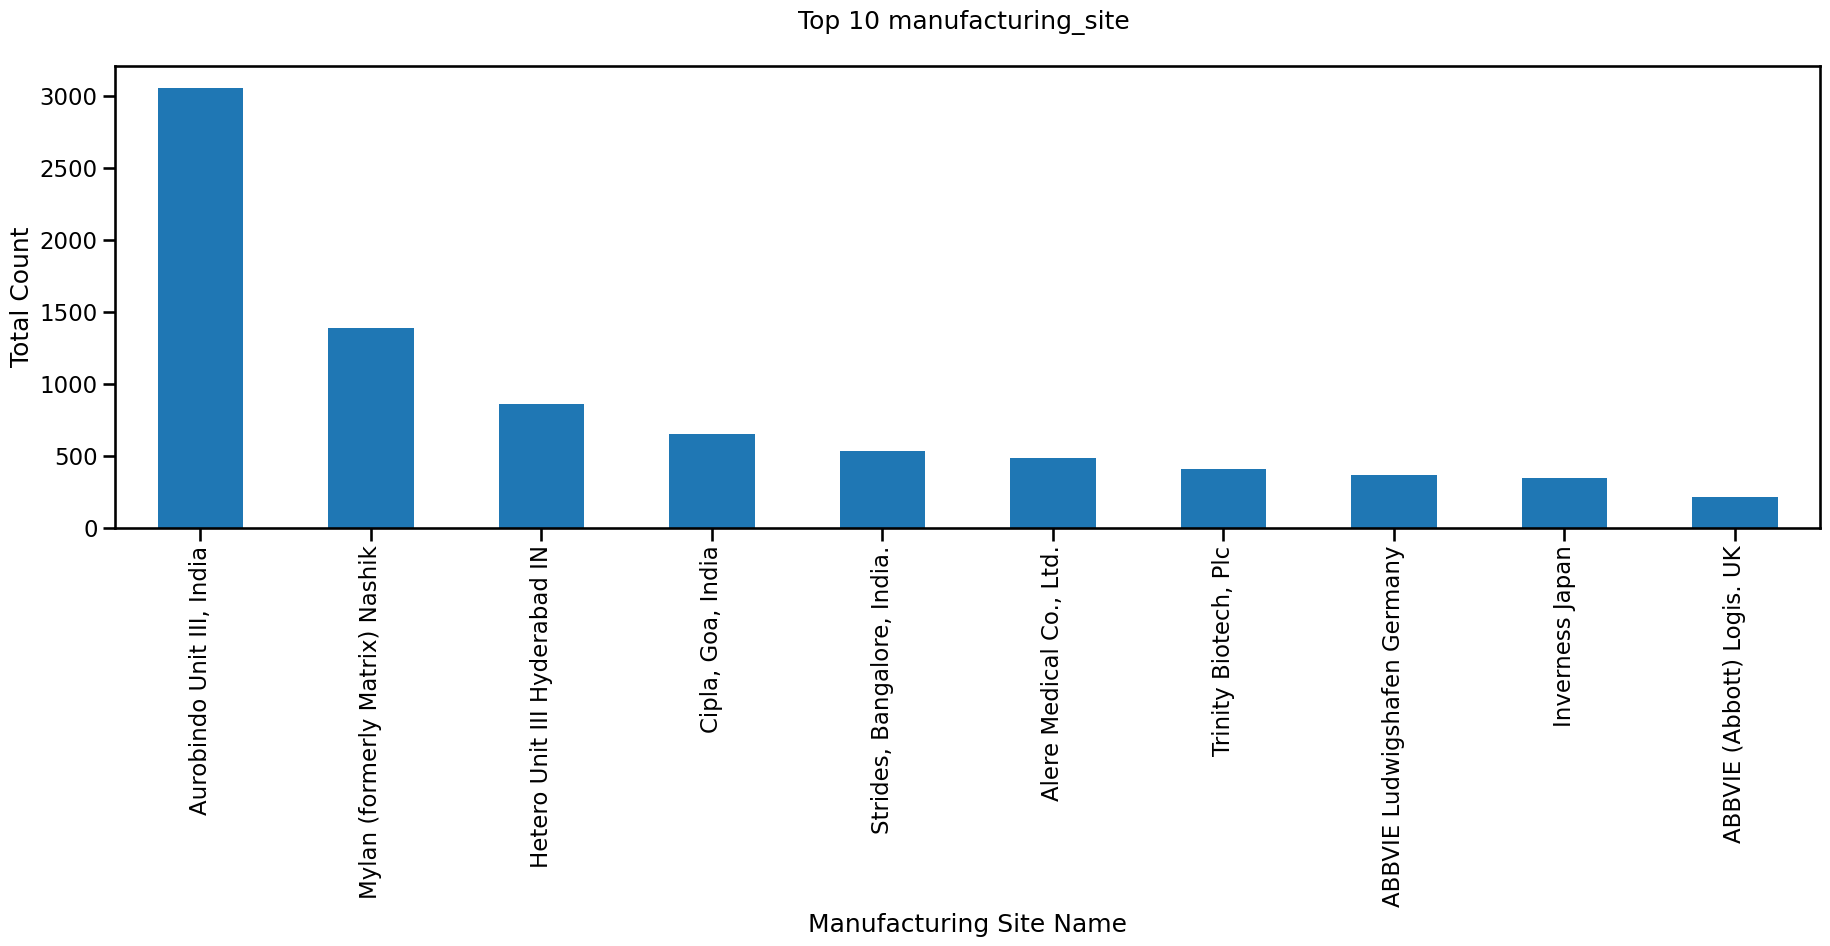

In [873]:
plt.figure(figsize=(22,6))
TopManufacturingSite=df.groupby('manufacturing_site').size().nlargest(10)
print(TopManufacturingSite)
TopManufacturingSite.plot(kind='bar')
plt.title('Top 10 manufacturing_site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [874]:
other_manufacture=df["manufacturing_site"].value_counts().to_dict()
other_cat=[]
for key,val in other_manufacture.items():
    if val<=500:
        other_cat.append(key)

In [875]:
df["manufacturing_site"]=df["manufacturing_site"].replace(other_cat,"other")

<Axes: xlabel='manufacturing_site'>

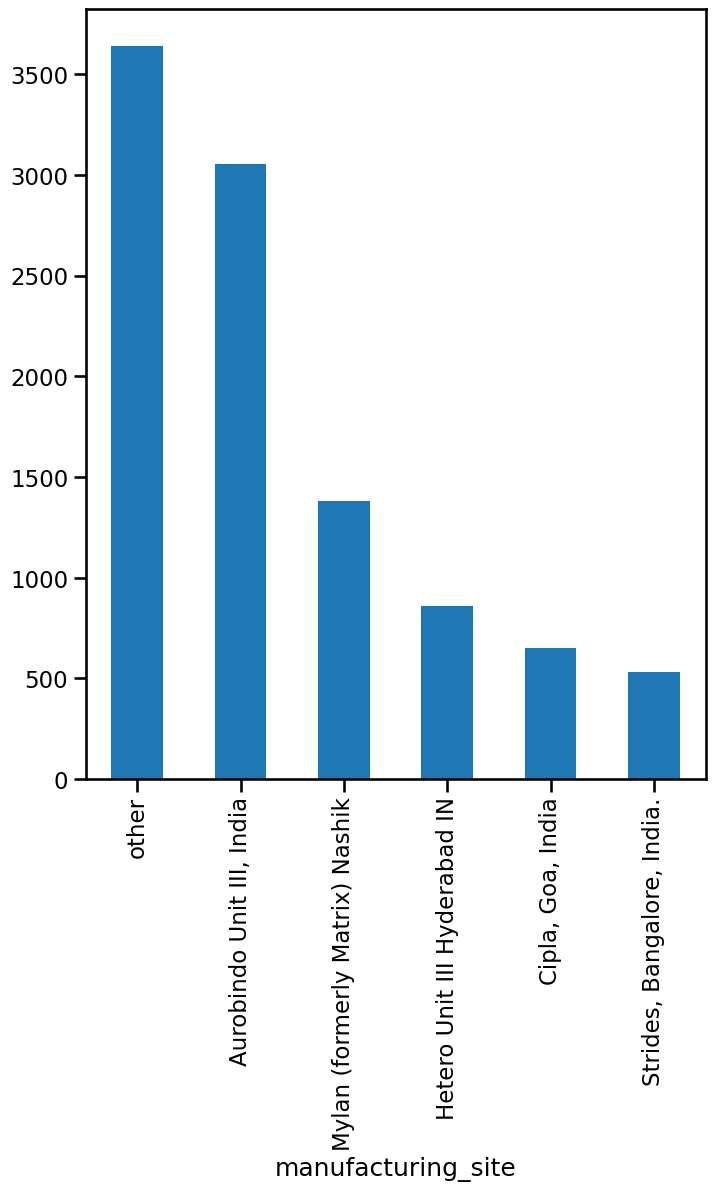

In [876]:
df["manufacturing_site"].value_counts().plot.bar()

### First_line_designation

In [877]:
df["first_line_designation"].value_counts()

first_line_designation
Yes    6876
No     3243
Name: count, dtype: int64

In [878]:
np.round(df["first_line_designation"].value_counts(normalize=True)*100,2)

first_line_designation
Yes    67.95
No     32.05
Name: proportion, dtype: float64

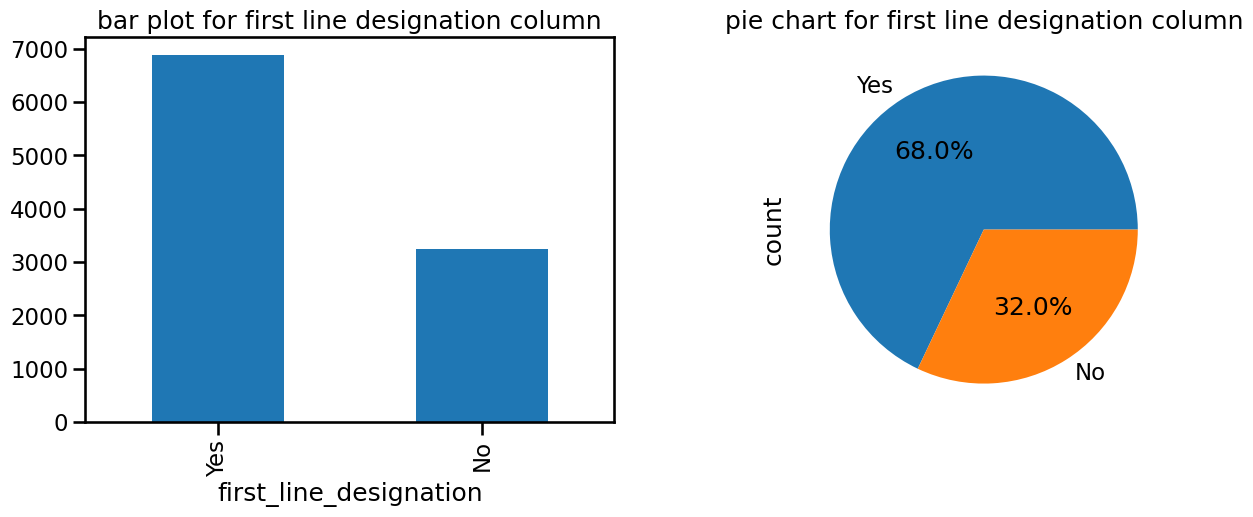

In [879]:
plot(df["first_line_designation"],"first line designation")

### Weight_(kilograms)

In [880]:
df["weight_(kilograms)"].value_counts().head(10)

weight_(kilograms)
Weight Captured Separately    1499
2                               29
6                               26
1                               21
5                               20
60                              20
4                               18
3                               18
12                              17
9                               17
Name: count, dtype: int64

In [881]:
df["weight_(kilograms)"].value_counts().tail()

weight_(kilograms)
2018    1
7349    1
5009    1
2035    1
7353    1
Name: count, dtype: int64

In [882]:
df.drop("weight_(kilograms)",axis=1,inplace=True)

### freight_cost_(usd)

In [883]:
df["freight_cost_(usd)"].value_counts().head()

freight_cost_(usd)
Freight Included in Commodity Cost    1440
Invoiced Separately                    231
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
Name: count, dtype: int64

In [884]:
df["freight_cost_(usd)"].value_counts().tail()

freight_cost_(usd)
8256.97     1
3891.2      1
2949.1      1
20188.13    1
5215.49     1
Name: count, dtype: int64

In [885]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [886]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].apply(trans_freight_cost)

In [887]:
df["freight_cost_(usd)"].value_counts().head()

freight_cost_(usd)
0           1671
9736.1        36
6147.18       27
13398.06      16
7329.83       12
Name: count, dtype: int64

In [888]:
df["freight_cost_(usd)"].describe()

count     7725
unique    5343
top          0
freq      1671
Name: freight_cost_(usd), dtype: int64

In [889]:
df.isna().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
fulfill_via                        0
vendor_inco_term                   0
pq_first_sent_to_client_date       0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
brand                              0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
freight_cost_(usd)              2394
shipment_mode                      0
line_item_insurance_(usd)          0
dtype: int64

In [890]:
median_value=df["freight_cost_(usd)"].median()
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].replace(np.nan,median_value)
df["freight_cost_(usd)"].head()

0      780.34
1      4521.5
2     1653.78
3    16007.06
4    45450.08
Name: freight_cost_(usd), dtype: object

In [891]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].astype("float")

Description of freight_cost_(usd)
----------------------------------------------------------------------------
count     10119.000000
mean       7536.104702
std       13156.759791
min           0.000000
25%        1211.490000
50%        3526.690000
75%        7783.400000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

 Skewness of freight_cost_(usd)
----------------------------------------------------------------------------
5.6617

 Histogram and Boxplot of freight_cost_(usd)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


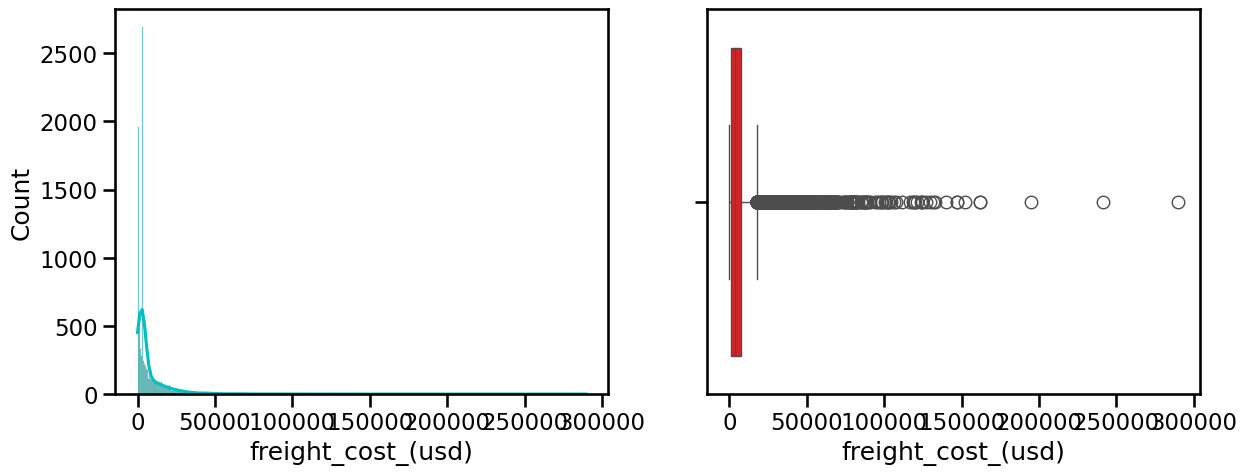

In [892]:
univariateAnalysis_numeric('freight_cost_(usd)',100)

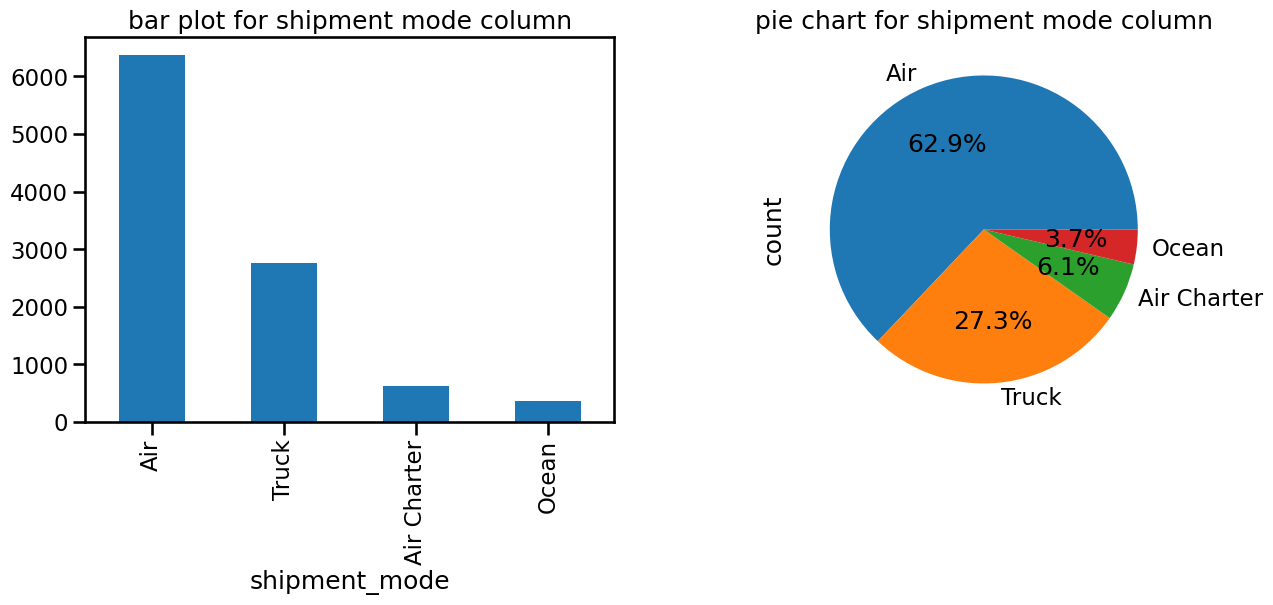

In [893]:
df["shipment_mode"].value_counts()

plot(df["shipment_mode"],"shipment mode")

### line_item_insurance_(usd)

In [894]:
df["line_item_insurance_(usd)"].value_counts().head()

line_item_insurance_(usd)
47.04    289
0.00      44
0.02      34
0.07      32
0.05      30
Name: count, dtype: int64

In [895]:
df["line_item_insurance_(usd)"].describe()

count    10119.000000
mean       232.400635
std        487.856951
min          0.000000
25%          6.975000
50%         47.040000
75%        239.160000
max       7005.490000
Name: line_item_insurance_(usd), dtype: float64

Description of line_item_insurance_(usd)
----------------------------------------------------------------------------
count    10119.000000
mean       232.400635
std        487.856951
min          0.000000
25%          6.975000
50%         47.040000
75%        239.160000
max       7005.490000
Name: line_item_insurance_(usd), dtype: float64

 Skewness of line_item_insurance_(usd)
----------------------------------------------------------------------------
4.7828

 Histogram and Boxplot of line_item_insurance_(usd)
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


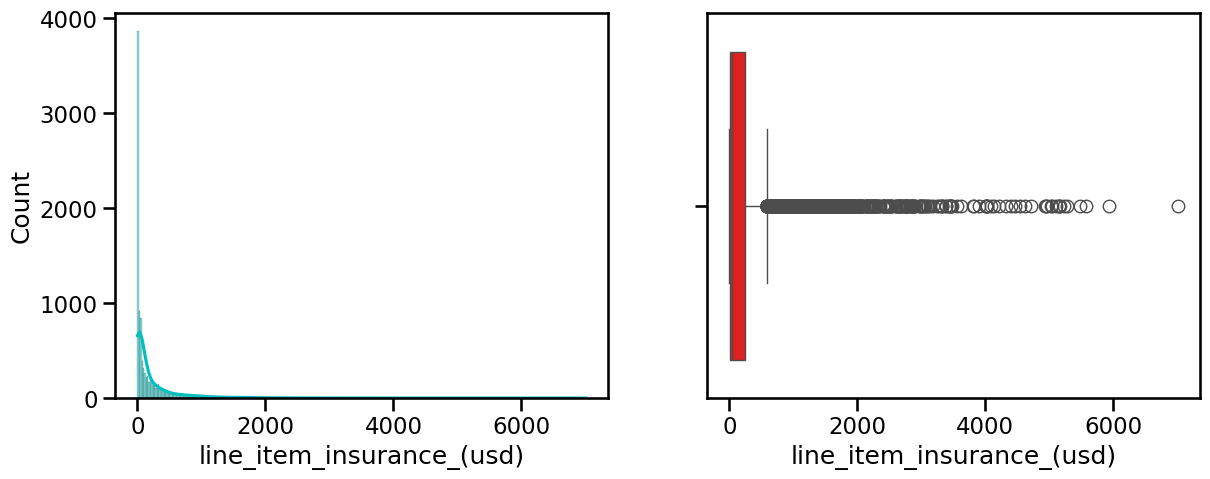

In [896]:
univariateAnalysis_numeric("line_item_insurance_(usd)",60)

In [897]:
df['delivery_recorded_date']=pd.to_datetime(df['delivery_recorded_date'])
df['pq_first_sent_to_client_date']=pd.to_datetime(df['pq_first_sent_to_client_date'])

In [898]:
#calculating total no of days to process the delivery
df["days_to_process"]=df["delivery_recorded_date"]-df["pq_first_sent_to_client_date"]
df["days_to_process"].head(5)

0   -1095 days
1    -930 days
2   -1009 days
3   -1004 days
4   -1025 days
Name: days_to_process, dtype: timedelta64[ns]

In [899]:
df['days_to_process'] = df['days_to_process'].dt.days.astype('int64')

Description of days_to_process
----------------------------------------------------------------------------
count    10119.00000
mean        39.46052
std        277.96314
min      -1126.00000
25%         27.00000
50%        125.00000
75%        194.00000
max        724.00000
Name: days_to_process, dtype: float64

 Skewness of days_to_process
----------------------------------------------------------------------------
-1.5612

 Histogram and Boxplot of days_to_process
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


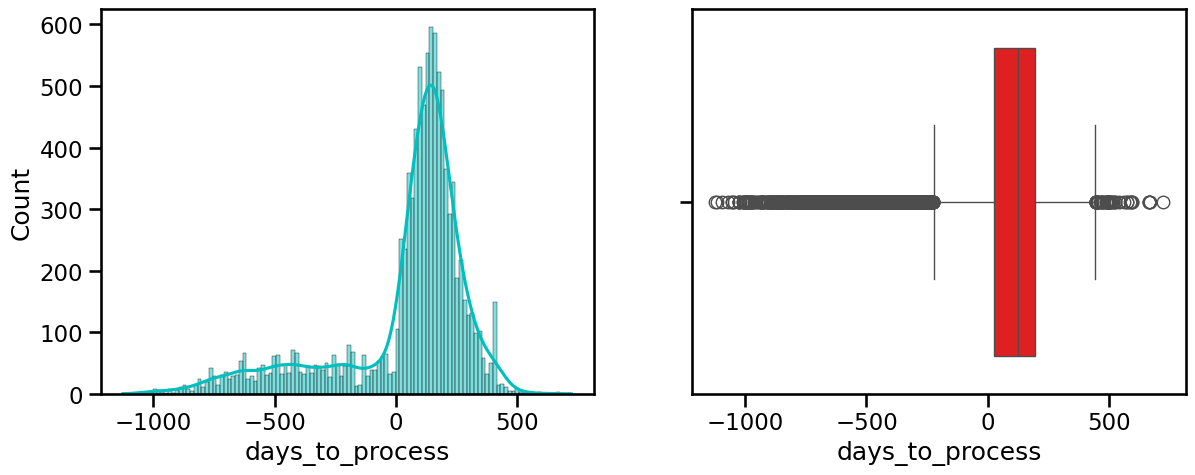

In [900]:
univariateAnalysis_numeric('days_to_process',60)

In [901]:
df.drop(["delivery_recorded_date","pq_first_sent_to_client_date","scheduled_delivery_date"],axis=1,inplace=True)

In [902]:
df.drop(["delivered_to_client_date"],axis=1,inplace=True)

In [903]:
df.head()

po_/_so_# asn/dn_#        country  fulfill_via vendor_inco_term  \
0      SCMS      ASN  Côte d'Ivoire  Direct Drop              EXW   
1      SCMS      ASN        Vietnam  Direct Drop              EXW   
2      SCMS      ASN  Côte d'Ivoire  Direct Drop              FCA   
3      SCMS      ASN        Vietnam  Direct Drop              EXW   
4      SCMS      ASN        Vietnam  Direct Drop              EXW   

  product_group sub_classification vendor    brand  \
0         other               HIV+  other    other   
1           ARV          Pediatric  other  Generic   
2         other               HIV+  other    other   
3           ARV              Adult  other  Generic   
4           ARV              Adult  other  Generic   

   unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                          30                  19            551.0   
1                         240                1000           6200.0   
2                         100                 500          40000.0   
3                          60               31920         127360.8   
4                          60               38000         121600.0   

   pack_price  unit_price         manufacturing_site first_line_designation  \
0       29.00        0.97                      other                    Yes   
1        6.20        0.03  Aurobindo Unit III, India                    Yes   
2       80.00        0.80                      other                    Yes   
3        3.99        0.07                      other                    Yes   
4        3.20        0.05  Aurobindo Unit III, India                    Yes   

   freight_cost_(usd) shipment_mode  line_item_insurance_(usd)  \
0              780.34           Air                      47.04   
1             4521.50           Air                      47.04   
2             1653.78           Air                      47.04   
3            16007.06           Air                      47.04   
4            45450.08           Air                      47.04   

   days_to_process  
0            -1095  
1             -930  
2            -1009  
3            -1004  
4            -1025

In [904]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10119 entries, 0 to 10323
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   po_/_so_#                   10119 non-null  object 
 1   asn/dn_#                    10119 non-null  object 
 2   country                     10119 non-null  object 
 3   fulfill_via                 10119 non-null  object 
 4   vendor_inco_term            10119 non-null  object 
 5   product_group               10119 non-null  object 
 6   sub_classification          10119 non-null  object 
 7   vendor                      10119 non-null  object 
 8   brand                       10119 non-null  object 
 9   unit_of_measure_(per_pack)  10119 non-null  int64  
 10  line_item_quantity          10119 non-null  int64  
 11  line_item_value             10119 non-null  float64
 12  pack_price                  10119 non-null  float64
 13  unit_price                  10119 no

### Analysis w.r.t to Target Variable

In [905]:
def Analysis_target(column,nbins):

    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(40,10))

    print(sns.barplot(x=df[column],y=df["line_item_value"], color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column],y=df["line_item_value"],ax=axs[1],color='r'))

    plt.show();

Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


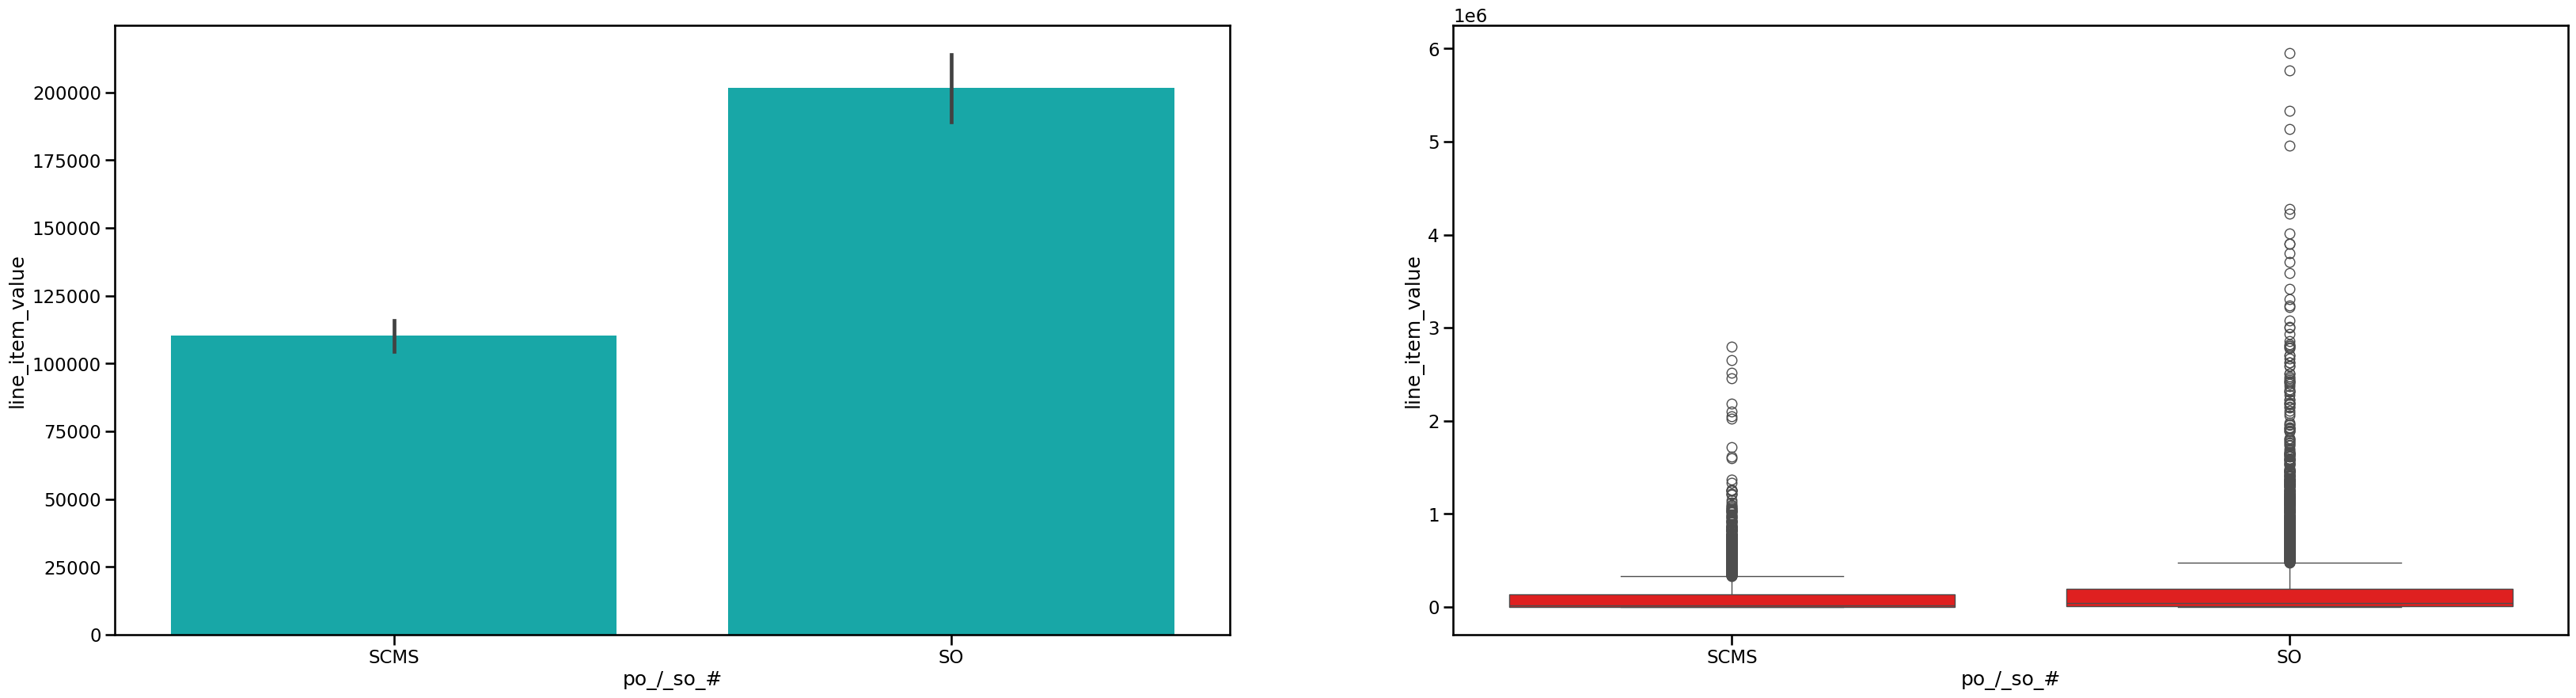

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


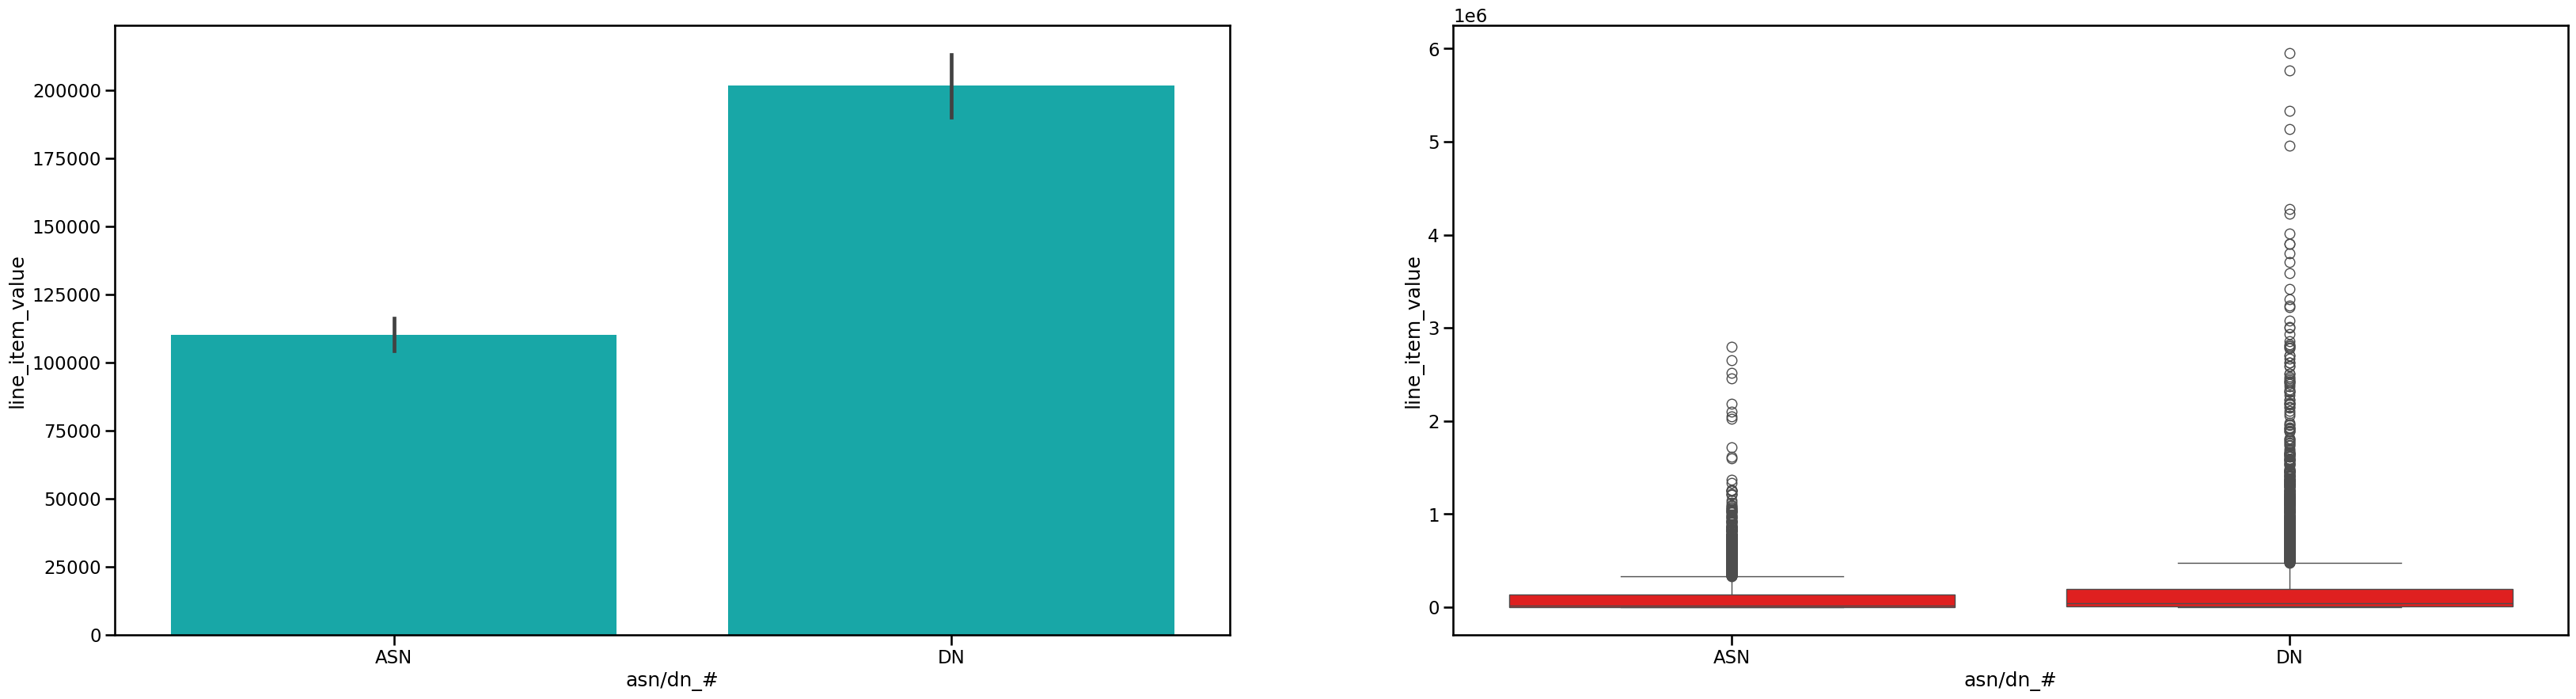

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


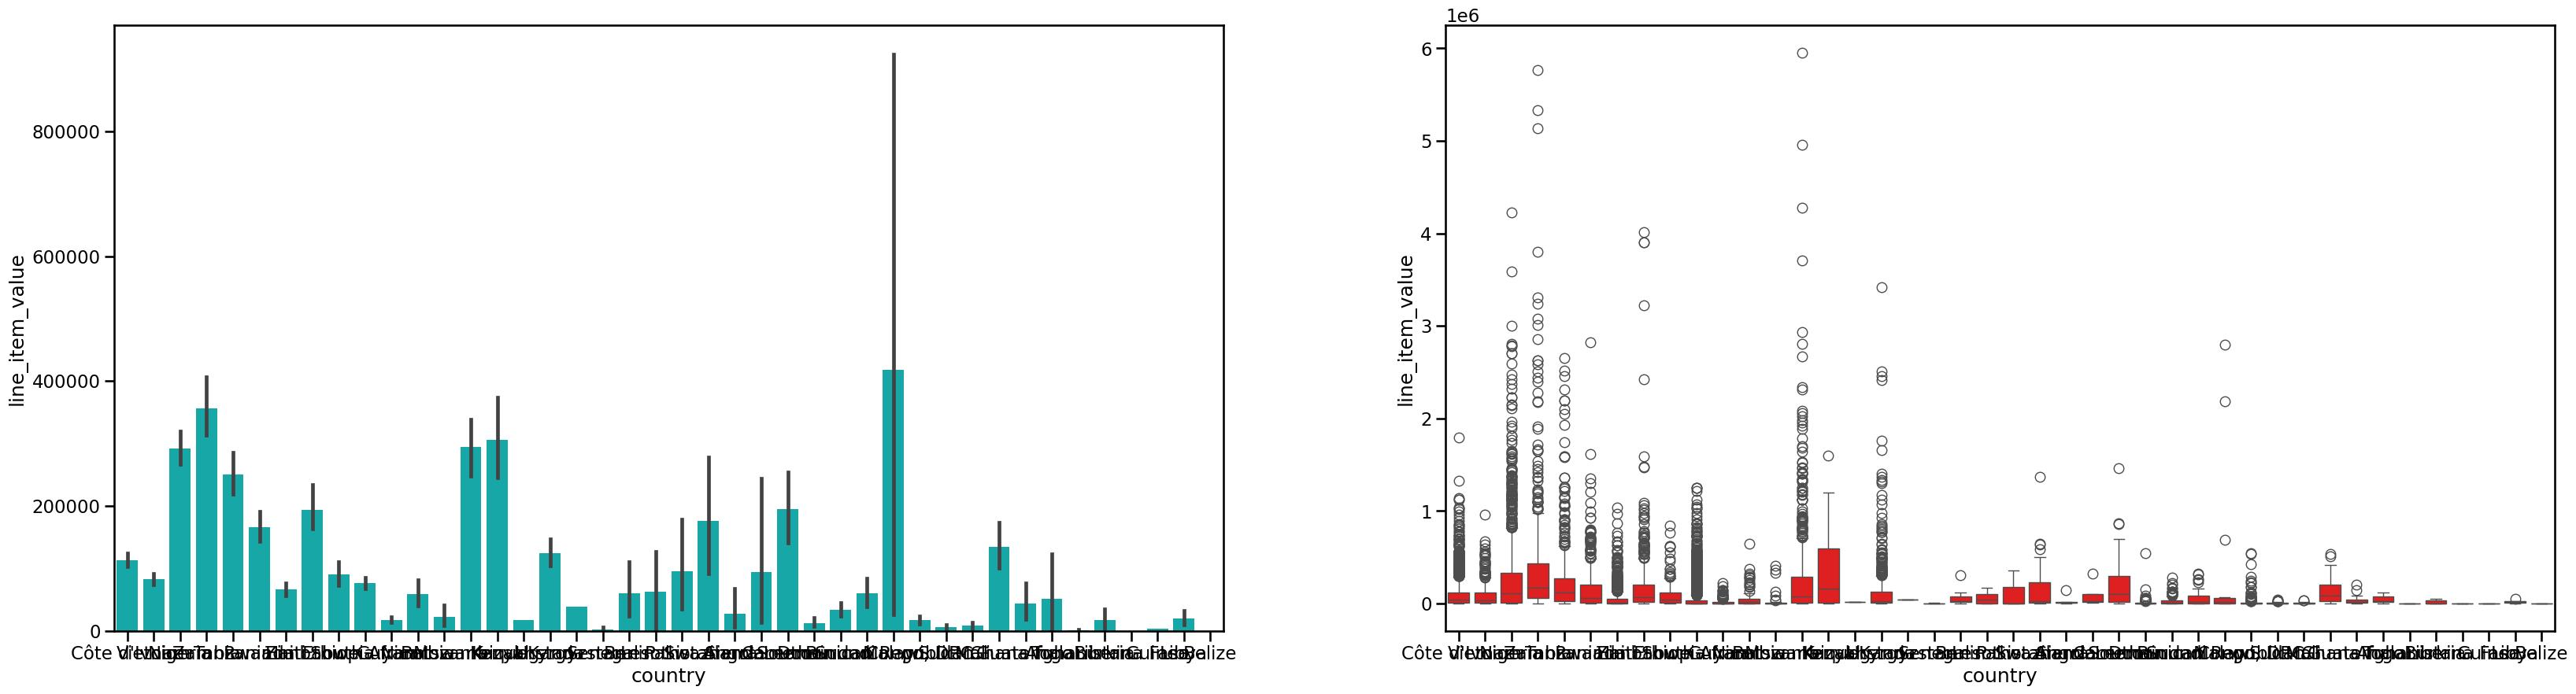

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


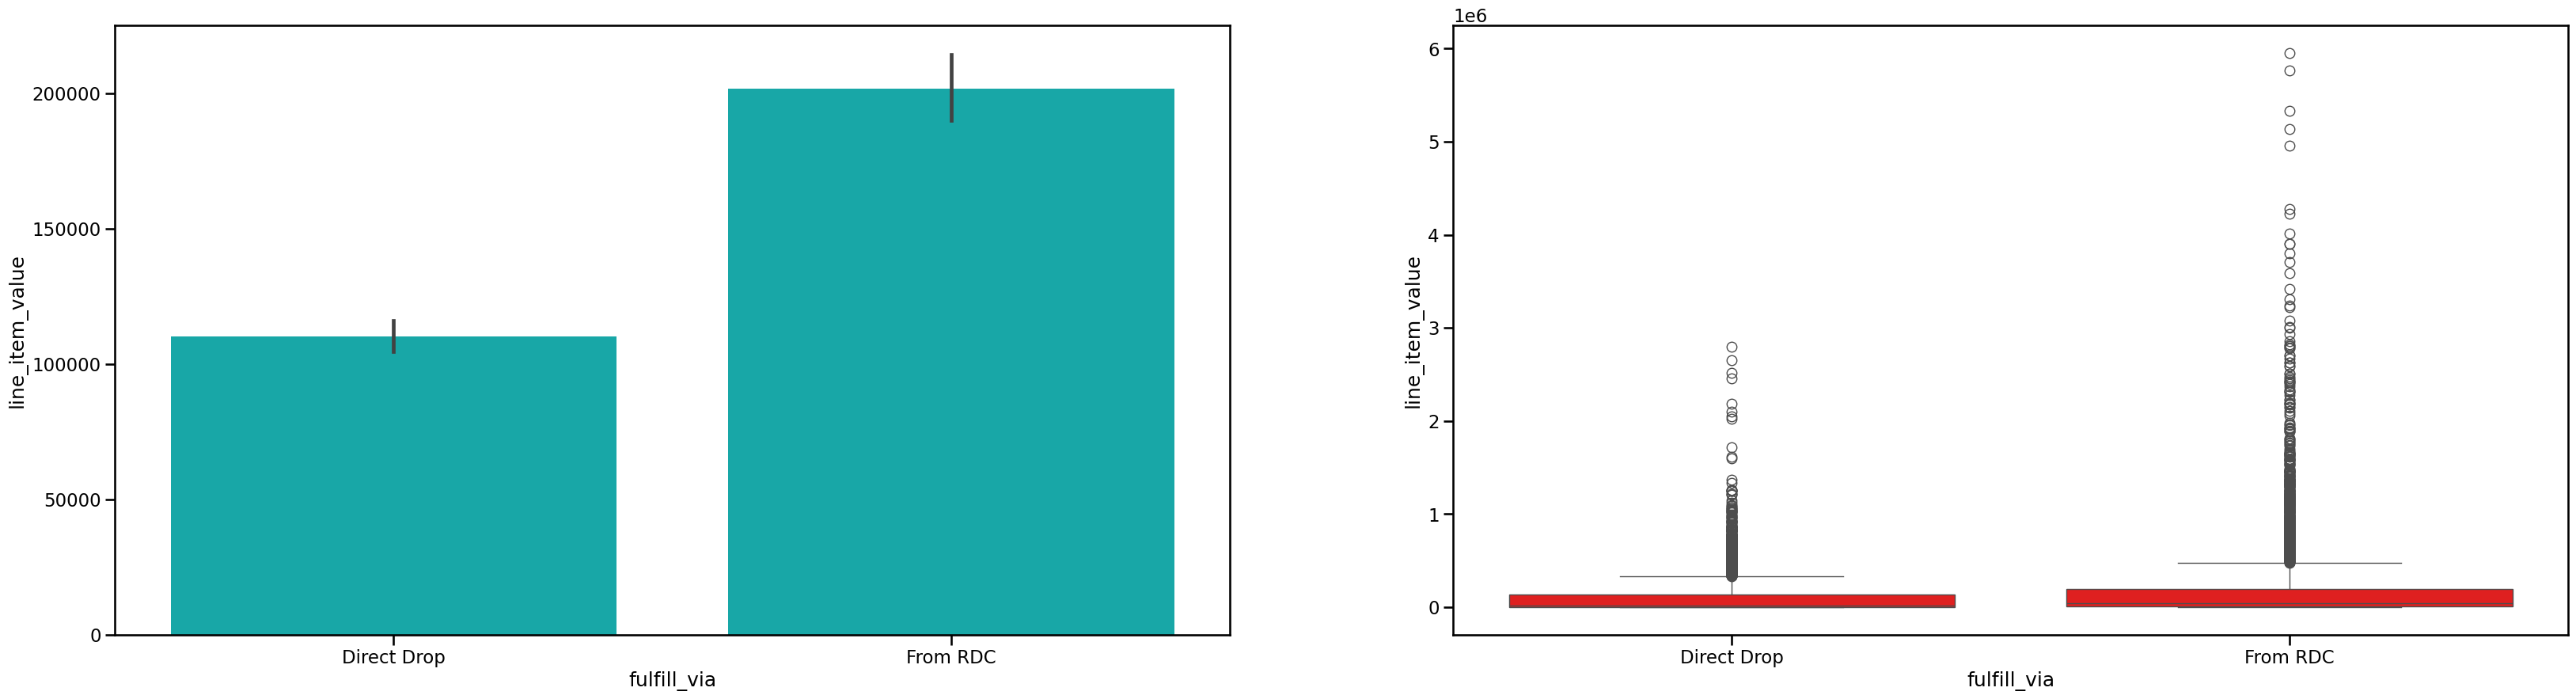

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


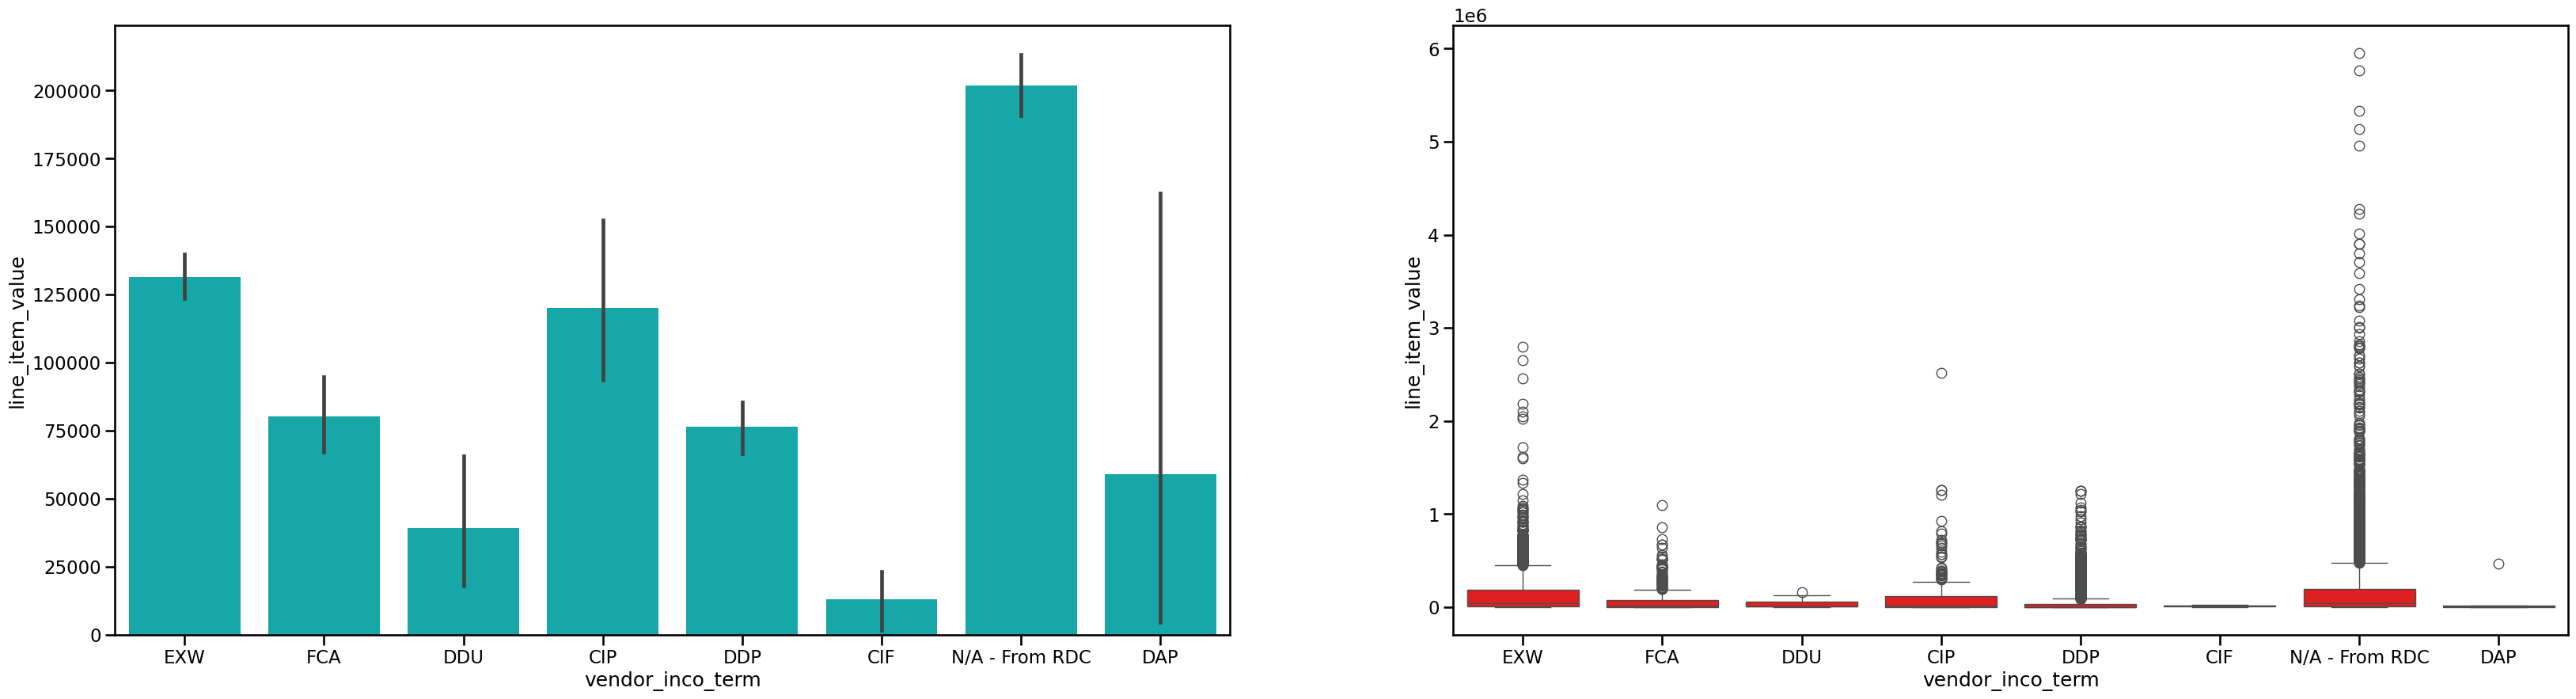

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


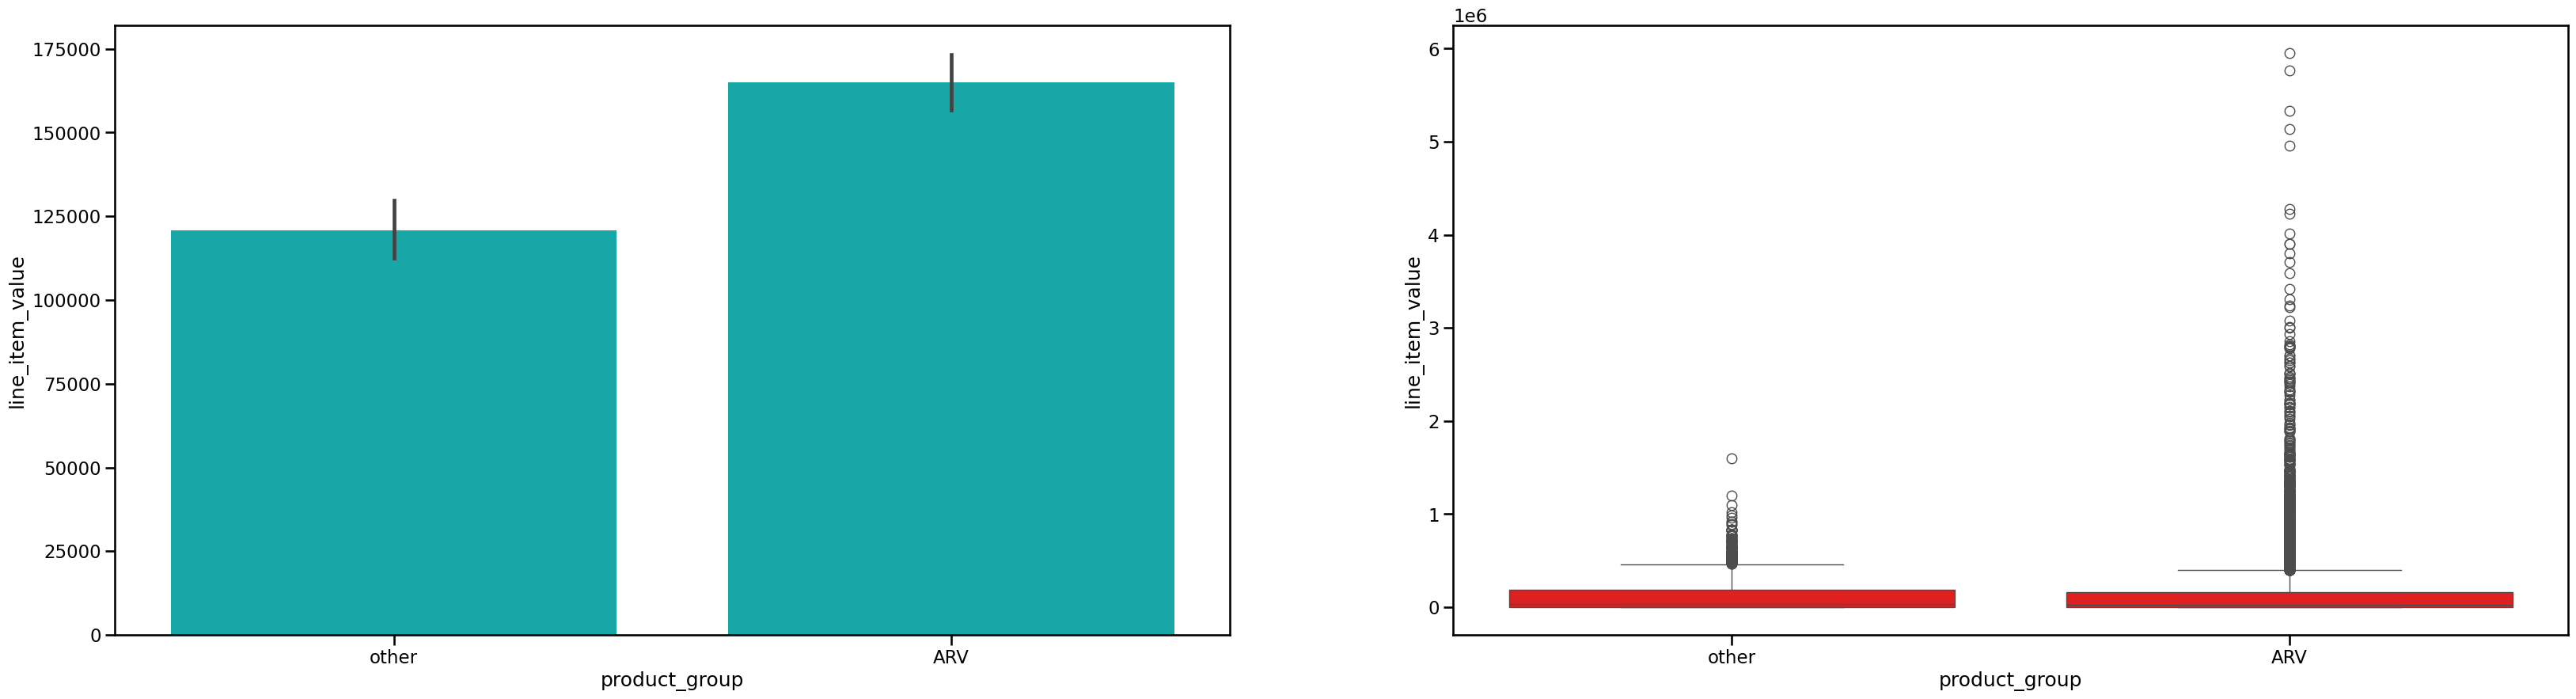

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


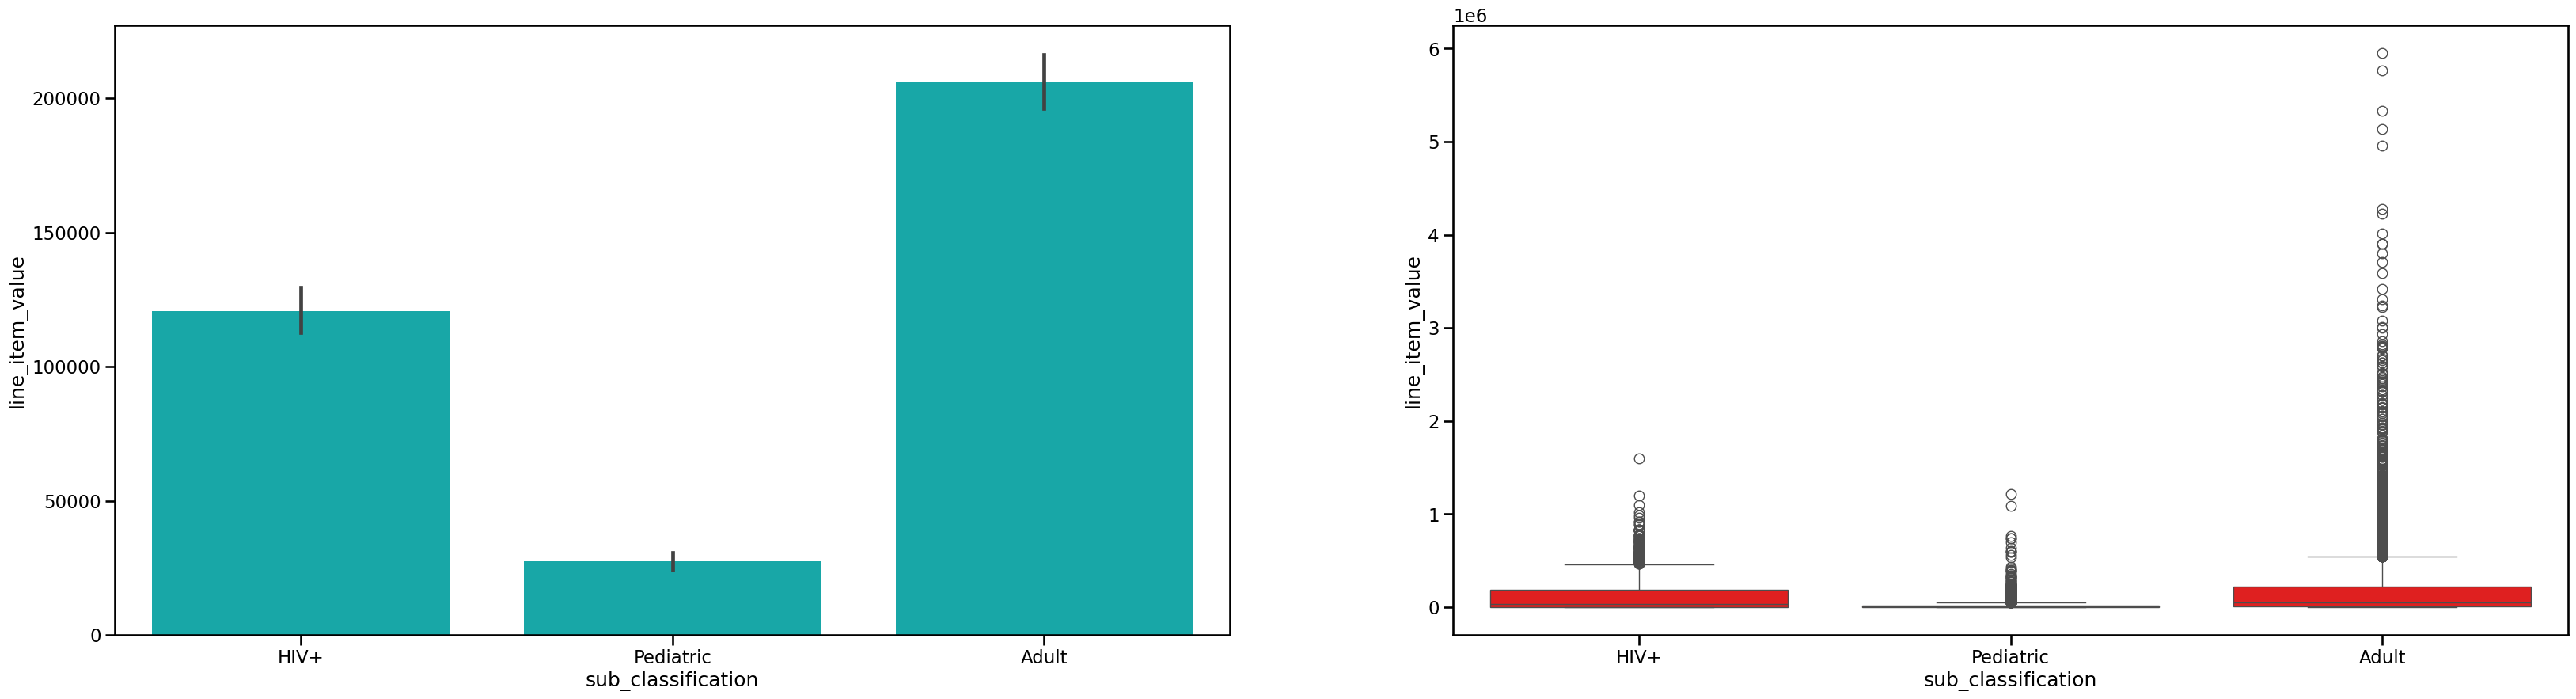

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


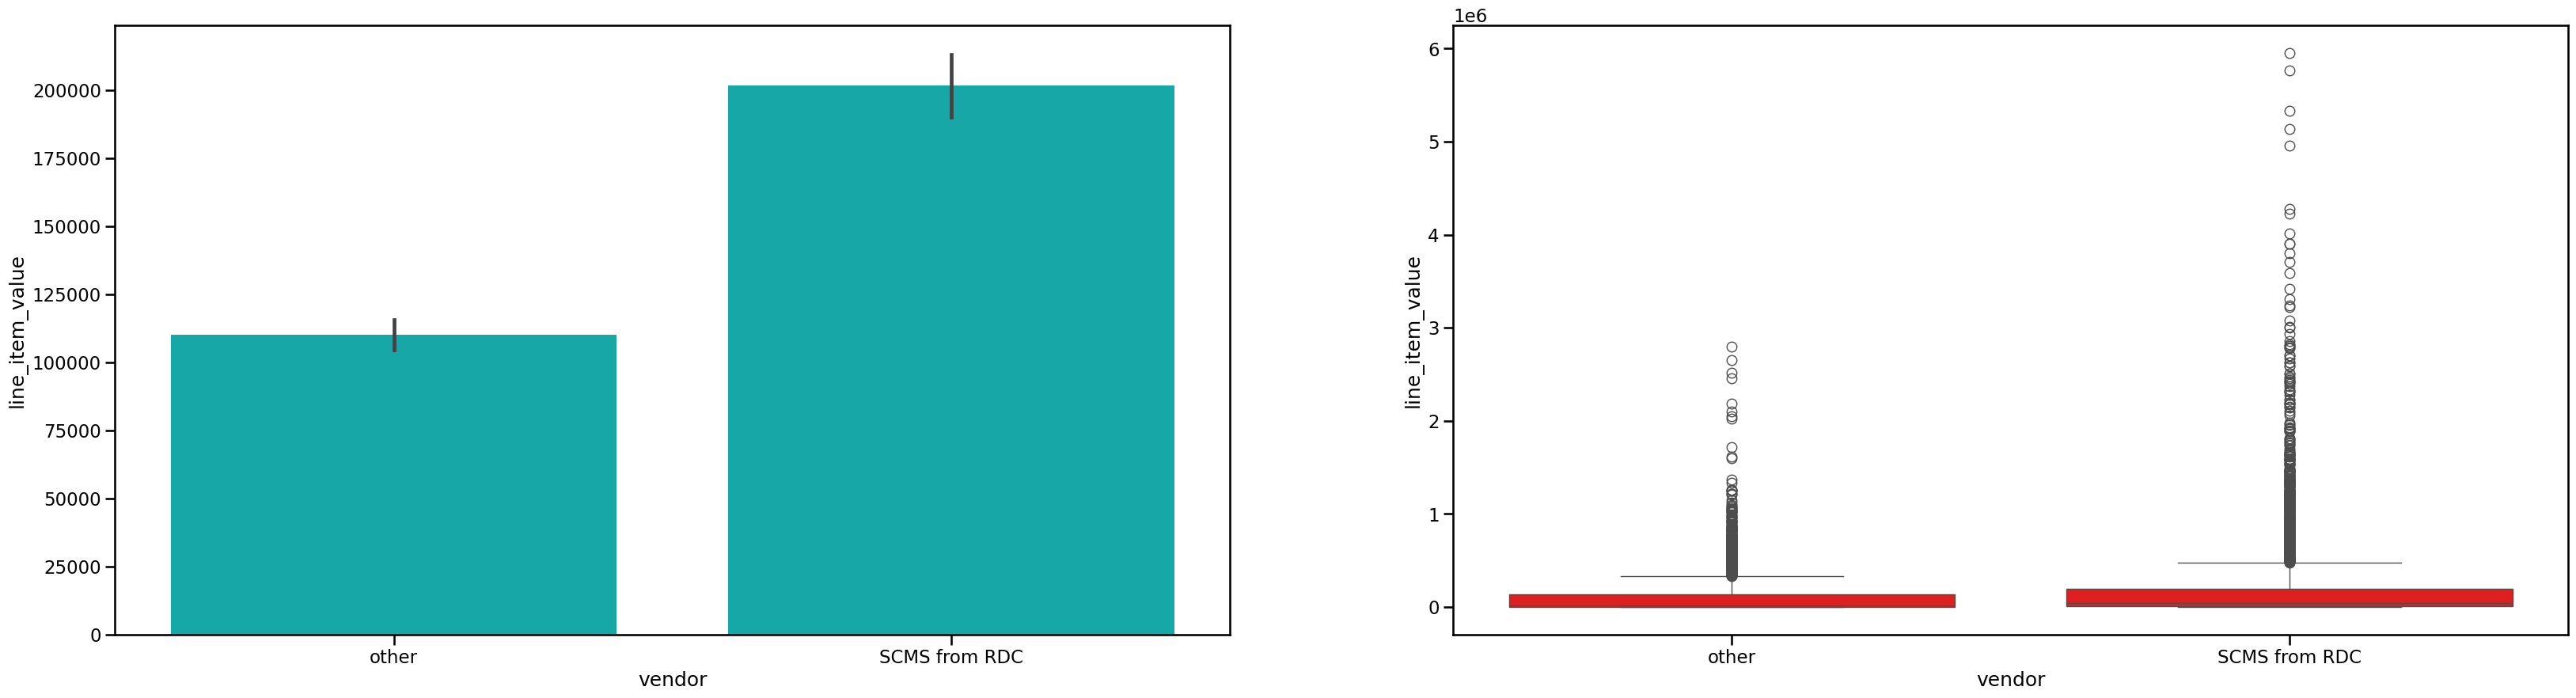

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


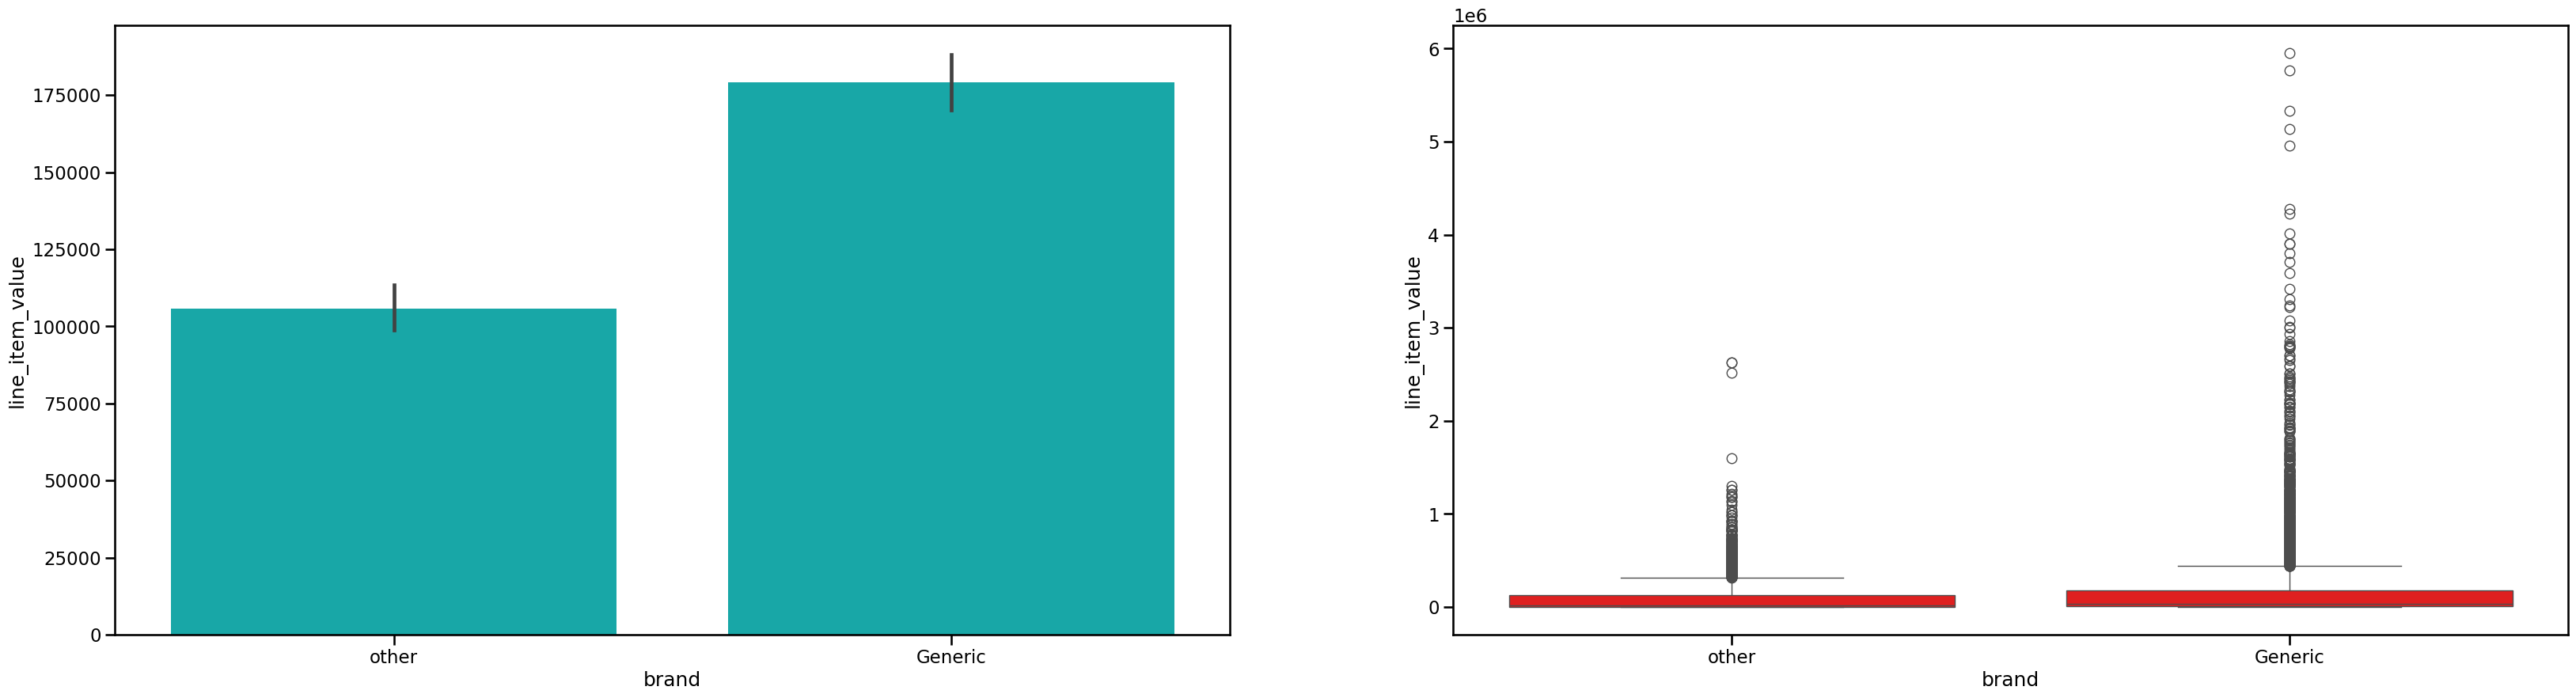

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


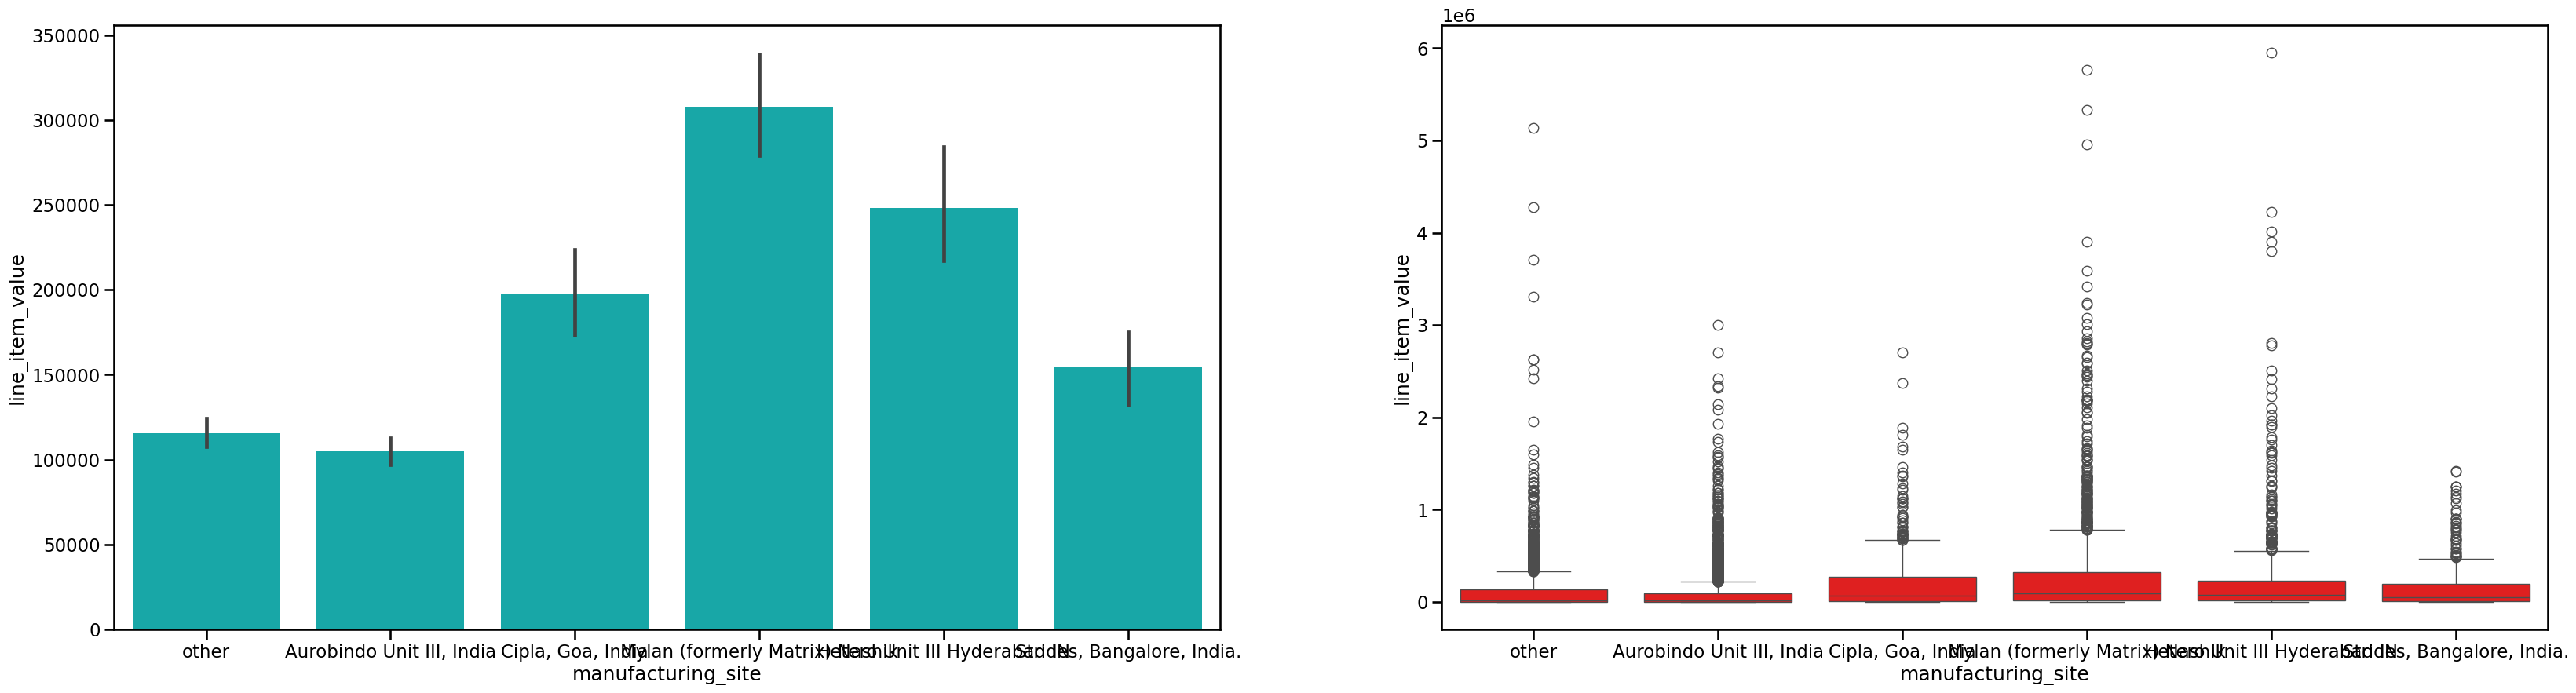

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


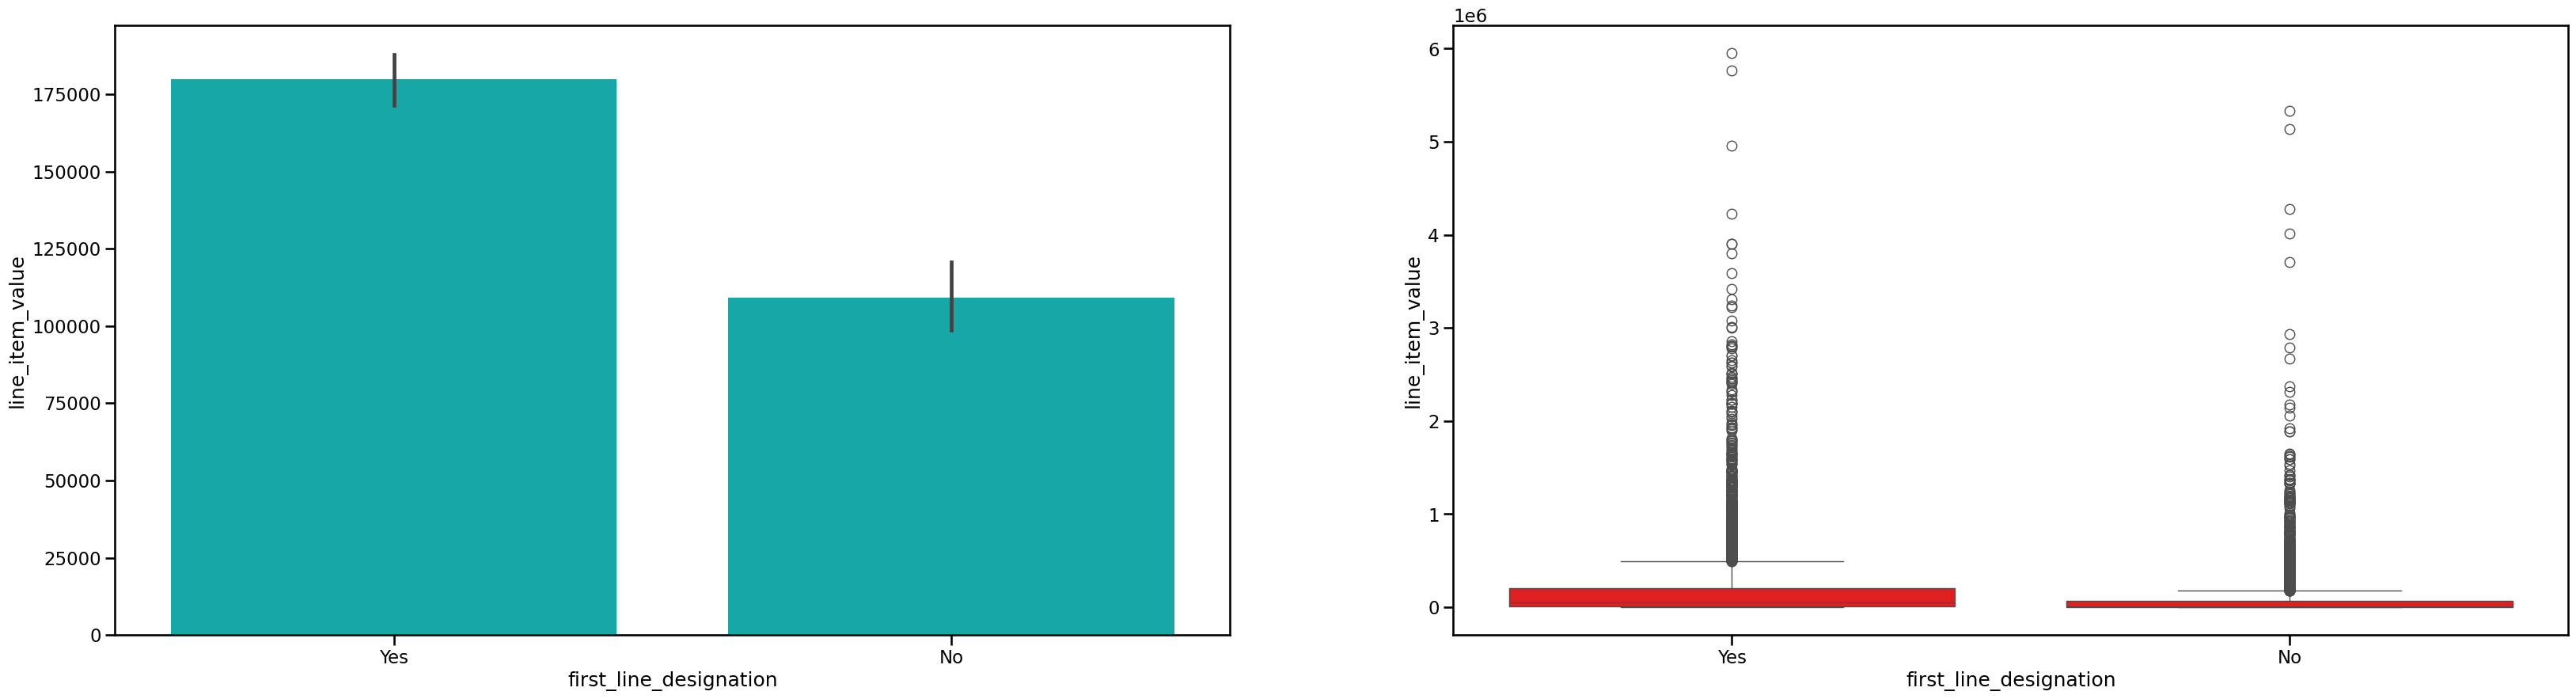

None
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


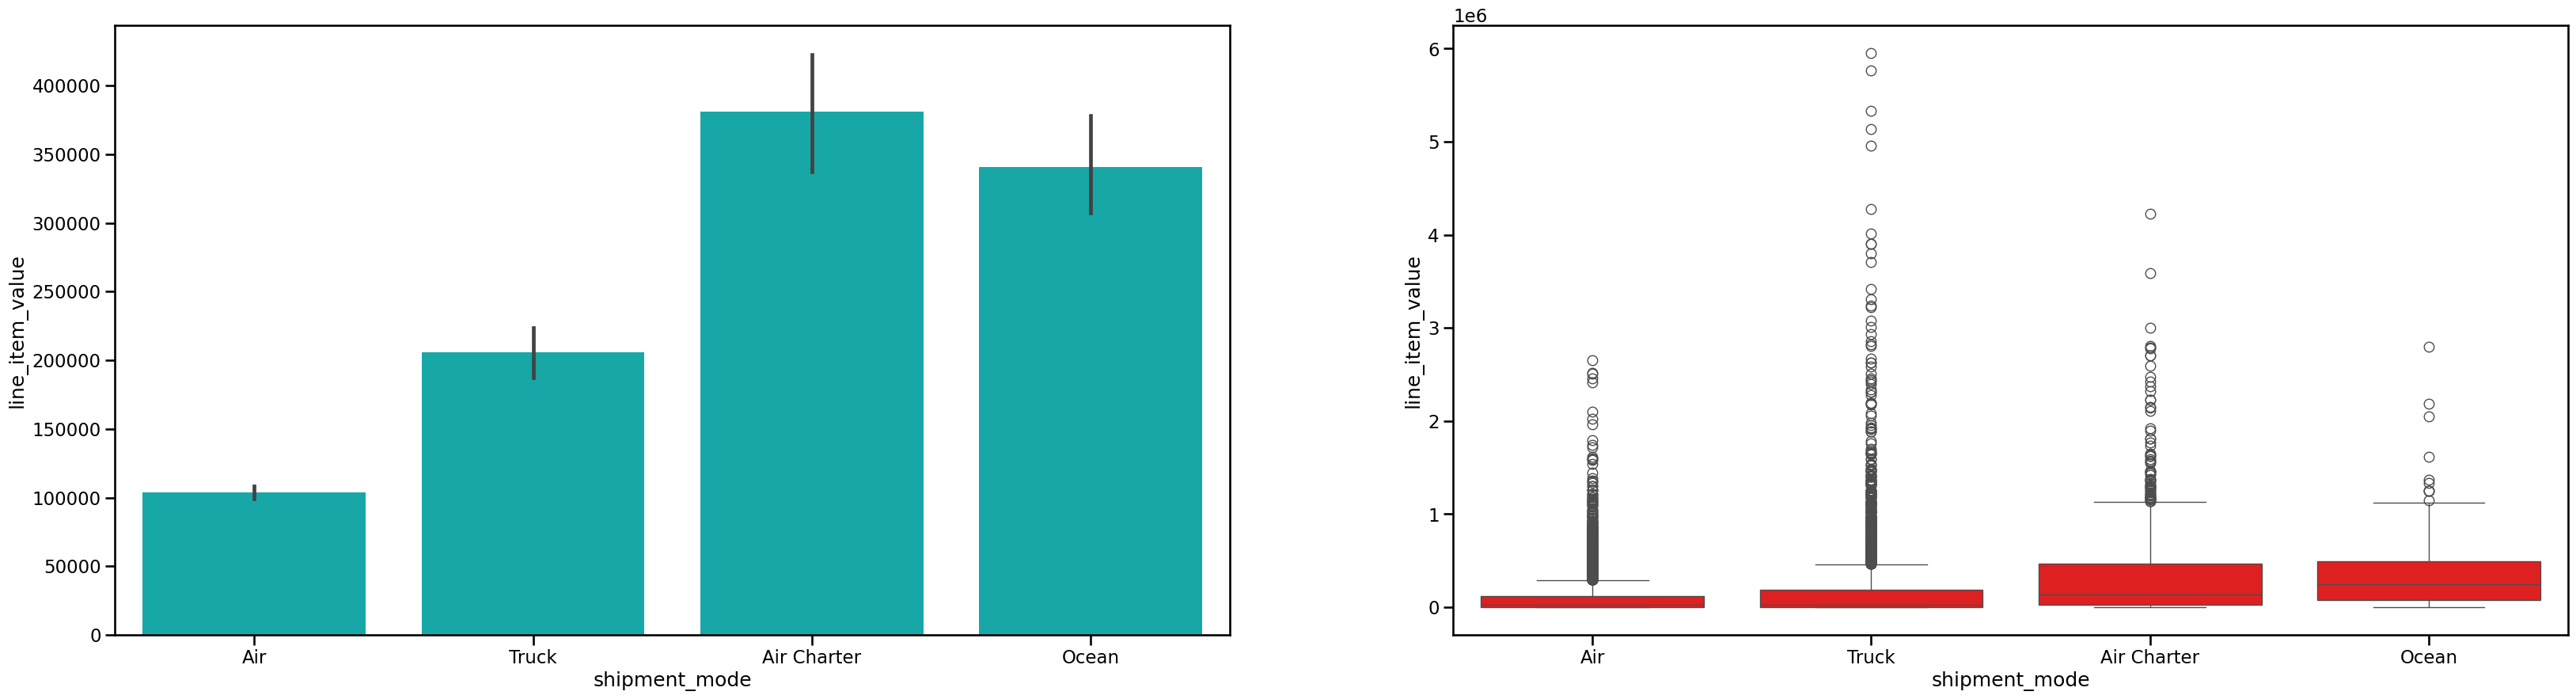

None


In [906]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(Analysis_target(column,30))

### Visualizing Scatterplots w.r.t Target Variable

In [907]:
def Scatterplots(column):

    fig,axs = plt.subplots(figsize=(8,5))
    sns.scatterplot(x=df[column],y=df["line_item_value"],color="orange")
    plt.show();

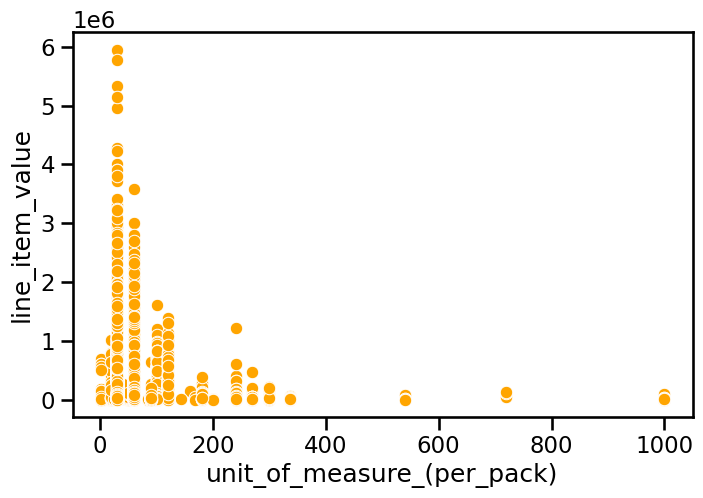

None


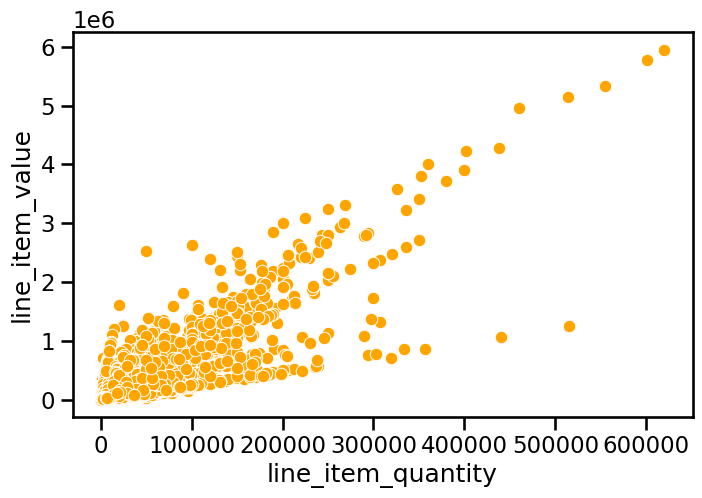

None


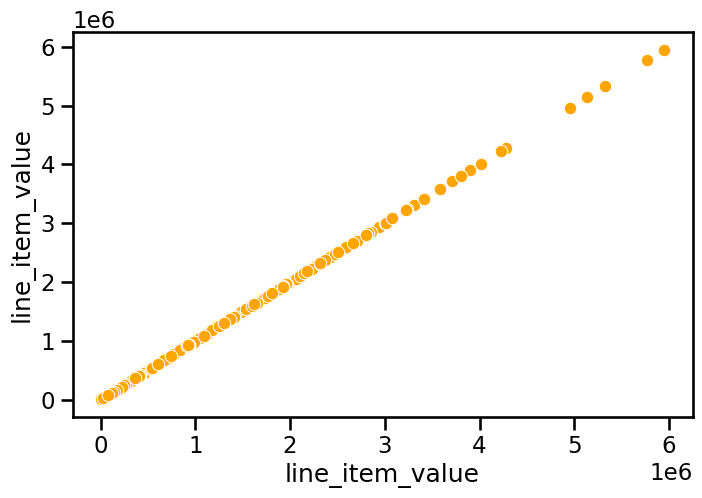

None


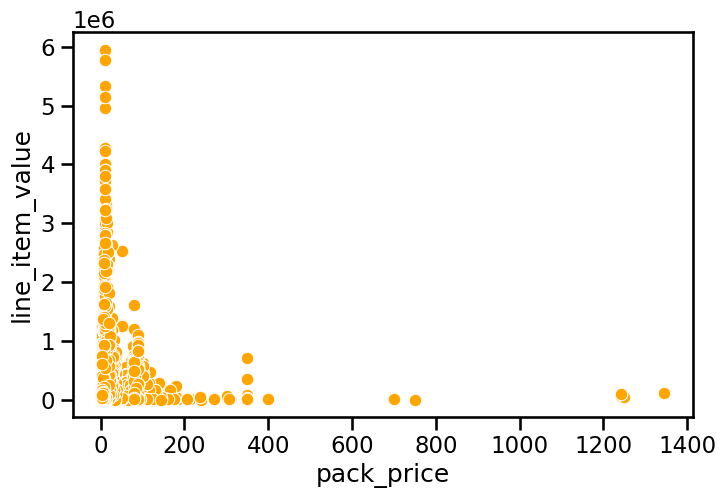

None


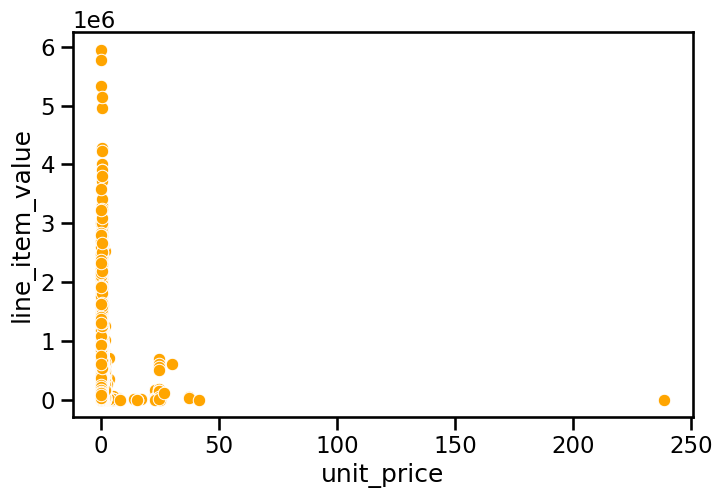

None


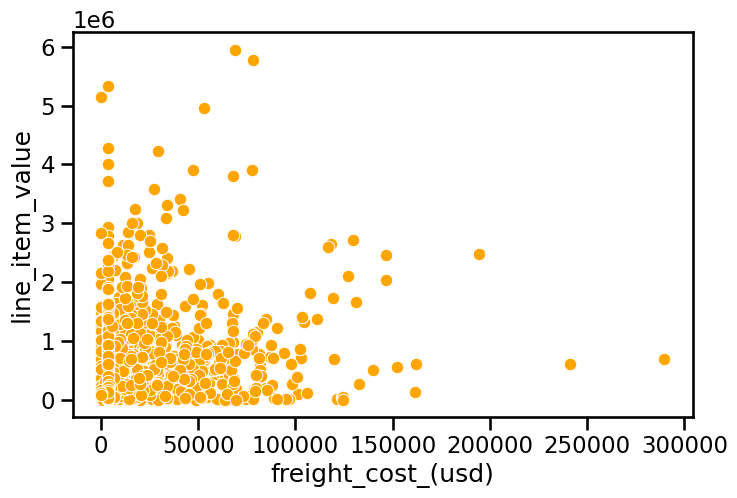

None


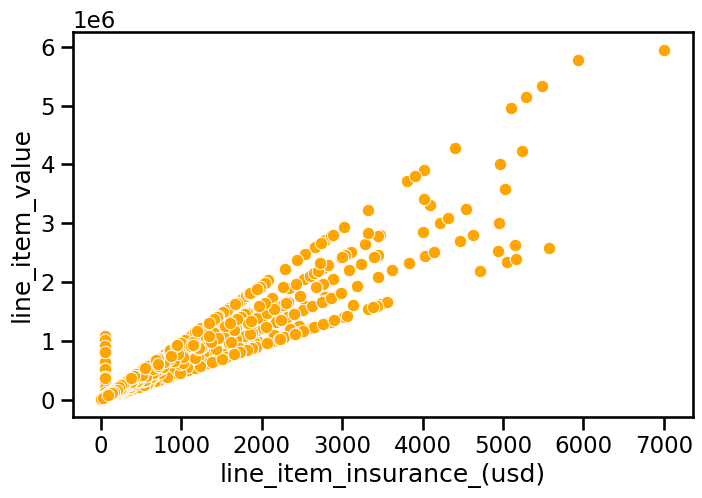

None


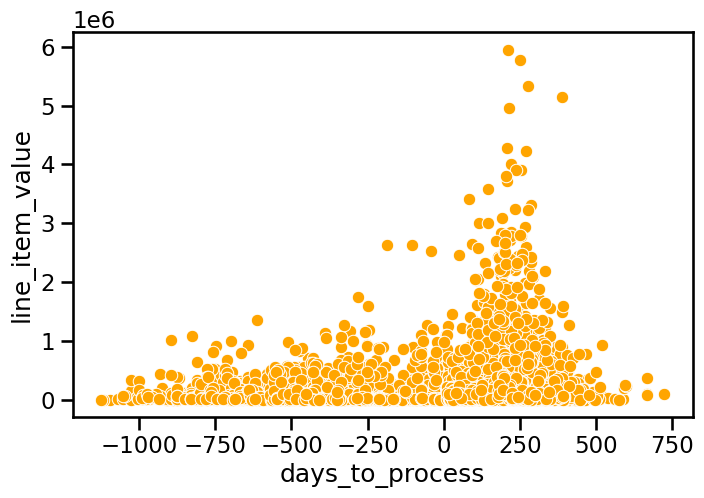

None


In [908]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(Scatterplots(column))

### Outlier Treatment

[]

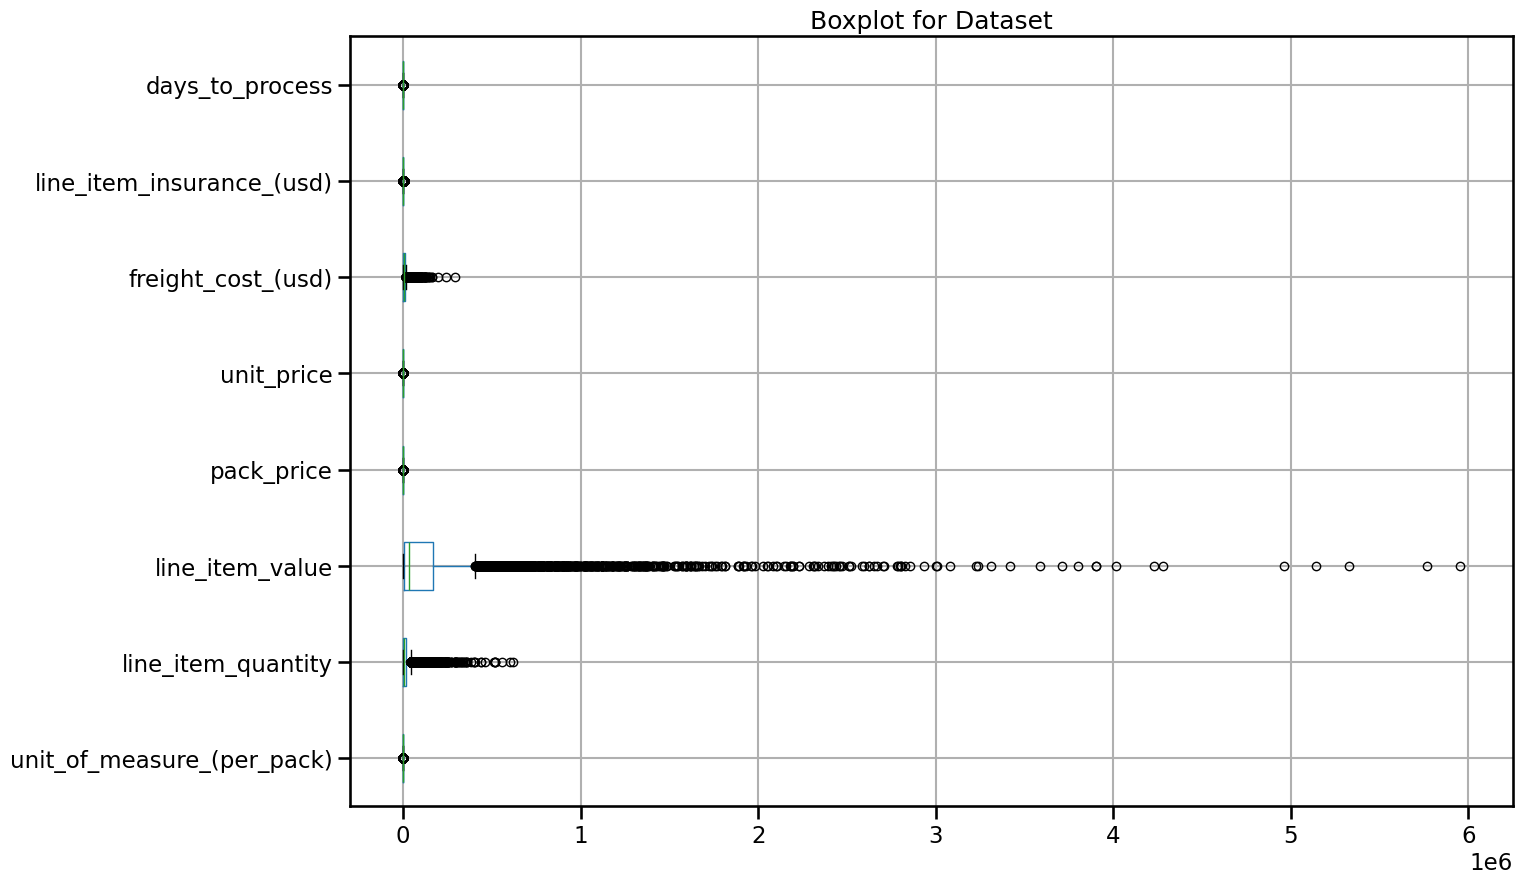

In [909]:
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.title("Boxplot for Dataset")
plt.plot()

In [910]:
num=df.select_dtypes(['int64','float64'])

#### Function for detecting outliers in a dataset.

* It does this by calculating the interquartile range (IQR) of the dataset, which is a measure of the dispersion of the data. The IQR is calculated by subtracting the first quartile (Q1) from the third quartile (Q3). The first and third quartiles are the 25th and 75th percentiles of the dataset, respectively.

* The function then calculates the lower and upper range of the dataset by adding and subtracting 1.5 times the IQR to the first and third quartiles, respectively. Any values that fall outside of this range are considered to be outliers.

* The function returns the lower and upper range, which can be used to identify and filter out outliers from the dataset.

In [911]:
def detect_outliers(num):
    Q1,Q3=np.percentile(num,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [912]:
for i in num:
    lr,ur=detect_outliers(df[i])
    print('\n')
    print(i)
    print('--------------')
    print('Lower Range',lr)
    print('Upper Range',ur)
    print('Proportion of outliers above upper range is',np.round(len(df[df[i]>ur])*100/len(df[i]),decimals=2))
    print('Proportion of outliers below lower range is',np.round(len(df[df[i]<lr])*100/len(df[i]),decimals=2))



unit_of_measure_(per_pack)
--------------
Lower Range -67.5
Upper Range 192.5
Proportion of outliers above upper range is 9.89
Proportion of outliers below lower range is 0.0


line_item_quantity
--------------
Lower Range -24500.0
Upper Range 41900.0
Proportion of outliers above upper range is 13.32
Proportion of outliers below lower range is 0.0


line_item_value
--------------
Lower Range -237467.26749999996
Upper Range 407202.3125
Proportion of outliers above upper range is 10.95
Proportion of outliers below lower range is 0.0


pack_price
--------------
Lower Range -25.625
Upper Range 53.775000000000006
Proportion of outliers above upper range is 11.36
Proportion of outliers below lower range is 0.0


unit_price
--------------
Lower Range -0.5275
Upper Range 1.0924999999999998
Proportion of outliers above upper range is 8.65
Proportion of outliers below lower range is 0.0


freight_cost_(usd)
--------------
Lower Range -8646.375
Upper Range 17641.265
Proportion of outliers above

In [913]:
num.columns

Index(['unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'days_to_process'],
      dtype='object')

In [914]:
for feature in df[['unit_of_measure_(per_pack)', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'days_to_process']]:
    lr,ur=detect_outliers(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

[]

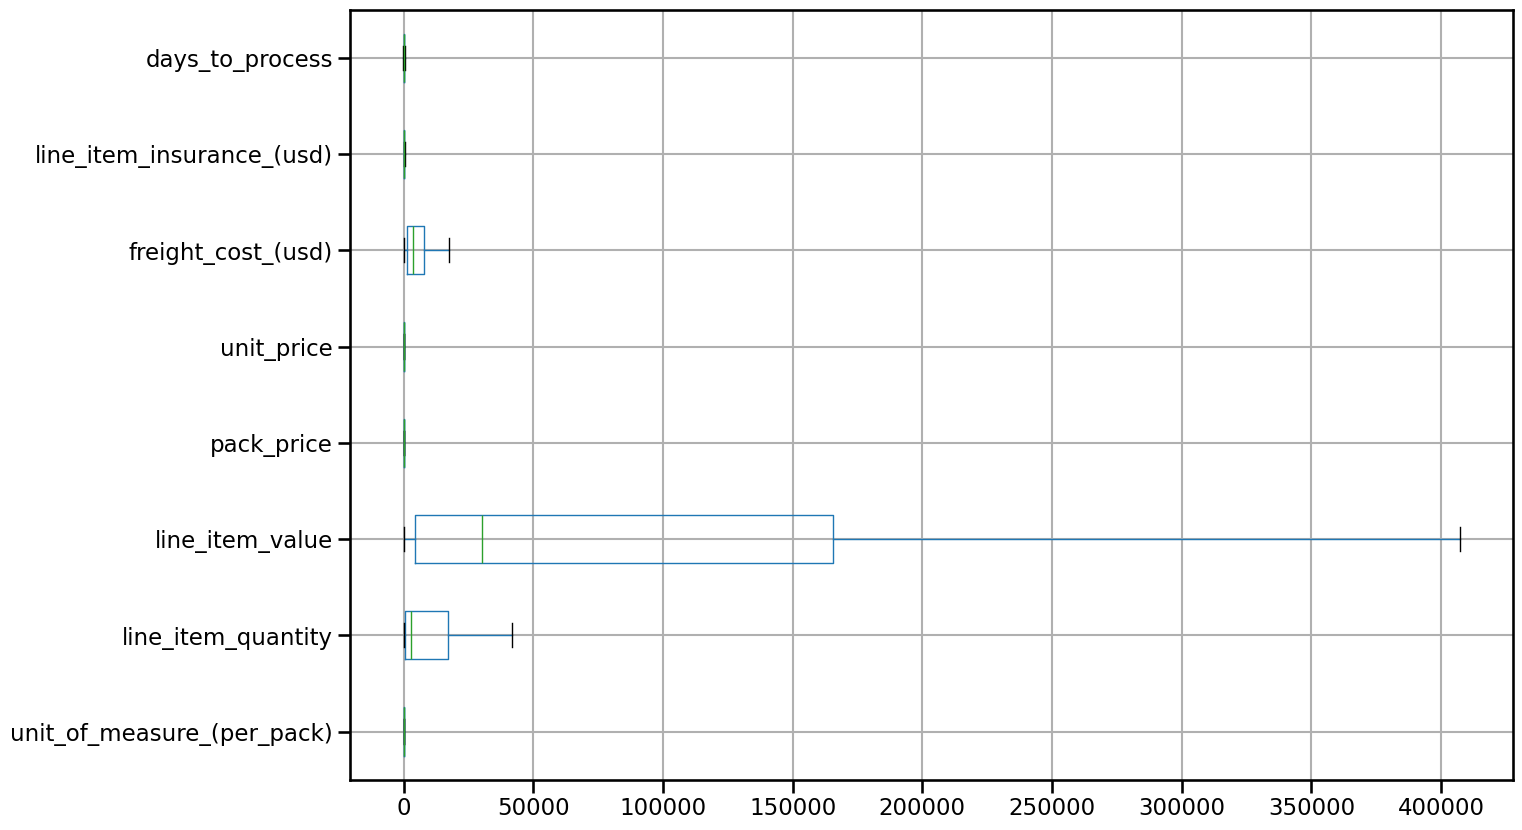

In [915]:
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.plot()

In [916]:
df.head(10)

po_/_so_# asn/dn_#        country  fulfill_via vendor_inco_term  \
0      SCMS      ASN  Côte d'Ivoire  Direct Drop              EXW   
1      SCMS      ASN        Vietnam  Direct Drop              EXW   
2      SCMS      ASN  Côte d'Ivoire  Direct Drop              FCA   
3      SCMS      ASN        Vietnam  Direct Drop              EXW   
4      SCMS      ASN        Vietnam  Direct Drop              EXW   
5      SCMS      ASN        Nigeria  Direct Drop              EXW   
6      SCMS      ASN         Zambia  Direct Drop              DDU   
7      SCMS      ASN       Tanzania  Direct Drop              EXW   
8      SCMS      ASN        Nigeria  Direct Drop              EXW   
9      SCMS      ASN         Zambia  Direct Drop              CIP   

  product_group sub_classification vendor    brand  \
0         other               HIV+  other    other   
1           ARV          Pediatric  other  Generic   
2         other               HIV+  other    other   
3           ARV              Adult  other  Generic   
4           ARV              Adult  other  Generic   
5           ARV          Pediatric  other  Generic   
6           ARV          Pediatric  other    other   
7           ARV              Adult  other  Generic   
8           ARV              Adult  other  Generic   
9           ARV              Adult  other    other   

   unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                        30.0                19.0           551.00   
1                       192.5              1000.0          6200.00   
2                       100.0               500.0         40000.00   
3                        60.0             31920.0        127360.80   
4                        60.0             38000.0        121600.00   
5                       192.5               416.0          2225.60   
6                        90.0               135.0          4374.00   
7                        60.0             16667.0         60834.55   
8                        60.0               273.0           532.35   
9                       120.0              2800.0        115080.00   

   pack_price  unit_price         manufacturing_site first_line_designation  \
0      29.000        0.97                      other                    Yes   
1       6.200        0.03  Aurobindo Unit III, India                    Yes   
2      53.775        0.80                      other                    Yes   
3       3.990        0.07                      other                    Yes   
4       3.200        0.05  Aurobindo Unit III, India                    Yes   
5       5.350        0.02  Aurobindo Unit III, India                    Yes   
6      32.400        0.36                      other                    Yes   
7       3.650        0.06  Aurobindo Unit III, India                    Yes   
8       1.950        0.03  Aurobindo Unit III, India                     No   
9      41.100        0.34                      other                    Yes   

   freight_cost_(usd) shipment_mode  line_item_insurance_(usd)  \
0             780.340           Air                      47.04   
1            4521.500           Air                      47.04   
2            1653.780           Air                      47.04   
3           16007.060           Air                      47.04   
4           17641.265           Air                      47.04   
5            5920.420           Air                      47.04   
6               0.000           Air                      47.04   
7            6212.410           Air                      47.04   
8            3526.690           Air                      47.04   
9               0.000           Air                      47.04   

   days_to_process  
0           -223.5  
1           -223.5  
2           -223.5  
3           -223.5  
4           -223.5  
5           -223.5  
6           -223.5  
7           -223.5  
8           -223.5  
9           -223.5

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

CT=ColumnTransformer(transformers=[('tnf1',OneHotEncoder(sparse=False,drop='first', dtype=np.int32),["po_/_so_#",
                                                                                                     "asn/dn_#",
                                                                                                     "fulfill_via",
                                                                                                     "vendor_inco_term",
                                                                                                     "sub_classification",
                                                                                                     'manufacturing_site',
                                                                                                     "first_line_designation",
                                                                                                     "shipment_mode",
                                                                                                     "brand",
                                                                                                     "vendor",
                                                                                                     "product_group"])],remainder='passthrough')

transformed_train = CT.fit_transform(X_train)
transformed_test = CT.transform(X_test)
column_CT=CT.get_feature_names()

X_train = pd.DataFrame(transformed_train,columns=column_CT)
X_train.head()
X_test = pd.DataFrame(transformed_test,columns=column_CT)
X_test.head()

### Feature engineering

In [917]:
df["vendor_inco_term"].unique()

array(['EXW', 'FCA', 'DDU', 'CIP', 'DDP', 'CIF', 'N/A - From RDC', 'DAP'],
      dtype=object)

In [918]:
df["vendor_inco_term"] = df["vendor_inco_term"].astype(str)
df = pd.get_dummies(df, columns=["vendor_inco_term"], drop_first=True)

In [919]:
df["sub_classification"] = df["sub_classification"].astype(str)
df = pd.get_dummies(df, columns=["sub_classification"], drop_first=True)

In [920]:
df["manufacturing_site"] = df["manufacturing_site"].astype(str)
df = pd.get_dummies(df, columns=["manufacturing_site"], drop_first=True)

df["shipment_mode"] = df["shipment_mode"].astype(str)
df = pd.get_dummies(df, columns=["shipment_mode"], drop_first=True)

In [921]:
df.head()

po_/_so_# asn/dn_#        country  fulfill_via product_group vendor  \
0      SCMS      ASN  Côte d'Ivoire  Direct Drop         other  other   
1      SCMS      ASN        Vietnam  Direct Drop           ARV  other   
2      SCMS      ASN  Côte d'Ivoire  Direct Drop         other  other   
3      SCMS      ASN        Vietnam  Direct Drop           ARV  other   
4      SCMS      ASN        Vietnam  Direct Drop           ARV  other   

     brand  unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0    other                        30.0                19.0            551.0   
1  Generic                       192.5              1000.0           6200.0   
2    other                       100.0               500.0          40000.0   
3  Generic                        60.0             31920.0         127360.8   
4  Generic                        60.0             38000.0         121600.0   

   pack_price  unit_price first_line_designation  freight_cost_(usd)  \
0      29.000        0.97                    Yes             780.340   
1       6.200        0.03                    Yes            4521.500   
2      53.775        0.80                    Yes            1653.780   
3       3.990        0.07                    Yes           16007.060   
4       3.200        0.05                    Yes           17641.265   

   line_item_insurance_(usd)  days_to_process  vendor_inco_term_CIP  \
0                      47.04           -223.5                 False   
1                      47.04           -223.5                 False   
2                      47.04           -223.5                 False   
3                      47.04           -223.5                 False   
4                      47.04           -223.5                 False   

   vendor_inco_term_DAP  vendor_inco_term_DDP  vendor_inco_term_DDU  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   vendor_inco_term_EXW  vendor_inco_term_FCA  \
0                  True                 False   
1                  True                 False   
2                 False                  True   
3                  True                 False   
4                  True                 False   

   vendor_inco_term_N/A - From RDC  sub_classification_HIV+  \
0                            False                     True   
1                            False                    False   
2                            False                     True   
3                            False                    False   
4                            False                    False   

   sub_classification_Pediatric  manufacturing_site_Cipla, Goa, India  \
0                         False                                 False   
1                          True                                 False   
2                         False                                 False   
3                         False                                 False   
4                         False                                 False   

   manufacturing_site_Hetero Unit III Hyderabad IN  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   manufacturing_site_Mylan (formerly Matrix) Nashik  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   manufacturing_site_Stri

In [922]:
#feature Engineering

df["po_/_so_#"].value_counts()
df["po_/_so_#"]=pd.get_dummies(df["po_/_so_#"],drop_first=True)

df["asn/dn_#"].value_counts()
df["asn/dn_#"]=pd.get_dummies(df["asn/dn_#"],drop_first=True)

# The map function is used to replace the values in the "country" column with their frequency
df["country"].value_counts()
frequency=df["country"].value_counts().to_dict()
df["country"]=df["country"].map(frequency)

df["fulfill_via"].value_counts()
df["fulfill_via"]=pd.get_dummies(df["fulfill_via"],drop_first=True)

df["vendor_inco_term_CIP"].value_counts()
df["vendor_inco_term_CIP"] = pd.get_dummies(df["vendor_inco_term_CIP"],drop_first=True)

df["vendor_inco_term_DAP"].value_counts()
df["vendor_inco_term_DAP"] = pd.get_dummies(df["vendor_inco_term_DAP"],drop_first=True)

df["vendor_inco_term_DDP"].value_counts()
df["vendor_inco_term_DDP"] = pd.get_dummies(df["vendor_inco_term_DDP"],drop_first=True)

df["vendor_inco_term_DDU"].value_counts()
df["vendor_inco_term_DDU"] = pd.get_dummies(df["vendor_inco_term_DDU"],drop_first=True)

df["vendor_inco_term_EXW"].value_counts()
df["vendor_inco_term_EXW"] = pd.get_dummies(df["vendor_inco_term_EXW"],drop_first=True)

df["vendor_inco_term_FCA"].value_counts()
df["vendor_inco_term_FCA"] = pd.get_dummies(df["vendor_inco_term_FCA"],drop_first=True)

df["vendor_inco_term_N/A - From RDC"].value_counts()
df["vendor_inco_term_N/A - From RDC"] = pd.get_dummies(df["vendor_inco_term_N/A - From RDC"],drop_first=True)


df["sub_classification_HIV+"].value_counts()
df["sub_classification_HIV+"]=pd.get_dummies(df["sub_classification_HIV+"],drop_first=True)

df["sub_classification_Pediatric"].value_counts()
df["sub_classification_Pediatric"]=pd.get_dummies(df["sub_classification_Pediatric"],drop_first=True)

df["manufacturing_site_Cipla, Goa, India"].value_counts()
df["manufacturing_site_Cipla, Goa, India"]=pd.get_dummies(df["manufacturing_site_Cipla, Goa, India"],drop_first=True)

df["manufacturing_site_Hetero Unit III Hyderabad IN"].value_counts()
df["manufacturing_site_Hetero Unit III Hyderabad IN"]=pd.get_dummies(df["manufacturing_site_Hetero Unit III Hyderabad IN"],drop_first=True)

df["manufacturing_site_Mylan (formerly Matrix) Nashik"].value_counts()
df["manufacturing_site_Mylan (formerly Matrix) Nashik"]=pd.get_dummies(df["manufacturing_site_Mylan (formerly Matrix) Nashik"],drop_first=True)

df["manufacturing_site_Strides, Bangalore, India."].value_counts()
df["manufacturing_site_Strides, Bangalore, India."]=pd.get_dummies(df["manufacturing_site_Strides, Bangalore, India."],drop_first=True)

df["manufacturing_site_other"].value_counts()
df["manufacturing_site_other"]=pd.get_dummies(df["manufacturing_site_other"],drop_first=True)
#df.drop(["manufacturing_site"],axis=1,inplace=True)

df["first_line_designation"].value_counts()
df["first_line_designation"]=pd.get_dummies(df["first_line_designation"],drop_first=True)

df["shipment_mode_Air Charter"].value_counts()
df["shipment_mode_Air Charter"]=pd.get_dummies(df["shipment_mode_Air Charter"],drop_first=True)

df["shipment_mode_Ocean"].value_counts()
df["shipment_mode_Ocean"]=pd.get_dummies(df["shipment_mode_Ocean"],drop_first=True)

df["shipment_mode_Truck"].value_counts()
df["shipment_mode_Truck"]=pd.get_dummies(df["shipment_mode_Truck"],drop_first=True)

df["brand"].value_counts()
df["brand"]=pd.get_dummies(df["brand"],drop_first=True)

df["vendor"].value_counts()
df["vendor"]=pd.get_dummies(df["vendor"],drop_first=True)

df["product_group"].value_counts()
df["product_group"]=pd.get_dummies(df["product_group"],drop_first=True)

In [923]:
# Check the data types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10119 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   po_/_so_#                                          10119 non-null  bool   
 1   asn/dn_#                                           10119 non-null  bool   
 2   country                                            10119 non-null  int64  
 3   fulfill_via                                        10119 non-null  bool   
 4   product_group                                      10119 non-null  bool   
 5   vendor                                             10119 non-null  bool   
 6   brand                                              10119 non-null  bool   
 7   unit_of_measure_(per_pack)                         10119 non-null  float64
 8   line_item_quantity                                 10119 non-null  float64
 9   line_item_v

### Looking for Correlations of the new transformed data

<Axes: >

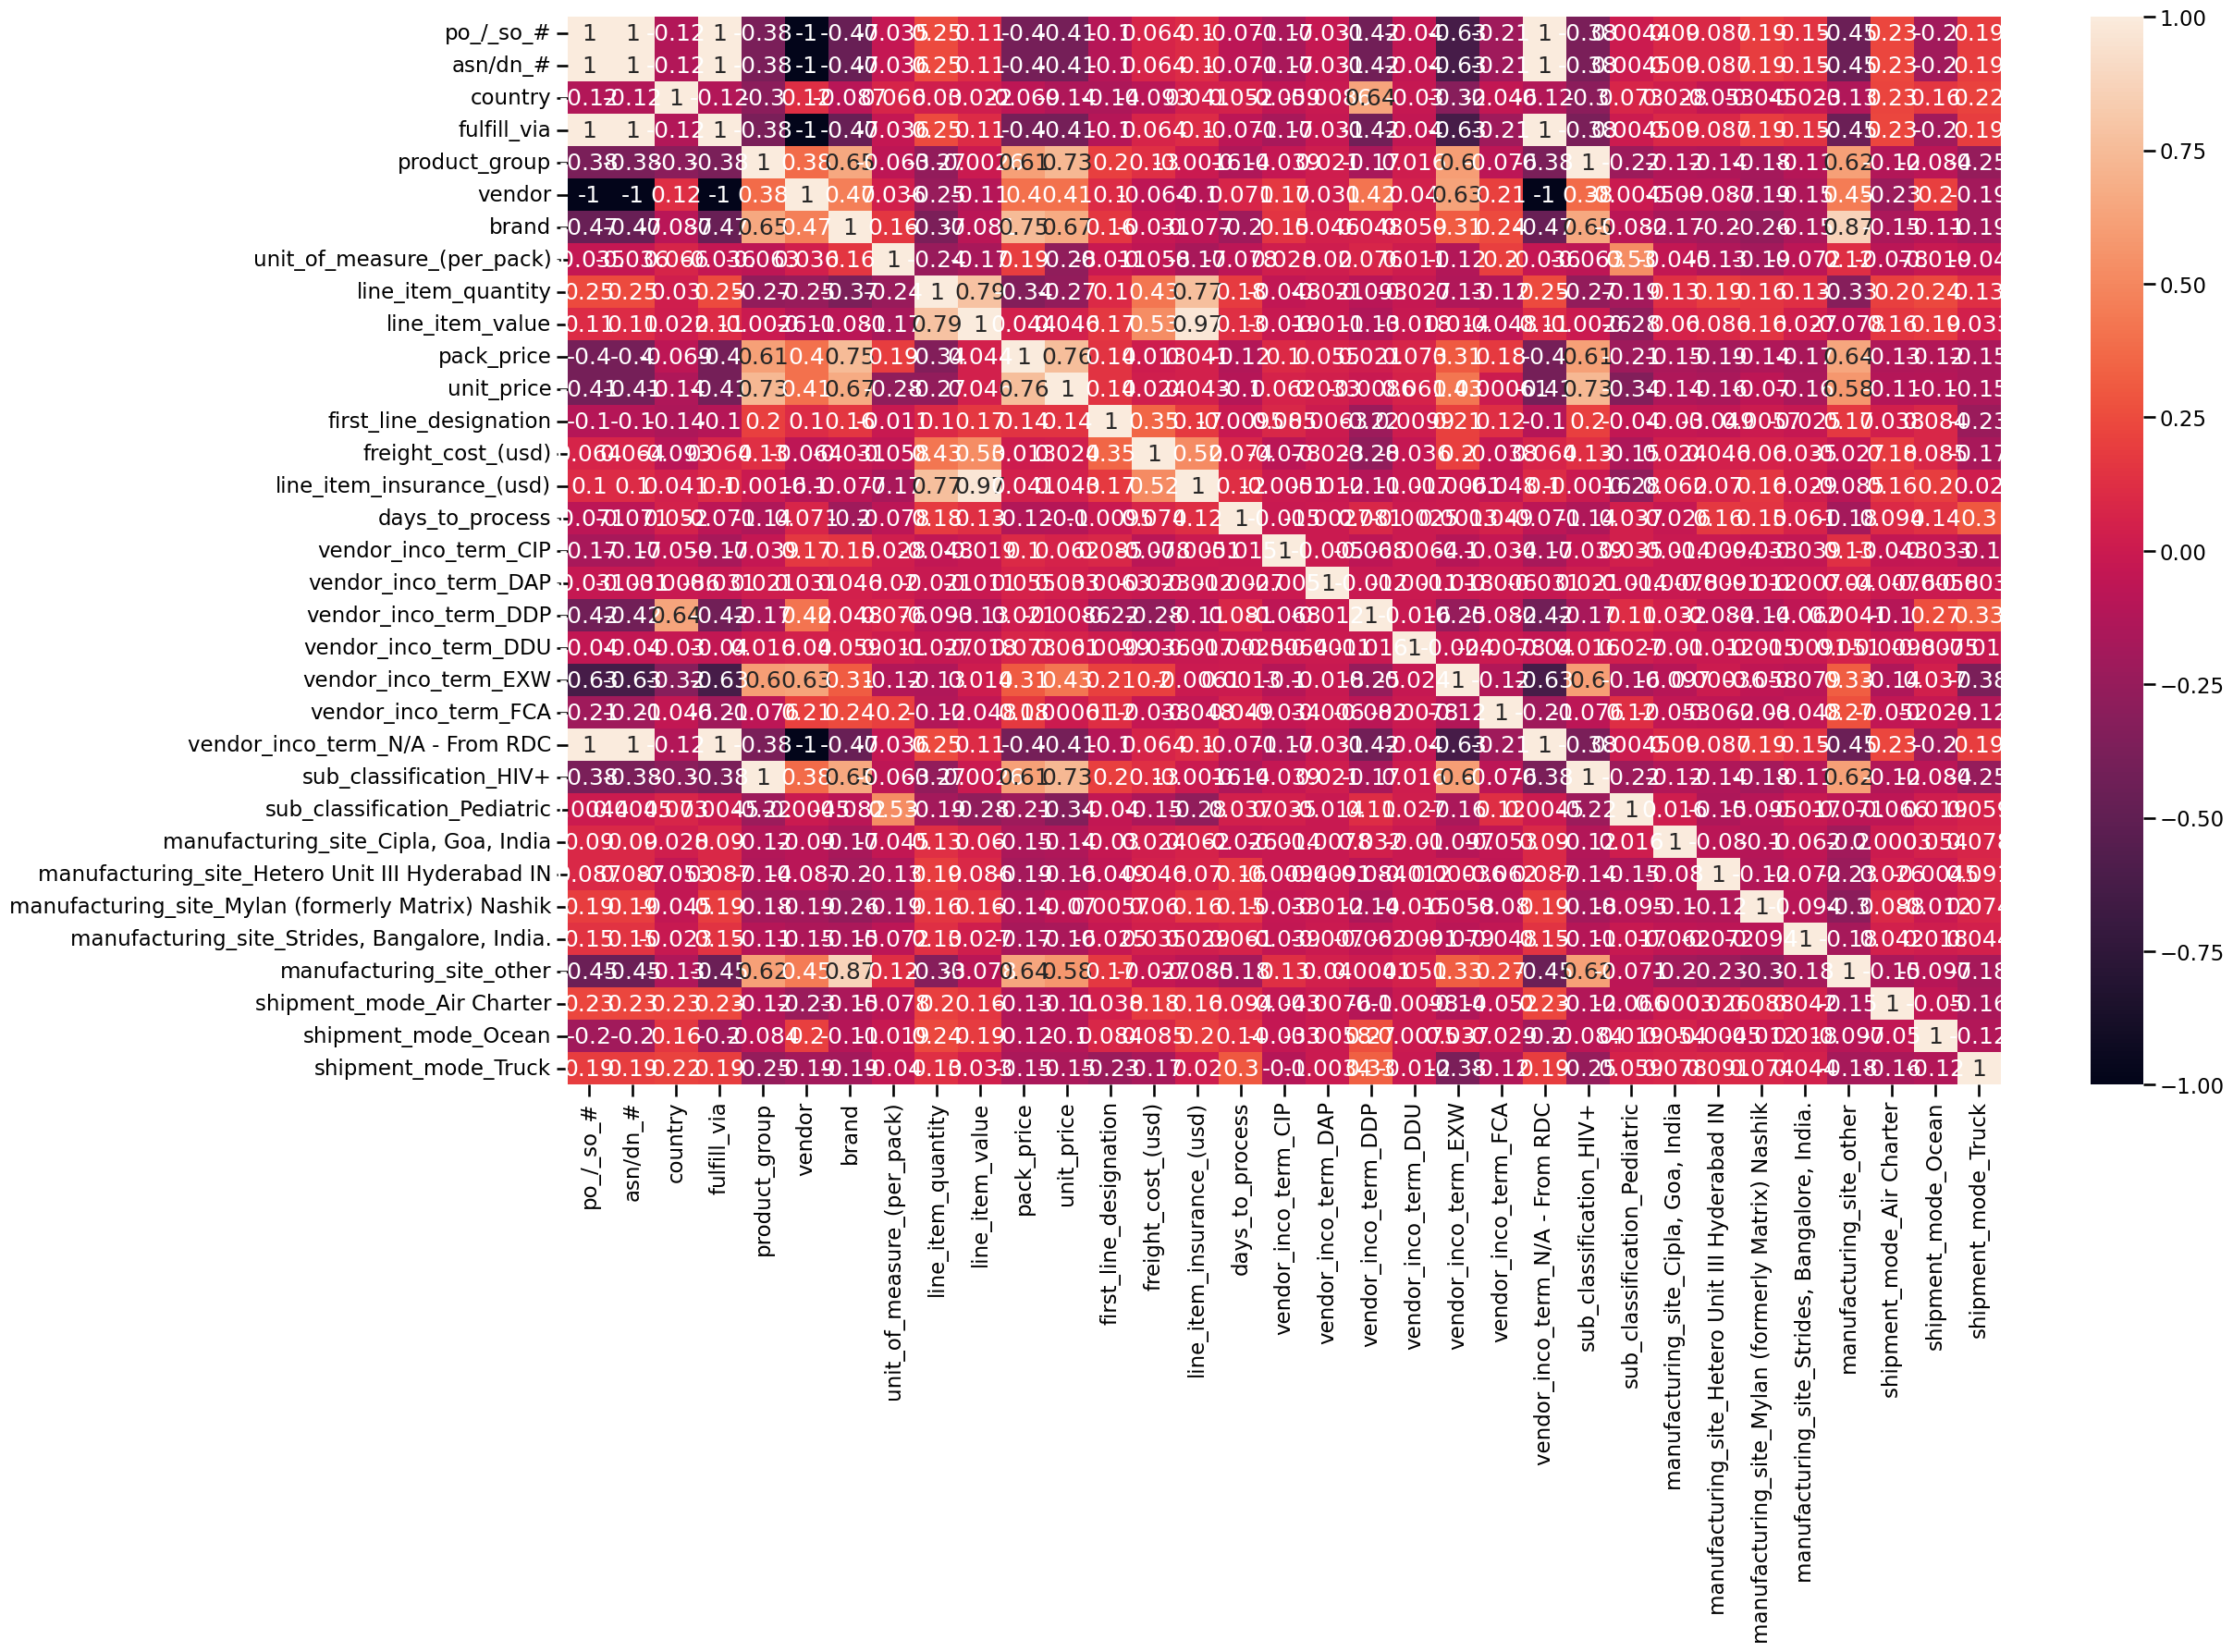

In [924]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

In [925]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [926]:
df2=df.copy()
df2.head()

po_/_so_#  asn/dn_#  country  fulfill_via  product_group  vendor  brand  \
0      False     False     1046        False           True    True   True   
1      False     False      688        False          False    True  False   
2      False     False     1046        False           True    True   True   
3      False     False      688        False          False    True  False   
4      False     False      688        False          False    True  False   

   unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                        30.0                19.0            551.0   
1                       192.5              1000.0           6200.0   
2                       100.0               500.0          40000.0   
3                        60.0             31920.0         127360.8   
4                        60.0             38000.0         121600.0   

   pack_price  unit_price  first_line_designation  freight_cost_(usd)  \
0      29.000        0.97                    True             780.340   
1       6.200        0.03                    True            4521.500   
2      53.775        0.80                    True            1653.780   
3       3.990        0.07                    True           16007.060   
4       3.200        0.05                    True           17641.265   

   line_item_insurance_(usd)  days_to_process  vendor_inco_term_CIP  \
0                      47.04           -223.5                 False   
1                      47.04           -223.5                 False   
2                      47.04           -223.5                 False   
3                      47.04           -223.5                 False   
4                      47.04           -223.5                 False   

   vendor_inco_term_DAP  vendor_inco_term_DDP  vendor_inco_term_DDU  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   vendor_inco_term_EXW  vendor_inco_term_FCA  \
0                  True                 False   
1                  True                 False   
2                 False                  True   
3                  True                 False   
4                  True                 False   

   vendor_inco_term_N/A - From RDC  sub_classification_HIV+  \
0                            False                     True   
1                            False                    False   
2                            False                     True   
3                            False                    False   
4                            False                    False   

   sub_classification_Pediatric  manufacturing_site_Cipla, Goa, India  \
0                         False                                 False   
1                          True                                 False   
2                         False                                 False   
3                         False                                 False   
4                         False                                 False   

   manufacturing_site_Hetero Unit III Hyderabad IN  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   manufacturing_site_Mylan (formerly Matrix) Nashik  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   manufacturing_site_Strides, Bangalore, Ind

In [927]:
df.columns

Index(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'product_group',
       'vendor', 'brand', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'first_line_designation',
       'freight_cost_(usd)', 'line_item_insurance_(usd)', 'days_to_process',
       'vendor_inco_term_CIP', 'vendor_inco_term_DAP', 'vendor_inco_term_DDP',
       'vendor_inco_term_DDU', 'vendor_inco_term_EXW', 'vendor_inco_term_FCA',
       'vendor_inco_term_N/A - From RDC', 'sub_classification_HIV+',
       'sub_classification_Pediatric', 'manufacturing_site_Cipla, Goa, India',
       'manufacturing_site_Hetero Unit III Hyderabad IN',
       'manufacturing_site_Mylan (formerly Matrix) Nashik',
       'manufacturing_site_Strides, Bangalore, India.',
       'manufacturing_site_other', 'shipment_mode_Air Charter',
       'shipment_mode_Ocean', 'shipment_mode_Truck'],
      dtype='object')

## Linear Regression Using Stats Model

### Separating dependent and Independent Variable

In [928]:
X=df.drop(["line_item_value"],axis=1)
y=df["line_item_value"]

### Performing Train-Test Split of the Data in 70:30 Ratio

In [929]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.20)

In [930]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (8095, 32)
Number of rows and columns of the training set for the dependent variable: (8095,)
Number of rows and columns of the test set for the independent variables: (2024, 32)
Number of rows and columns of the test set for the dependent variable: (2024,)


### Scaling the features with Min-Max Scalar

In [931]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(X_train)
scaled_test=scaler.transform(X_test)

### Scaled Dataset-TRAIN

In [932]:
data_train_scaled=pd.DataFrame(scaled_train,columns=X_train.columns)
data_train_scaled.head()

po_/_so_#  asn/dn_#   country  fulfill_via  product_group  vendor  brand  \
0        1.0       1.0  0.461922          1.0            0.0     0.0    0.0   
1        0.0       0.0  1.000000          0.0            0.0     1.0    1.0   
2        0.0       0.0  1.000000          0.0            0.0     1.0    0.0   
3        0.0       0.0  1.000000          0.0            0.0     1.0    0.0   
4        1.0       1.0  0.432028          1.0            0.0     0.0    0.0   

   unit_of_measure_(per_pack)  line_item_quantity  pack_price  unit_price  \
0                    1.000000            0.042937    0.039052    0.009153   
1                    0.433420            0.000692    0.204556    0.118993   
2                    0.308094            1.000000    0.045188    0.036613   
3                    0.464752            0.596649    0.151929    0.082380   
4                    0.308094            0.068474    0.045560    0.036613   

   first_line_designation  freight_cost_(usd)  line_item_insurance_(usd)  \
0                     1.0            0.289705                   0.012614   
1                     0.0            0.000000                   0.001209   
2                     1.0            1.000000                   1.000000   
3                     1.0            0.294352                   0.573695   
4                     1.0            0.244502                   0.019747   

   days_to_process  vendor_inco_term_CIP  vendor_inco_term_DAP  \
0         0.036677                   0.0                   0.0   
1         0.413922                   0.0                   0.0   
2         0.604042                   0.0                   0.0   
3         0.616018                   0.0                   0.0   
4         0.659431                   0.0                   0.0   

   vendor_inco_term_DDP  vendor_inco_term_DDU  vendor_inco_term_EXW  \
0                   0.0                   0.0                   0.0   
1                   1.0                   0.0                   0.0   
2                   1.0                   0.0                   0.0   
3                   1.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   vendor_inco_term_FCA  vendor_inco_term_N/A - From RDC  \
0                   0.0                              1.0   
1                   0.0                              0.0   
2                   0.0                              0.0   
3                   0.0                              0.0   
4                   0.0                              1.0   

   sub_classification_HIV+  sub_classification_Pediatric  \
0                      0.0                           1.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           1.0   
4                      0.0                           0.0   

   manufacturing_site_Cipla, Goa, India  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   manufacturing_site_Hetero Unit III Hyderabad IN  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   manufacturing_site_Mylan (formerly Matrix) Nashik  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   manufacturing_site_Strides, Bangalore, India.  manufacturing_site_other  \
0                                            0.0               

### Scaled Dataset-TEST

In [933]:
data_test_scaled=pd.DataFrame(scaled_test,columns=X_test.columns)
data_test_scaled.head()

po_/_so_#  asn/dn_#   country  fulfill_via  product_group  vendor  brand  \
0        1.0       1.0  0.535943          1.0            0.0     0.0    0.0   
1        0.0       0.0  0.488968          0.0            0.0     1.0    0.0   
2        1.0       1.0  0.380071          1.0            0.0     0.0    0.0   
3        1.0       1.0  0.461922          1.0            0.0     0.0    0.0   
4        1.0       1.0  0.535943          1.0            0.0     0.0    0.0   

   unit_of_measure_(per_pack)  line_item_quantity  pack_price  unit_price  \
0                    0.308094            0.004750    0.108787    0.091533   
1                    0.151436            0.288384    0.130172    0.210526   
2                    0.308094            1.000000    0.042027    0.036613   
3                    0.151436            1.000000    0.279684    0.457666   
4                    0.151436            1.000000    0.061925    0.100686   

   first_line_designation  freight_cost_(usd)  line_item_insurance_(usd)  \
0                     1.0            0.056688                   0.004290   
1                     0.0            0.199911                   0.310450   
2                     0.0            0.199911                   0.204652   
3                     1.0            0.788751                   1.000000   
4                     1.0            0.395481                   0.468867   

   days_to_process  vendor_inco_term_CIP  vendor_inco_term_DAP  \
0         0.482784                   0.0                   0.0   
1         0.487275                   0.0                   0.0   
2         0.668413                   0.0                   0.0   
3         0.665419                   0.0                   0.0   
4         0.677395                   0.0                   0.0   

   vendor_inco_term_DDP  vendor_inco_term_DDU  vendor_inco_term_EXW  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   1.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   vendor_inco_term_FCA  vendor_inco_term_N/A - From RDC  \
0                   0.0                              1.0   
1                   0.0                              0.0   
2                   0.0                              1.0   
3                   0.0                              1.0   
4                   0.0                              1.0   

   sub_classification_HIV+  sub_classification_Pediatric  \
0                      0.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   

   manufacturing_site_Cipla, Goa, India  \
0                                   1.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   manufacturing_site_Hetero Unit III Hyderabad IN  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   manufacturing_site_Mylan (formerly Matrix) Nashik  \
0                                                0.0   
1                                                1.0   
2                                                0.0   
3                                                1.0   
4                                                0.0   

   manufacturing_site_Strides, Bangalore, India.  manufacturing_site_other  \
0                                            0.0               

### Getting the shape of variable (ind-dep train & ind-dep test)

In [934]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (8095, 32)
Number of rows and columns of the training set for the dependent variable: (8095,)
Number of rows and columns of the test set for the independent variables: (2024, 32)
Number of rows and columns of the test set for the dependent variable: (2024,)


In [935]:
import statsmodels.api as smf

In [936]:
# This adds the constant term beta0 to the Simple Linear Regression.
x_train_lr=smf.add_constant(X_train)
x_train_lr.head()

const  po_/_so_#  asn/dn_#  country  fulfill_via  product_group  vendor  \
2402    1.0       True      True      650         True          False   False   
4108    1.0      False     False     1406        False          False    True   
6424    1.0      False     False     1406        False          False    True   
4489    1.0      False     False     1406        False          False    True   
6743    1.0       True      True      608         True          False   False   

      brand  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
2402  False                       192.5              1800.0        2.10   
4108   True                        84.0                30.0       11.00   
6424  False                        60.0             41900.0        2.43   
4489  False                        90.0             25000.0        8.17   
6743  False                        60.0              2870.0        2.45   

      unit_price  first_line_designation  freight_cost_(usd)  \
2402        0.01                    True            5110.760   
4108        0.13                   False               0.000   
6424        0.04                    True           17641.265   
4489        0.09                    True            5192.740   
6743        0.04                    True            4313.330   

      line_item_insurance_(usd)  days_to_process  vendor_inco_term_CIP  \
2402                     7.4100           -199.0                 False   
4108                     0.7100             53.0                 False   
6424                   587.4375            180.0                 False   
4489                   337.0100            188.0                 False   
6743                    11.6000            217.0                 False   

      vendor_inco_term_DAP  vendor_inco_term_DDP  vendor_inco_term_DDU  \
2402                 False                 False                 False   
4108                 False                  True                 False   
6424                 False                  True                 False   
4489                 False                  True                 False   
6743                 False                 False                 False   

      vendor_inco_term_EXW  vendor_inco_term_FCA  \
2402                 False                 False   
4108                 False                 False   
6424                 False                 False   
4489                 False                 False   
6743                 False                 False   

      vendor_inco_term_N/A - From RDC  sub_classification_HIV+  \
2402                             True                    False   
4108                            False                    False   
6424                            False                    False   
4489                            False                    False   
6743                             True                    False   

      sub_classification_Pediatric  manufacturing_site_Cipla, Goa, India  \
2402                          True                                 False   
4108                         False                                 False   
6424                         False                                 False   
4489                          True                                 False   
6743                         False                                 False   

      manufacturing_site_Hetero Unit III Hyderabad IN  \
2402                                            False   
4108                                            False   
6424                                            False   
4489                                            False   
6743                                            False   

      manufacturing_site_Mylan (formerly Matrix) Nashik  \
2402                                              False   
4108                                              False   
6424                                              False   
4489                                           

In [937]:
x_train_lr.shape

(8095, 33)

In [938]:
y_train.shape

(8095,)

* convert y shape

y_train=y_train.values.reshape(-1,1)
y_train.shape

In [939]:
import numpy as np

infinite_values = np.isinf(x_train_lr)
infinite_values.sum()

const                                                0
po_/_so_#                                            0
asn/dn_#                                             0
country                                              0
fulfill_via                                          0
product_group                                        0
vendor                                               0
brand                                                0
unit_of_measure_(per_pack)                           0
line_item_quantity                                   0
pack_price                                           0
unit_price                                           0
first_line_designation                               0
freight_cost_(usd)                                   0
line_item_insurance_(usd)                            0
days_to_process                                      0
vendor_inco_term_CIP                                 0
vendor_inco_term_DAP                                 0
vendor_inc

In [940]:
missing_values = np.sum(np.isnan(x_train_lr))
print(f"Number of missing values: {missing_values}")

Number of missing values: const                                                0
po_/_so_#                                            0
asn/dn_#                                             0
country                                              0
fulfill_via                                          0
product_group                                        0
vendor                                               0
brand                                                0
unit_of_measure_(per_pack)                           0
line_item_quantity                                   0
pack_price                                           0
unit_price                                           0
first_line_designation                               0
freight_cost_(usd)                                   0
line_item_insurance_(usd)                            0
days_to_process                                      0
vendor_inco_term_CIP                                 0
vendor_inco_term_DAP                   

In [941]:
infinite_values = np.sum(np.isinf(x_train_lr))
print(f"Number of infinite values: {infinite_values}")

Number of infinite values: const                                                0
po_/_so_#                                            0
asn/dn_#                                             0
country                                              0
fulfill_via                                          0
product_group                                        0
vendor                                               0
brand                                                0
unit_of_measure_(per_pack)                           0
line_item_quantity                                   0
pack_price                                           0
unit_price                                           0
first_line_designation                               0
freight_cost_(usd)                                   0
line_item_insurance_(usd)                            0
days_to_process                                      0
vendor_inco_term_CIP                                 0
vendor_inco_term_DAP                  

In [942]:
y_train = y_train.astype(float)
x_train_lr = x_train_lr.astype(float)

In [943]:
lr_sm = smf.OLS(y_train, x_train_lr).fit()

In [944]:
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        line_item_value   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     5975.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:50:49   Log-Likelihood:                -94902.
No. Observations:                8095   AIC:                         1.899e+05
Df Residuals:                    8066   BIC:                         1.901e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                             -4607.0561   1.36e+04     -0.339      0.734   -3.12e+04     2.2e+04
po_/_so_#                                         -8956.1840      3e+04     -0.298      0.766   -6.78e+04    4.99e+04
asn/dn_#                                           -533.9311   9591.627     -0.056      0.956   -1.93e+04    1.83e+04
country                                               0.8819      1.234      0.715      0.475      -1.536       3.300
fulfill_via                                        -533.9311   9591.627     -0.056      0.956   -1.93e+04    1.83e+04
product_group                                     -5576.7351    875.055     -6.373      0.000   -7292.069   -3861.401
vendor                                            -4073.1251   1.77e+04     -0.230      0.818   -3.88e+04    3.06e+04
brand                                             -8476.4316   1867.833     -4.538      0.000   -1.21e+04   -4814.997
unit_of_measure_(per_pack)                           24.0272     11.966      2.008      0.045       0.571      47.484
line_item_quantity                                    1.1908      0.046     25.904      0.000       1.101       1.281
pack_price                                          422.4060     48.023      8.796      0.000     328.268     516.544
unit_price                                         1.084e+04   2533.847      4.279      0.000    5875.858    1.58e+04
first_line_designation                            -4499.9238    806.524     -5.579      0.000   -6080.919   -2918.929
freight_cost_(usd)                                    0.7398      0.075      9.813      0.000       0.592       0.888
line_item_insurance_(usd)                           588.9893      3.222    182.799      0.000     582.673     595.305
days_to_process                                      -1.9921      2.263     -0.880      0.379      -6.428       2.444
vendor_inco_term_CIP                              -1.392e+04   3.01e+04     -0.463      0.643   -7.29e+04     4.5e+04
vendor_inco_term_DAP                              -7915.7811   3.18e+04     -0.249      0.804   -7.03e+04    5.45e+04
vendor_inco_term_DDP                              -1.762e+04      3e+04     -0.587      0.557   -7.65e+04    4.12e+04
vendor_inco_term_DDU                              -2.332e+04   3.13e+04     -0.744      0.457   -8.48e+04    3.81e+04
vendor_inco_term_EXW                                917.2528      3e+04      0.031      0.976   -5.79e+04    5.97e+04
vendor_inco_term_FCA                              -7176.1414   3.01e+04     -0.239      0.811   -6.61e+04    5.18e+04
vendor_inco_term_N/A - From RDC                    -533.9311   9591.627     -0.056      0.956   -1.93e+04    1.83e+04
sub_classificat

In [945]:
X_train = X_train.astype(float)

In [946]:
#Backward elimination technique in linear regression
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = smf.add_constant(X_1)
    lr = smf.OLS(y_train,X_1).fit()
    p = pd.Series(lr.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['po_/_so_#', 'product_group', 'brand', 'unit_of_measure_(per_pack)', 'line_item_quantity', 'pack_price', 'unit_price', 'first_line_designation', 'freight_cost_(usd)', 'line_item_insurance_(usd)', 'vendor_inco_term_CIP', 'vendor_inco_term_DDP', 'vendor_inco_term_DDU', 'vendor_inco_term_FCA', 'sub_classification_HIV+', 'manufacturing_site_Hetero Unit III Hyderabad IN', 'manufacturing_site_other', 'shipment_mode_Air Charter', 'shipment_mode_Truck']


* The higher the t-value for the feature, the more significant the feature is to the output variable.
* The p-value plays a rule in rejecting the Null hypothesis(Null hypothesis stating the features has zero
significance on the target variable.).
* If the p-value is less than 0.05(95% confidence interval) for a
feature, then we can consider the feature to be significant.

In [947]:
x_train_be=X_train[selected_features_BE]
x_test_be=X_test[selected_features_BE]

### Building Multiple Linear Regression model with selected features

In [948]:
lr=LinearRegression()
lr.fit(x_train_be,y_train)

LinearRegression()

In [949]:
lr.score(x_train_be,y_train)

0.9539489136809791

In [950]:
y_pred_train=lr.predict(x_train_be)
y_pred_test=lr.predict(x_test_be)

In [951]:
def adjusted_r2(data,true,pred):
    r2=r2_score(true,pred)
    n=data.shape[0]
    p=data.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p*1)
    return adj_r2

def accuracy_metrics(test,pred,type_):
    r2=r2_score(test,pred)
    rmse=np.sqrt(mean_squared_error(test,pred))
    if r2:
        print("The r2 score for {} is {}%".format(type_,(r2*100)))
        print("RMSE score for {} is {}".format(type_,(rmse)))
#       print("adjusted r2 score is {}%".format(adj_r2*100))
    return None

In [952]:
#for test accuracy
(accuracy_metrics(y_test,y_pred_test,"test"))

The r2 score for test is 95.19795897490071%
RMSE score for test is 29662.605751054194


* 95% of the variation in the line_item_value is explained by the predictors in the model for train set

In [953]:
y_pred_train=lr.predict(x_train_be)
y_pred_test=lr.predict(x_test_be)

### Performance Metrics Train

In [954]:
# R square on training data
lr.score(x_train_be, y_train)

0.9539489136809791

In [955]:
#for train accuracy
accuracy_metrics(y_train,y_pred_train,"train")

The r2 score for train is 95.39489136809792%
RMSE score for train is 29885.379114003277


### Performance Metrics Test

In [956]:
#for test accuracy
accuracy_metrics(y_test,y_pred_test,"test")

The r2 score for test is 95.19795897490071%
RMSE score for test is 29662.605751054194


In [957]:
# R square on testing data
lr.score(x_test_be, y_test)

0.9519795897490071

In [958]:
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [959]:
results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])
results.loc[len(results)] = ['Linear Regression',r2_score(y_train,y_pred_train),
                             adjusted_r2(X_train,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2(X_test,y_test,y_pred_test),rmse(y_test,y_pred_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  Train_RMSE score  \
0  Linear Regression        0.953949            0.953772      29885.379114   

   Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0        0.95198           0.951232     29662.605751

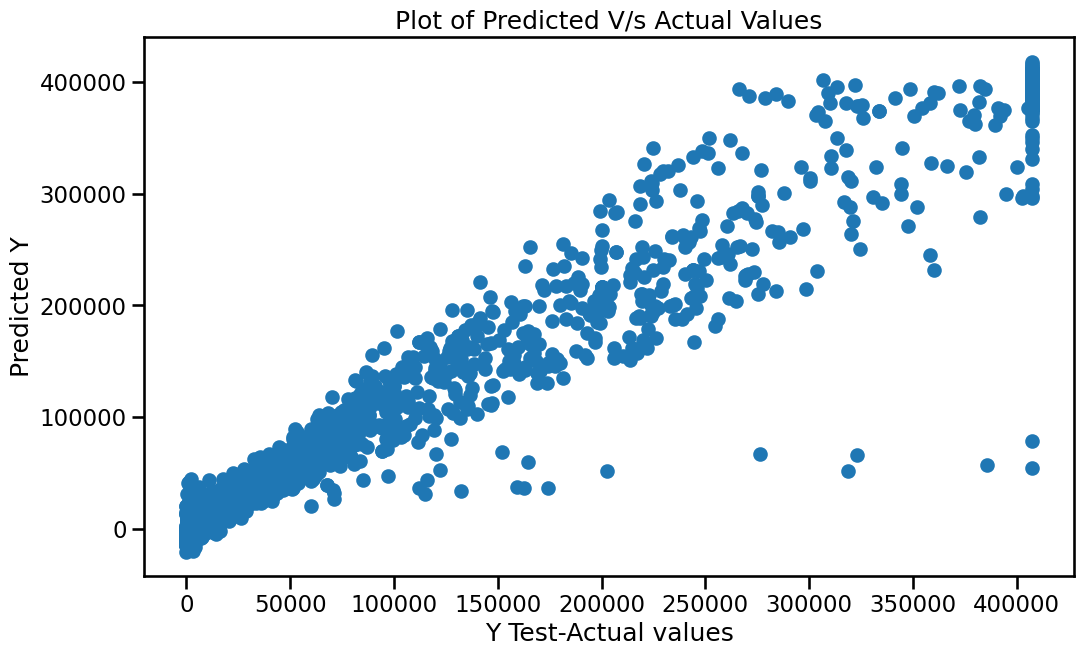

In [960]:
plt.figure(figsize=(12,7))
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test-Actual values')
plt.ylabel('Predicted Y')
plt.title('Plot of Predicted V/s Actual Values')
plt.show()

### Create a regularized LASSO model and note the coefficients

In [961]:
lasso=LassoCV()
lasso.fit(X_train,y_train)
print("Best alpha built using lasso regressor is %f"%lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X_train,y_train))

Best alpha built using lasso regressor is 1638410.915218
Best score using built-in LassoCV: 0.941217


In [962]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
round(coef,2)

po_/_so_#                                             -0.00
asn/dn_#                                              -0.00
country                                               -0.00
fulfill_via                                           -0.00
product_group                                          0.00
vendor                                                 0.00
brand                                                  0.00
unit_of_measure_(per_pack)                             0.00
line_item_quantity                                     1.76
pack_price                                             0.00
unit_price                                             0.00
first_line_designation                                -0.00
freight_cost_(usd)                                     1.59
line_item_insurance_(usd)                            505.41
days_to_process                                       -0.00
vendor_inco_term_CIP                                   0.00
vendor_inco_term_DAP                    

### Feature importance by Lasso

In [963]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 29 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

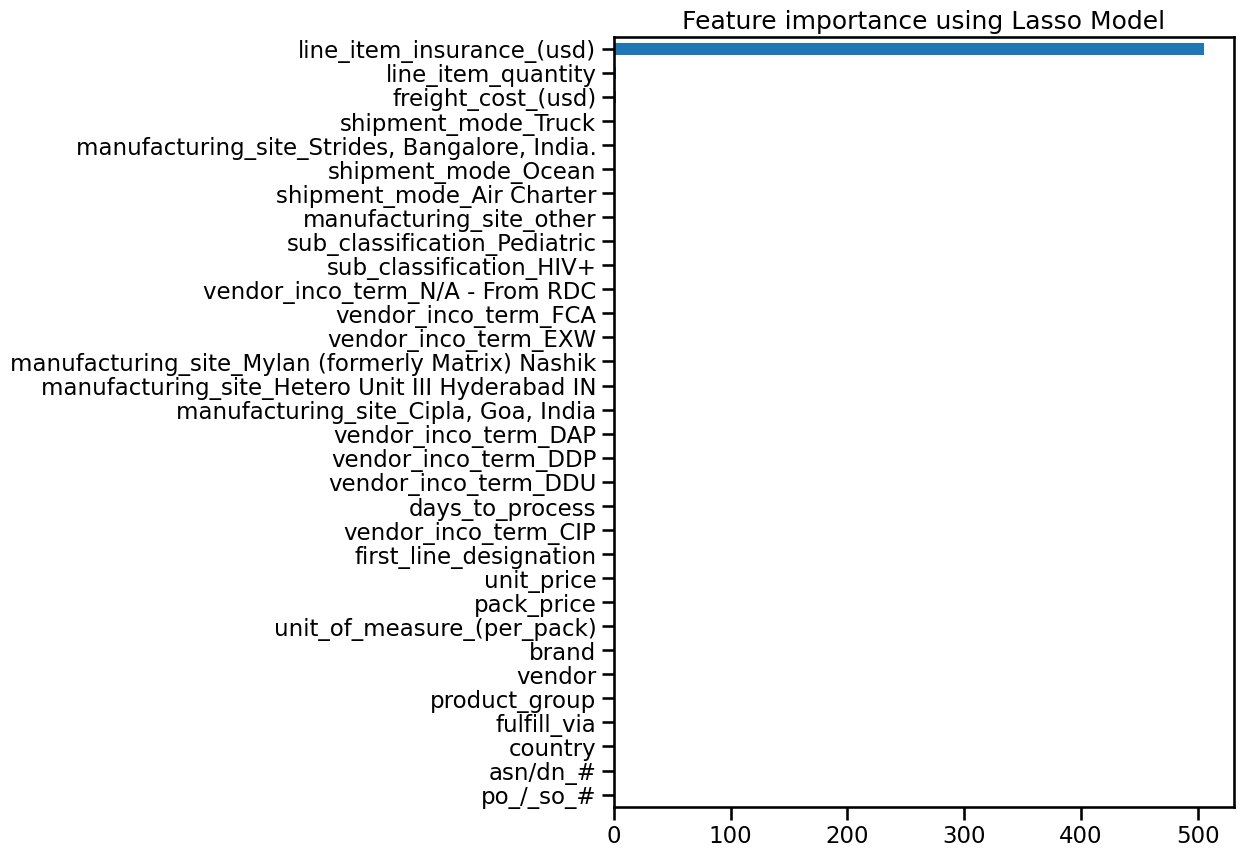

In [964]:
#Visualization

imp_coef_lasso = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef_lasso.plot(kind="barh")

plt.title("Feature importance using Lasso Model")

In [965]:
features_by_lasso = imp_coef_lasso

In [966]:
y_pred_lasso_train=lasso.predict(X_train)
y_pred_lasso_test=lasso.predict(X_test)

In [967]:
#for train accuracy
accuracy_metrics(y_train,y_pred_lasso_train,"train")

The r2 score for train is 94.12169634932984%
RMSE score for train is 33764.851028263794


In [968]:
#for test accuracy
accuracy_metrics(y_test,y_pred_lasso_test,"test")

The r2 score for test is 94.01891798785628%
RMSE score for test is 33104.43996787613


In [969]:
results.loc[len(results)] = ['Lasso Regression',r2_score(y_train,y_pred_lasso_train),
                             adjusted_r2(X_train,y_train,y_pred_lasso_train),
                             rmse(y_train,y_pred_lasso_train),r2_score(y_test,y_pred_lasso_test),
                             adjusted_r2(X_test,y_test,y_pred_lasso_test),rmse(y_test,y_pred_lasso_test)]
results

Algorithm  Train_R2 score  Train_Adj_R2 score  Train_RMSE score  \
0  Linear Regression        0.953949            0.953772      29885.379114   
1   Lasso Regression        0.941217            0.940991      33764.851028   

   Test_R2 score  Test_Adj_R2 score  Test_RMSE score  
0       0.951980           0.951232     29662.605751  
1       0.940189           0.939258     33104.439968

### Other Models

In [970]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [971]:
x=df.drop(["line_item_value"],axis=1)
y=df["line_item_value"]

In [972]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.20)

In [973]:
print('Number of rows and columns of the training set for the independent variables:',x_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',x_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (8095, 32)
Number of rows and columns of the training set for the dependent variable: (8095,)
Number of rows and columns of the test set for the independent variables: (2024, 32)
Number of rows and columns of the test set for the dependent variable: (2024,)


In [974]:
ss=StandardScaler()
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [975]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled.head()

po_/_so_#  asn/dn_#   country  fulfill_via  product_group    vendor  \
0   0.975229  0.975471 -0.273563     0.975471      -0.464576 -0.975471   
1  -1.025400 -1.025146  1.618277    -1.025146      -0.464576  1.025146   
2  -1.025400 -1.025146  1.618277    -1.025146      -0.464576  1.025146   
3  -1.025400 -1.025146  1.618277    -1.025146      -0.464576  1.025146   
4   0.975229  0.975471 -0.378666     0.975471      -0.464576 -0.975471   

      brand  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
0 -0.653980                    2.460422           -0.622001   -0.868309   
1  1.529099                    0.269095           -0.740015   -0.337504   
2 -0.653980                   -0.215623            2.051654   -0.848628   
3 -0.653980                    0.390274            0.924852   -0.506288   
4 -0.653980                   -0.215623           -0.550659   -0.847435   

   unit_price  first_line_designation  freight_cost_(usd)  \
0   -0.924836                0.684943           -0.079957   
1   -0.575360               -1.459975           -0.958685   
2   -0.837467                0.684943            2.074498   
3   -0.691852                0.684943           -0.065862   
4   -0.837467                0.684943           -0.217065   

   line_item_insurance_(usd)  days_to_process  vendor_inco_term_CIP  \
0                  -0.727299        -1.657144             -0.164389   
1                  -0.760429        -0.197086             -0.164389   
2                   2.140855         0.538736             -0.164389   
3                   0.902527         0.585087             -0.164389   
4                  -0.706580         0.753110             -0.164389   

   vendor_inco_term_DAP  vendor_inco_term_DDP  vendor_inco_term_DDU  \
0             -0.031452             -0.410423             -0.036888   
1             -0.031452              2.436512             -0.036888   
2             -0.031452              2.436512             -0.036888   
3             -0.031452              2.436512             -0.036888   
4             -0.031452             -0.410423             -0.036888   

   vendor_inco_term_EXW  vendor_inco_term_FCA  \
0             -0.616621             -0.201881   
1             -0.616621             -0.201881   
2             -0.616621             -0.201881   
3             -0.616621             -0.201881   
4             -0.616621             -0.201881   

   vendor_inco_term_N/A - From RDC  sub_classification_HIV+  \
0                         0.975471                -0.464576   
1                        -1.025146                -0.464576   
2                        -1.025146                -0.464576   
3                        -1.025146                -0.464576   
4                         0.975471                -0.464576   

   sub_classification_Pediatric  manufacturing_site_Cipla, Goa, India  \
0                      2.050802                             -0.260386   
1                     -0.487614                             -0.260386   
2                     -0.487614                             -0.260386   
3                      2.050802                             -0.260386   
4                     -0.487614                             -0.260386   

   manufacturing_site_Hetero Unit III Hyderabad IN  \
0                                        -0.306462   
1                                        -0.306462   
2                                        -0.306462   
3                                        -0.306462   
4                                        -0.306462   

   manufacturing_site_Mylan (formerly Matrix) Nashik  \
0                                          -0.397805   
1                                          -0.397805   
2                                          -0.397805   
3                                          -0.397805   
4                                          -0.397805   

   manufacturing_site_Strides, Bangalore, India.  manufacturing_site_other  \
0                                

In [976]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_train.columns)
x_test_scaled.head()

po_/_so_#  asn/dn_#   country  fulfill_via  product_group    vendor  \
0   0.975229  0.975471 -0.013310     0.975471      -0.464576 -0.975471   
1  -1.025400 -1.025146 -0.178471    -1.025146      -0.464576  1.025146   
2   0.975229  0.975471 -0.561343     0.975471      -0.464576 -0.975471   
3   0.975229  0.975471 -0.273563     0.975471      -0.464576 -0.975471   
4   0.975229  0.975471 -0.013310     0.975471      -0.464576 -0.975471   

     brand  unit_of_measure_(per_pack)  line_item_quantity  pack_price  \
0 -0.65398                   -0.215623           -0.728680   -0.644656   
1 -0.65398                   -0.821520            0.063682   -0.576068   
2 -0.65398                   -0.215623            2.051654   -0.858767   
3 -0.65398                   -0.821520            2.051654   -0.096555   
4 -0.65398                   -0.821520            2.051654   -0.794951   

   unit_price  first_line_designation  freight_cost_(usd)  \
0   -0.662729                0.684943           -0.786740   
1   -0.284131               -1.459975           -0.352317   
2   -0.837467               -1.459975           -0.352317   
3    0.502190                0.684943            1.433740   
4   -0.633606                0.684943            0.240880   

   line_item_insurance_(usd)  days_to_process  vendor_inco_term_CIP  \
0                  -0.751479         0.069432             -0.164389   
1                   0.137854         0.086814             -0.164389   
2                  -0.169469         0.787873             -0.164389   
3                   2.140855         0.776285             -0.164389   
4                   0.598022         0.822636             -0.164389   

   vendor_inco_term_DAP  vendor_inco_term_DDP  vendor_inco_term_DDU  \
0             -0.031452             -0.410423             -0.036888   
1             -0.031452             -0.410423             -0.036888   
2             -0.031452             -0.410423             -0.036888   
3             -0.031452             -0.410423             -0.036888   
4             -0.031452             -0.410423             -0.036888   

   vendor_inco_term_EXW  vendor_inco_term_FCA  \
0             -0.616621             -0.201881   
1              1.621741             -0.201881   
2             -0.616621             -0.201881   
3             -0.616621             -0.201881   
4             -0.616621             -0.201881   

   vendor_inco_term_N/A - From RDC  sub_classification_HIV+  \
0                         0.975471                -0.464576   
1                        -1.025146                -0.464576   
2                         0.975471                -0.464576   
3                         0.975471                -0.464576   
4                         0.975471                -0.464576   

   sub_classification_Pediatric  manufacturing_site_Cipla, Goa, India  \
0                     -0.487614                              3.840446   
1                     -0.487614                             -0.260386   
2                     -0.487614                             -0.260386   
3                     -0.487614                             -0.260386   
4                     -0.487614                             -0.260386   

   manufacturing_site_Hetero Unit III Hyderabad IN  \
0                                        -0.306462   
1                                        -0.306462   
2                                        -0.306462   
3                                        -0.306462   
4                                        -0.306462   

   manufacturing_site_Mylan (formerly Matrix) Nashik  \
0                                          -0.397805   
1                                           2.513796   
2                                          -0.397805   
3                                           2.513796   
4                                          -0.397805   

   manufacturing_site_Strides, Bangalore, India.  manufacturing_site_other  \
0                                      

In [977]:

regression_model = LinearRegression()

models=regression_model

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

models.fit(x_train,y_train)
scores_train.append(models.score(x_train, y_train))
scores_test.append(models.score(x_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,models.predict(x_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,models.predict(x_test))))

print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression']))

                     Train RMSE     Test RMSE  Training Score  Test Score
Linear Regression  29868.308575  29618.435507        0.954002    0.952122


In [978]:
result_reg=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression'])
result_reg

Train RMSE     Test RMSE  Training Score  Test Score
Linear Regression  29868.308575  29618.435507        0.954002    0.952122

### Performance Metrics-Train-Test

In [979]:

regression_model = LinearRegression()
models=regression_model

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]
models.fit(x_train,y_train)
scores_train.append(models.score(x_train, y_train))
scores_test.append(models.score(x_test, y_test))
rmse_train.append(np.sqrt(mean_squared_error(y_train,models.predict(x_train))))
rmse_test.append(np.sqrt(mean_squared_error(y_test,models.predict(x_test))))
Result_gs=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression'])
Result_gs

Train RMSE     Test RMSE  Training Score  Test Score
Linear Regression  29868.308575  29618.435507        0.954002    0.952122

In [980]:
df["days_to_process"] = df["days_to_process"].apply(lambda x: 0 if x < 0 else x)

In [981]:
df["days_to_process"].value_counts(normalize=True)

days_to_process
0.0      0.225516
145.0    0.007906
156.0    0.007214
138.0    0.007115
85.0     0.007115
121.0    0.006819
414.0    0.006621
176.0    0.006424
97.0     0.006325
412.0    0.006226
29.0     0.006226
189.0    0.005929
154.0    0.005831
193.0    0.005633
133.0    0.005534
42.0     0.005336
144.0    0.005336
444.5    0.005336
142.0    0.005336
146.0    0.005238
162.0    0.005238
141.0    0.005238
188.0    0.005238
57.0     0.005139
104.0    0.005040
70.0     0.005040
153.0    0.005040
243.0    0.005040
175.0    0.004941
83.0     0.004941
347.0    0.004941
167.0    0.004842
98.0     0.004842
84.0     0.004744
130.0    0.004645
195.0    0.004645
112.0    0.004645
60.0     0.004546
147.0    0.004546
224.0    0.004447
160.0    0.004348
179.0    0.004348
203.0    0.004348
131.0    0.004348
158.0    0.004151
316.0    0.004151
78.0     0.004151
56.0     0.004151
119.0    0.004052
238.0    0.004052
173.0    0.004052
183.0    0.003953
137.0    0.003854
169.0    0.003854
114.0    0.0

"0" Stands for delayed shipment process

In [982]:
df.rename(columns={"days_to_process": "Delivery_status"}, inplace=True)
df.head()

po_/_so_#  asn/dn_#  country  fulfill_via  product_group  vendor  brand  \
0      False     False     1046        False           True    True   True   
1      False     False      688        False          False    True  False   
2      False     False     1046        False           True    True   True   
3      False     False      688        False          False    True  False   
4      False     False      688        False          False    True  False   

   unit_of_measure_(per_pack)  line_item_quantity  line_item_value  \
0                        30.0                19.0            551.0   
1                       192.5              1000.0           6200.0   
2                       100.0               500.0          40000.0   
3                        60.0             31920.0         127360.8   
4                        60.0             38000.0         121600.0   

   pack_price  unit_price  first_line_designation  freight_cost_(usd)  \
0      29.000        0.97                    True             780.340   
1       6.200        0.03                    True            4521.500   
2      53.775        0.80                    True            1653.780   
3       3.990        0.07                    True           16007.060   
4       3.200        0.05                    True           17641.265   

   line_item_insurance_(usd)  Delivery_status  vendor_inco_term_CIP  \
0                      47.04              0.0                 False   
1                      47.04              0.0                 False   
2                      47.04              0.0                 False   
3                      47.04              0.0                 False   
4                      47.04              0.0                 False   

   vendor_inco_term_DAP  vendor_inco_term_DDP  vendor_inco_term_DDU  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   vendor_inco_term_EXW  vendor_inco_term_FCA  \
0                  True                 False   
1                  True                 False   
2                 False                  True   
3                  True                 False   
4                  True                 False   

   vendor_inco_term_N/A - From RDC  sub_classification_HIV+  \
0                            False                     True   
1                            False                    False   
2                            False                     True   
3                            False                    False   
4                            False                    False   

   sub_classification_Pediatric  manufacturing_site_Cipla, Goa, India  \
0                         False                                 False   
1                          True                                 False   
2                         False                                 False   
3                         False                                 False   
4                         False                                 False   

   manufacturing_site_Hetero Unit III Hyderabad IN  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   manufacturing_site_Mylan (formerly Matrix) Nashik  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   manufacturing_site_Strides, Bangalore, Ind

In [983]:
df["Delivery_status"].nunique()


418

In [984]:
df["Delivery_status"].value_counts()
df["Delivery_status"]=pd.get_dummies(df["Delivery_status"],drop_first=True)


ValueError: Columns must be same length as key

In [ ]:
df["Delivery_status"].value_counts()


Delivery_status
0.0      2282
145.0      80
156.0      73
138.0      72
85.0       72
121.0      69
414.0      67
176.0      65
97.0       64
412.0      63
29.0       63
189.0      60
154.0      59
193.0      57
133.0      56
42.0       54
144.0      54
444.5      54
142.0      54
146.0      53
162.0      53
141.0      53
188.0      53
57.0       52
104.0      51
70.0       51
153.0      51
243.0      51
175.0      50
83.0       50
347.0      50
167.0      49
98.0       49
84.0       48
130.0      47
195.0      47
112.0      47
60.0       46
147.0      46
224.0      45
160.0      44
179.0      44
203.0      44
131.0      44
158.0      42
316.0      42
78.0       42
56.0       42
119.0      41
238.0      41
173.0      41
183.0      40
137.0      39
169.0      39
114.0      39
82.0       39
264.0      38
190.0      38
211.0      37
148.0      37
111.0      37
178.0      36
168.0      36
94.0       36
216.0      36
174.0      35
155.0      35
181.0      35
122.0      35
120.0      35
234.

In [985]:
x=df.drop(["line_item_value"],axis=1)
y=df["line_item_value"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.20)

In [986]:
from sklearn.ensemble import GradientBoostingRegressor

models=[GradientBoostingRegressor()]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))



Result_gs=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Gradient Boosting Regressor'])
Result_gs

Train RMSE     Test RMSE  Training Score  \
Gradient Boosting Regressor  17242.332684  19270.702672        0.984671   

                             Test Score  
Gradient Boosting Regressor    0.979732

### Tuning Light GBM

In [991]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgbm


params = {'n_estimators':[200,300],
          'max_depth':[5,6],
          'learning_rate':[0.1,0.15],
          'num_leaves':[20,40],
          'boosting':['gbdt','dart'],
          'extra_trees':[True,False],
          'lambda_l1':[0,0.1],
          'lambda_l2':[0,0.1],
          'drop_rate':[0.1],
         }

lgbm_tuned=lgbm.LGBMRegressor()

grid_search = GridSearchCV(estimator = lgbm_tuned, param_grid = params,cv = 3,n_jobs=-1)

grid_search.fit(x_train,y_train)

grid_search.best_params_

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0


[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.



[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored.

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.



[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be 

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will 

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. 

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current 

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.



[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored.

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.



[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored.

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.



[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored.

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. 

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be 

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 w

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored.

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Curren

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignor

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignor

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.



[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be i

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.



[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ign

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 w

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 wil

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


ValueError: 
All the 768 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
768 fits failed with the following error:
Traceback (most recent call last):
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/sklearn.py", line 1092, in fit
    super().fit(
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/sklearn.py", line 885, in fit
    self._Booster = train(
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/engine.py", line 255, in train
    booster = Booster(params=params, train_set=train_set)
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 3433, in __init__
    train_set.construct()
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 2462, in construct
    self._lazy_init(data=self.data, label=self.label, reference=None,
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 2123, in _lazy_init
    return self.set_feature_name(feature_name)
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 2863, in set_feature_name
    _safe_call(_LIB.LGBM_DatasetSetFeatureNames(
  File "/home/shreyas2003/.local/lib/python3.10/site-packages/lightgbm/basic.py", line 263, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode('utf-8'))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.


In [1016]:

models=[GradientBoostingRegressor()]
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))



Result1=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['LGBMRegressor'])
Result1

Train RMSE     Test RMSE  Training Score  Test Score
LGBMRegressor  16901.205899  18885.682345        0.985272    0.980534

* Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

* R2: The R2 of the model
* n: The number of observations
* k: The number of predictor variables

In [987]:
#display adjusted R-squared train
1 - (1-0.997902)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9978682802611752

In [988]:
#display adjusted R-squared test
1 - (1-0.991293)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9911530582621798

In [989]:
GradientBoostingRegressor.feature_importances_

In [ ]:
sorted_idx = GradientBoostingRegressor.feature_importances_.argsort()
plt.barh(x_train.columns, GradientBoostingRegressor.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")


AttributeError: 'property' object has no attribute 'argsort'

In [992]:
x_train.columns

Index(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'product_group',
       'vendor', 'brand', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'pack_price', 'unit_price', 'first_line_designation',
       'freight_cost_(usd)', 'line_item_insurance_(usd)', 'Delivery_status',
       'vendor_inco_term_CIP', 'vendor_inco_term_DAP', 'vendor_inco_term_DDP',
       'vendor_inco_term_DDU', 'vendor_inco_term_EXW', 'vendor_inco_term_FCA',
       'vendor_inco_term_N/A - From RDC', 'sub_classification_HIV+',
       'sub_classification_Pediatric', 'manufacturing_site_Cipla, Goa, India',
       'manufacturing_site_Hetero Unit III Hyderabad IN',
       'manufacturing_site_Mylan (formerly Matrix) Nashik',
       'manufacturing_site_Strides, Bangalore, India.',
       'manufacturing_site_other', 'shipment_mode_Air Charter',
       'shipment_mode_Ocean', 'shipment_mode_Truck'],
      dtype='object')

In [993]:
x_train2=x_train.drop(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'vendor_inco_term_CIP', 'vendor_inco_term_DAP', 'vendor_inco_term_DDP',
       'vendor_inco_term_DDU', 'vendor_inco_term_EXW', 'vendor_inco_term_FCA',
       'vendor_inco_term_N/A - From RDC',
       'product_group', 'sub_classification_HIV+',
       'sub_classification_Pediatric'],axis=1)


In [994]:
x_test2=x_test.drop(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'vendor_inco_term_CIP', 'vendor_inco_term_DAP', 'vendor_inco_term_DDP',
       'vendor_inco_term_DDU', 'vendor_inco_term_EXW', 'vendor_inco_term_FCA',
       'vendor_inco_term_N/A - From RDC',
       'product_group', 'sub_classification_HIV+',
       'sub_classification_Pediatric'],axis=1)


In [ ]:
lgbm_tuned2=lgbm.LGBMRegressor(boosting='gbdt',
                              drop_rate=0.1,
                              extra_trees= False,
                              lambda_l1= 0,
                              lambda_l2= 0,
                              learning_rate= 0.15,
                              max_depth= 6,
                              n_estimators= 335,
                              num_leaves=25)

models=[lgbm_tuned2]
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(x_train2,y_train)
        scores_train.append(i.score(x_train2, y_train))
        scores_test.append(i.score(x_test2, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train2))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test2))))



Result1=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['LGBMRegressor'])
Result1

In [1018]:
sorted_idx = lgbm_tuned2.feature_importances_.argsort()
plt.barh(x_train2.columns,lgbm_tuned2.feature_importances_[sorted_idx])
plt.xlabel(" Feature Importance")

NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [1019]:
x_train.drop(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'vendor_inco_term_CIP',"vendor_inco_term_DAP","vendor_inco_term_DDP","vendor_inco_term_EXW","vendor_inco_term_DDU","vendor_inco_term_N/A - From RDC",
       'product_group', 'sub_classification_HIV+',"sub_classification_Pediatric",'vendor', 'brand',"vendor_inco_term_FCA"],axis=1,inplace=True)

KeyError: "['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'vendor_inco_term_CIP', 'vendor_inco_term_DAP', 'vendor_inco_term_DDP', 'vendor_inco_term_EXW', 'vendor_inco_term_DDU', 'vendor_inco_term_N/A - From RDC', 'product_group', 'sub_classification_HIV+', 'sub_classification_Pediatric', 'vendor', 'brand', 'vendor_inco_term_FCA'] not found in axis"

In [996]:
x_test.drop(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'vendor_inco_term_CIP',"vendor_inco_term_DAP","vendor_inco_term_DDP","vendor_inco_term_EXW","vendor_inco_term_DDU","vendor_inco_term_N/A - From RDC",
       'product_group', 'sub_classification_HIV+',"sub_classification_Pediatric",'vendor', 'brand',"vendor_inco_term_FCA"],axis=1,inplace=True)

In [997]:
x_train.drop(['Delivery_status','manufacturing_site_Hetero Unit III Hyderabad IN','manufacturing_site_Mylan (formerly Matrix) Nashik','manufacturing_site_Strides, Bangalore, India.','manufacturing_site_other'],axis=1,inplace=True)

In [998]:
x_test.drop(['Delivery_status','manufacturing_site_Hetero Unit III Hyderabad IN','manufacturing_site_Mylan (formerly Matrix) Nashik','manufacturing_site_Strides, Bangalore, India.','manufacturing_site_other'],axis=1,inplace=True)

In [999]:
x_train.drop(['manufacturing_site_Cipla, Goa, India'],axis=1,inplace=True)
x_test.drop(['manufacturing_site_Cipla, Goa, India'],axis=1,inplace=True)

In [1001]:
x_test.head(10)

unit_of_measure_(per_pack)  line_item_quantity  pack_price  unit_price  \
8459                        60.0               200.0        5.85        0.10   
5664                        30.0             12084.0        7.00        0.23   
9256                        60.0             41900.0        2.26        0.04   
7696                        30.0             41900.0       15.04        0.50   
9697                        30.0             41900.0        3.33        0.11   
9428                        60.0             41900.0       11.22        0.19   
1530                        30.0              1566.0        2.00        0.07   
8874                        90.0              3101.0        9.30        0.10   
6351                        30.0             27608.0       14.10        0.47   
8440                       192.5              2345.0        1.90        0.01   

      first_line_designation  freight_cost_(usd)  line_item_insurance_(usd)  \
8459                    True            1000.050                     2.5200   
5664                   False            3526.690                   182.3700   
9256                   False            3526.690                   120.2200   
7696                    True           13914.560                   587.4375   
9697                    True            6976.780                   275.4300   
9428                    True           17641.265                   587.4375   
1530                   False            3526.690                     5.0100   
8874                    True            4257.910                    33.9400   
6351                   False            3526.690                   545.7600   
8440                   False            3526.690                     8.7300   

      shipment_mode_Air Charter  shipment_mode_Ocean  shipment_mode_Truck  
8459                      False                False                False  
5664                      False                False                False  
9256                      False                False                 True  
7696                      False                False                 True  
9697                      False                False                 True  
9428                      False                False                False  
1530                      False                False                False  
8874                      False                False                False  
6351                      False                False                False  
8440                      False                False                False

In [ ]:
models=[lgbm_tuned3]
rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))



Result1=pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['LGBMRegressor'])
Result1

In [1002]:
from sklearn.metrics import r2_score, mean_squared_error
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_train_pred =gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

print ("R-squared Training",r2_score(y_train, y_train_pred))
print ("R-squared Testing",r2_score(y_test, y_test_pred))

R-squared Training 0.9852715269098364
R-squared Testing 0.9805341833600232


In [1003]:
#display adjusted R-squared train
1 - (1-0.998093)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9980835265772479

In [1004]:
#display adjusted R-squared test
1 - (1-0.99208)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9920406557377048

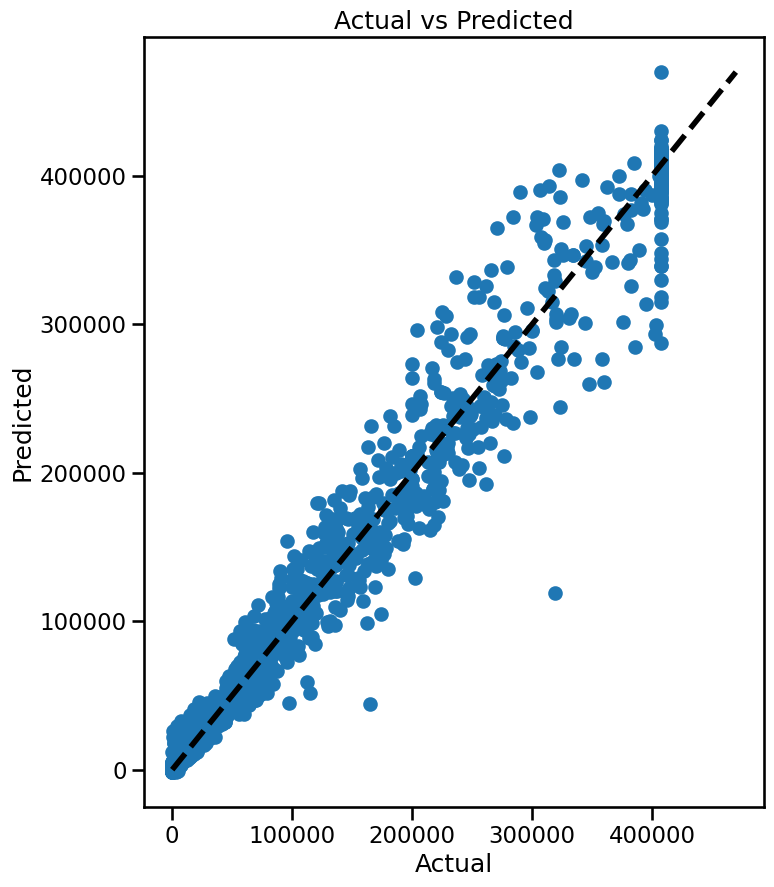

In [1005]:
fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test_pred.max()], [y_test.min(), y_test_pred.max()],'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### New Data Prediction

#### LGBM Tuned 3 Predictions

In [1006]:
model=gbr

In [1007]:
x_train.iloc[0]

unit_of_measure_(per_pack)      192.5
line_item_quantity             1800.0
pack_price                        2.1
unit_price                       0.01
first_line_designation           True
freight_cost_(usd)            5110.76
line_item_insurance_(usd)        7.41
shipment_mode_Air Charter       False
shipment_mode_Ocean             False
shipment_mode_Truck             False
Name: 2402, dtype: object

In [1008]:
b=x_train.iloc[0].to_numpy()
b

array([192.5, 1800.0, 2.1, 0.01, True, 5110.76, 7.41, False, False, False],
      dtype=object)

In [1009]:
input_val =b
final_features = [np.array(input_val)]
dataframe1 = pd.DataFrame(final_features)

output = model.predict(dataframe1 )
result = "%.2f" % round(output[0], 2)
result

'3034.36'

In [1010]:
y_train.iloc[0]

3780.0

### Create a Pickle File

In [1011]:
import pickle

In [1023]:
filename="trained_model2.sav"

In [1024]:
pickle.dump(gbr,open(filename,'wb'))

In [1025]:
loaded_model=pickle.load(open('trained_model2.sav','rb'))

In [1026]:
#lets check if pickled model is predicting
loaded_model.predict(dataframe1)

array([3034.36473107])

In [1027]:
y_train.iloc[0]

3780.0

In [1028]:
result2=loaded_model.score(x_test,y_test)
print(np.round(result2*100,2))

98.05
